___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.4f' % x)



In [2]:
data = pd.read_csv('Churn_Modelling.csv')

df=data.copy()

df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure     Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2      0.0000              1          1               1   
1          1  83807.8600              1          0               1   
2          8 159660.8000              3          1               0   
3          1      0.0000              2          0               0   
4          2 125510.8200              1          1               1   
...      ...         ...            ...        ...             ...   
9995       5      0.0000              2          1               0   
9996      10  57369.6100              1          1               1   
9997       7      0.0000              1          0               1   
9998       3  75075.3100              2          1               0   
9999       4 130142.7900              1          1               0   

      EstimatedSalary  Exited  
0         101348.8800       1  
1         112542.5800       0  
2         113931.5700       1  
3          93826.6300       0  
4          79084.1000       0  
...               ...     ...  
9995       96270.6400       0  
9996      101699.7700       0  
9997       42085.5800       1  
9998       92888.5200       1  
9999       38190.7800       0  

[10000 rows x 14 columns]

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum().any()

False

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.RowNumber

0           1
1           2
2           3
3           4
4           5
        ...  
9995     9996
9996     9997
9997     9998
9998     9999
9999    10000
Name: RowNumber, Length: 10000, dtype: int64

In [7]:
df.drop('RowNumber', axis=1, inplace=True)

In [8]:
df

CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

         Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0         0.0000              1          1               1      101348.8800   
1     83807.8600              1          0               1      112542.5800   
2    159660.8000              3          1               0      113931.5700   
3         0.0000              2          0               0       93826.6300   
4    125510.8200              1          1               1       79084.1000   
...          ...            ...        ...             ...              ...   
9995      0.0000              2          1               0       96270.6400   
9996  57369.6100              1          1               1      101699.7700   
9997      0.0000              1          0               1       42085.5800   
9998  75075.3100              2          1               0       92888.5200   
9999 130142.7900              1          1               0       38190.7800   

      Exited  
0          1  
1          0  
2          1  
3          0  
4          0  
...      ...  
9995       0  
9996       0  
9997       1  
9998       1  
9999       0  

[10000 rows x 13 columns]

In [9]:
df.describe()

CustomerId  CreditScore        Age     Tenure     Balance  \
count    10000.0000   10000.0000 10000.0000 10000.0000  10000.0000   
mean  15690940.5694     650.5288    38.9218     5.0128  76485.8893   
std      71936.1861      96.6533    10.4878     2.8922  62397.4052   
min   15565701.0000     350.0000    18.0000     0.0000      0.0000   
25%   15628528.2500     584.0000    32.0000     3.0000      0.0000   
50%   15690738.0000     652.0000    37.0000     5.0000  97198.5400   
75%   15753233.7500     718.0000    44.0000     7.0000 127644.2400   
max   15815690.0000     850.0000    92.0000    10.0000 250898.0900   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary     Exited  
count     10000.0000 10000.0000      10000.0000       10000.0000 10000.0000  
mean          1.5302     0.7055          0.5151      100090.2399     0.2037  
std           0.5817     0.4558          0.4998       57510.4928     0.4028  
min           1.0000     0.0000          0.0000          11.5800     0.0000  
25%           1.0000     0.0000          0.0000       51002.1100     0.0000  
50%           1.0000     1.0000          1.0000      100193.9150     0.0000  
75%           2.0000     1.0000          1.0000      149388.2475     0.0000  
max           4.0000     1.0000          1.0000      199992.4800     1.0000

In [10]:
df.describe(include='O').T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

In [11]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
df.drop(columns='Surname', inplace=True)

/Users/sahindedogruer/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


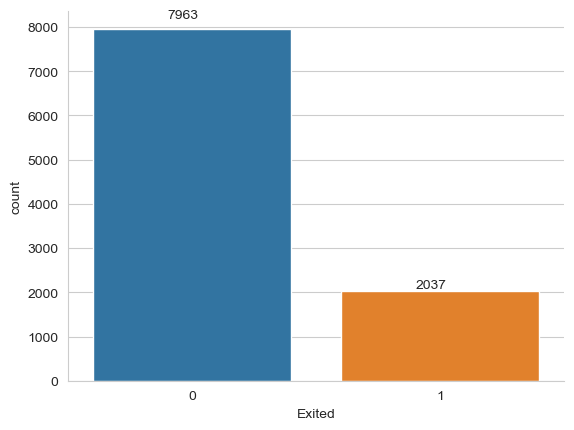

In [14]:
ax=sns.countplot(df['Exited'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

# Age

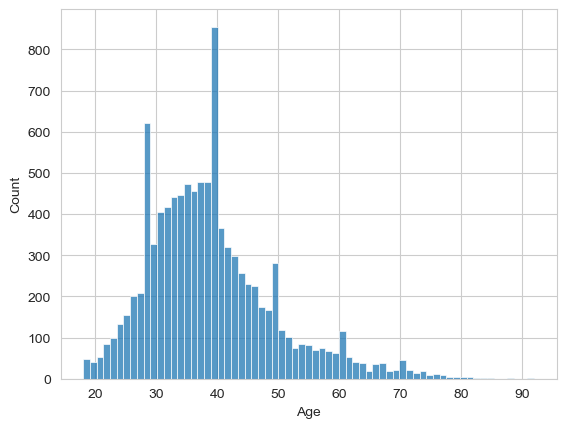

In [15]:
sns.histplot(x="Age", data=df);

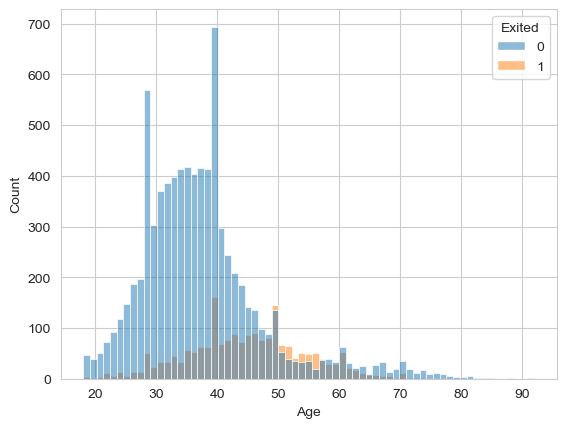

In [16]:
sns.histplot(x='Age', hue='Exited', data=df, alpha=0.5);

<AxesSubplot:xlabel='Exited', ylabel='Age'>

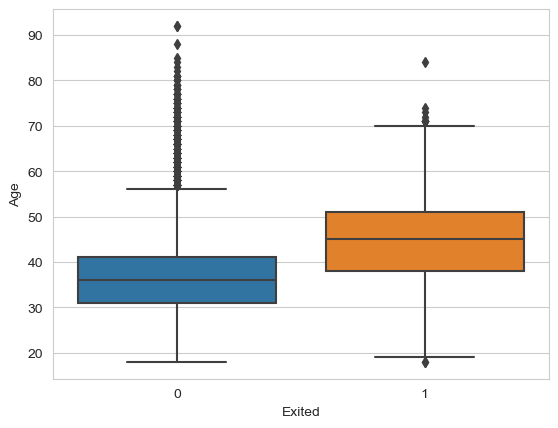

In [17]:
sns.boxplot(y='Age', x='Exited', data=df)

# CreditScore

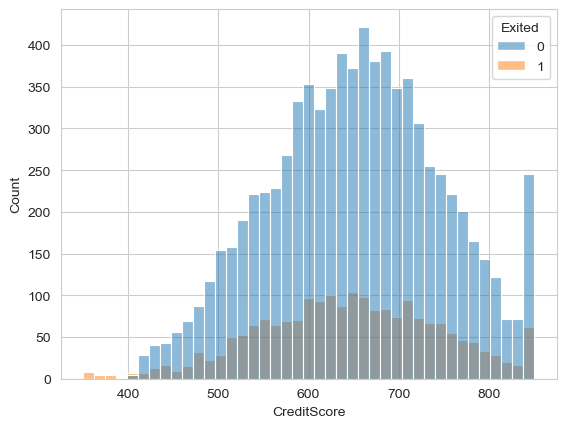

In [18]:
sns.histplot(x='CreditScore',data=df, hue='Exited');

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

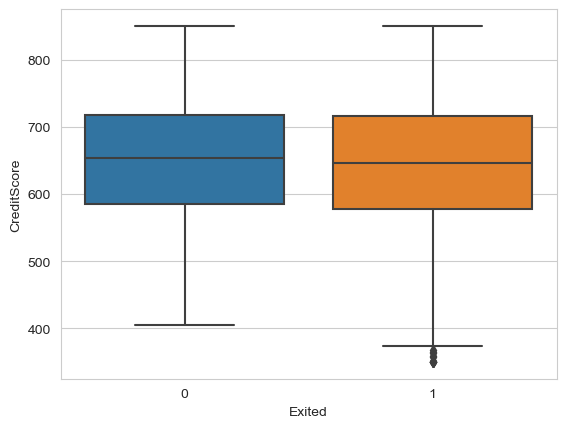

In [19]:
sns.boxplot(y='CreditScore', x='Exited', data=df)

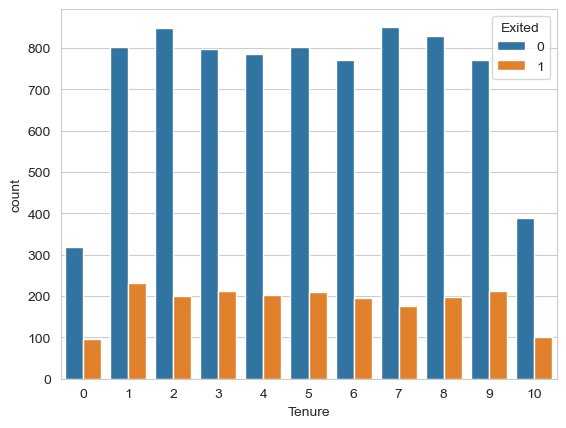

In [20]:
sns.countplot(x="Tenure",hue= 'Exited', data=df);

In [21]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

# Balance & EstimatedSalary

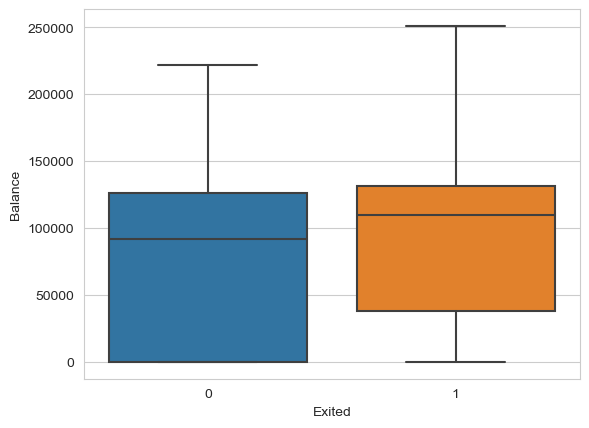

In [22]:
sns.boxplot(y='Balance', x='Exited', data=df);

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

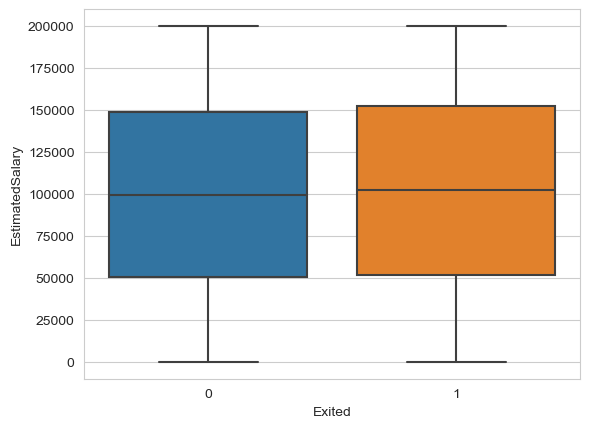

In [23]:
sns.boxplot(y='EstimatedSalary', x='Exited', data=df)

/Users/sahindedogruer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

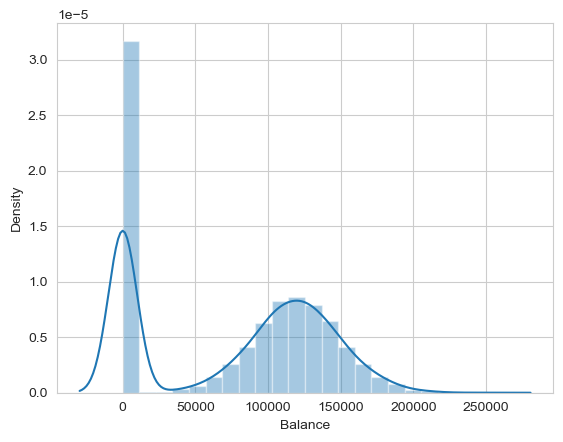

In [24]:
sns.distplot(df.Balance)

# HasCrCard

In [25]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

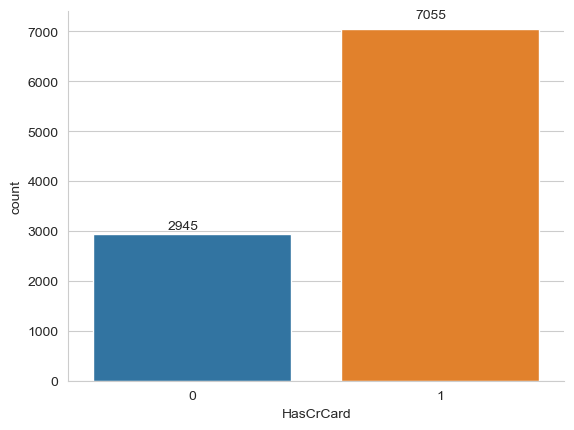

In [26]:
ax=sns.countplot(x='HasCrCard', data=df)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

In [27]:
df.groupby('HasCrCard')['Exited'].sum()

HasCrCard
0     613
1    1424
Name: Exited, dtype: int64

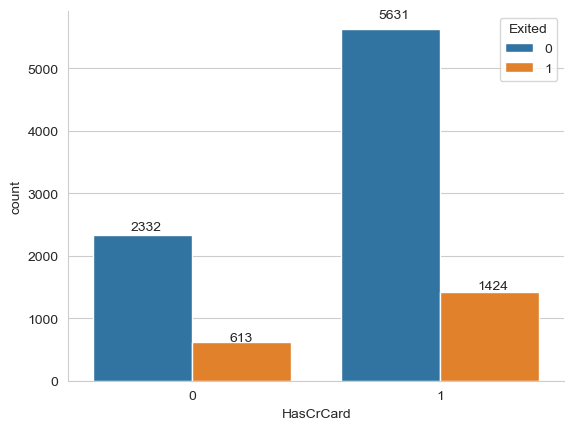

In [28]:
ax=sns.countplot(x="HasCrCard",hue= 'Exited', data=df)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.15, p.get_height() * 1.03));

# IsActiveMember

In [29]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [30]:
df.groupby('IsActiveMember')['Exited'].sum()

IsActiveMember
0    1302
1     735
Name: Exited, dtype: int64

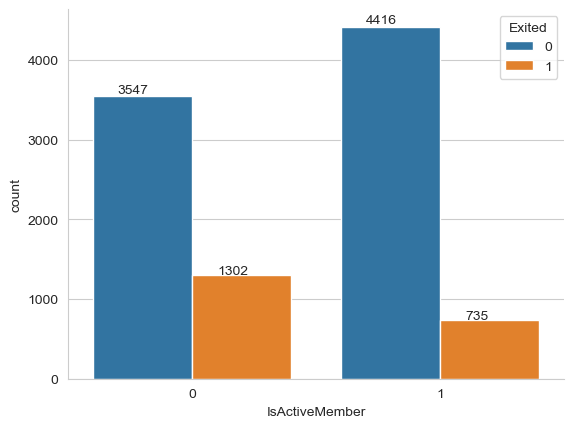

In [31]:
ax=sns.countplot(x="IsActiveMember",hue= 'Exited', data=df)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.1, p.get_height() * 1.01));

# NumOfProducts

In [32]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [33]:
df.groupby('NumOfProducts')['Exited'].sum()

NumOfProducts
1    1409
2     348
3     220
4      60
Name: Exited, dtype: int64

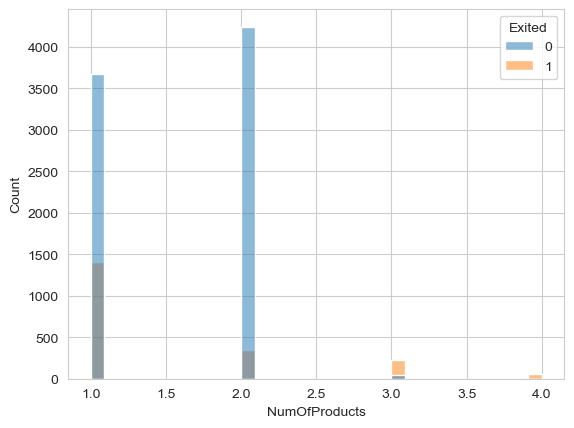

In [34]:
sns.histplot(x="NumOfProducts",hue= 'Exited', data=df);

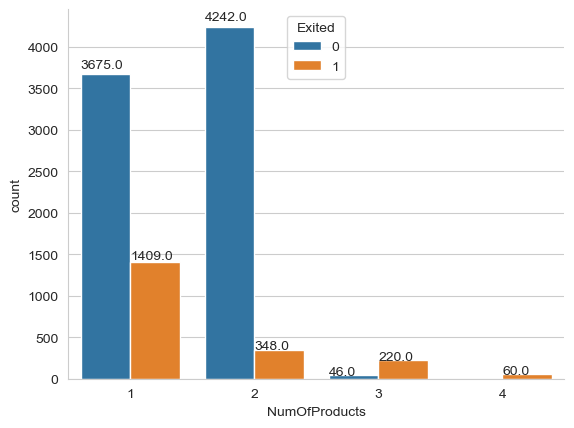

In [35]:
ax=sns.countplot(x="NumOfProducts",hue= 'Exited', data=df)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height() * 1.02));

# Geography

In [36]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [37]:
df = pd.get_dummies(df, drop_first=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   CreditScore        10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


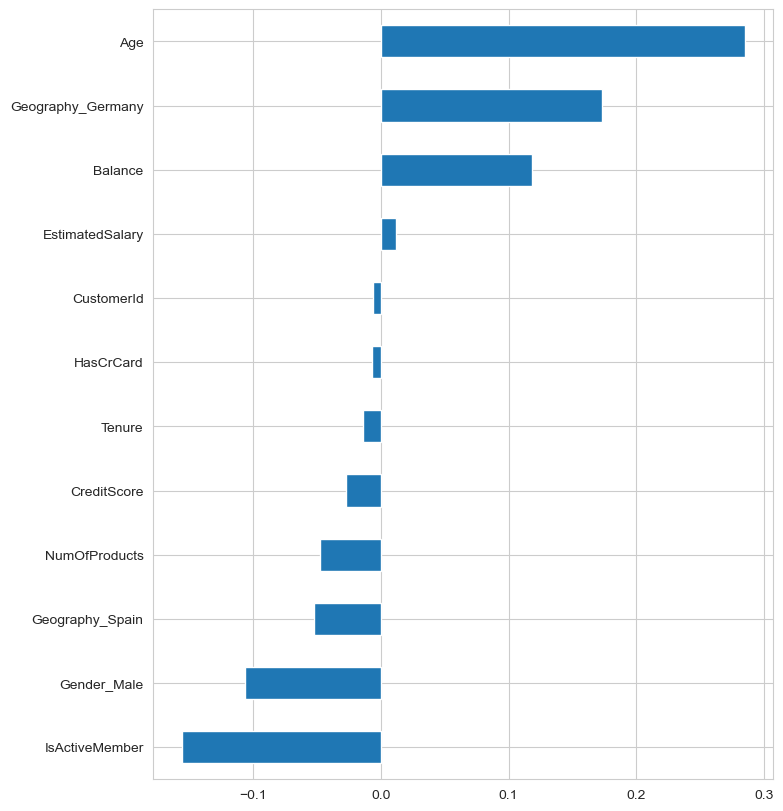

In [39]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

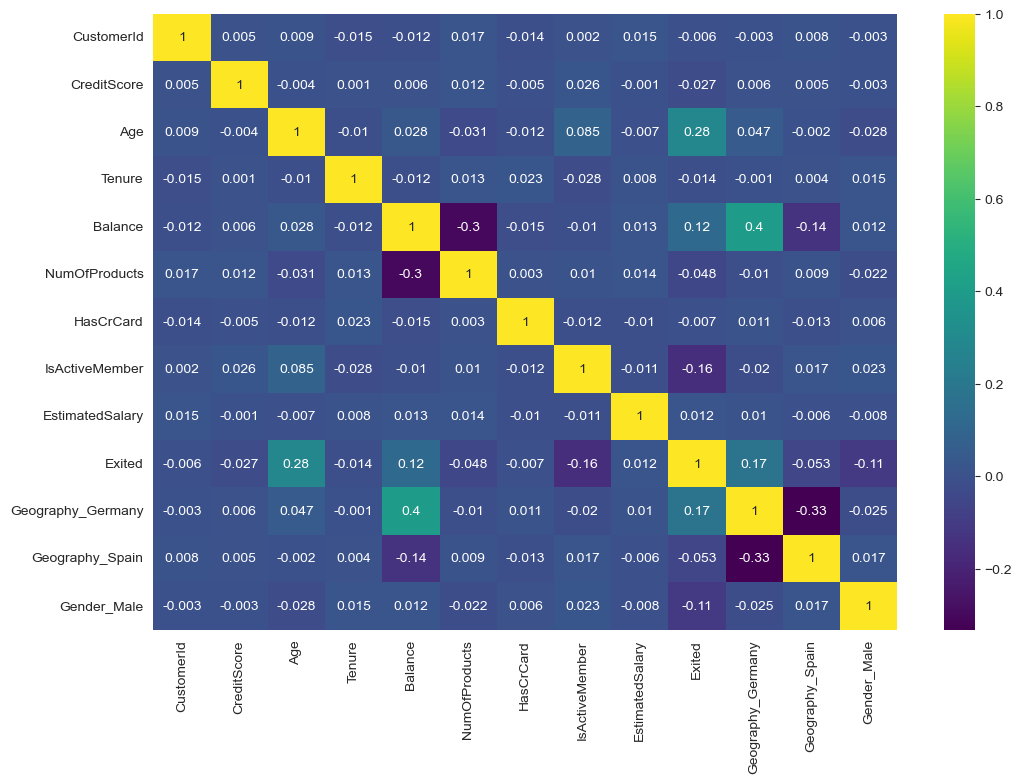

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().round(3), annot=True, cmap='viridis');

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   CreditScore        10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


# Preprocessing of Data
- Train | Test Split, Scalling

In [42]:
from sklearn.model_selection import train_test_split
df.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [43]:
df.shape

(10000, 13)

In [44]:
X=df[['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
        'Geography_Germany', 'Geography_Spain', 'Gender_Male']]
y= df['Exited']

In [45]:
# cat = X.select_dtypes("object").columns
# cat 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [47]:
# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# column_trans = ColumnTransformer([('cat', OneHotEncoder(),[0])], 
#                                        remainder='passthrough')

In [48]:
scaler = MinMaxScaler()

In [49]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [88]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

## without class_weigth

### Create The Model

In [51]:
!python --version

Python 3.8.13


In [52]:
#!pip install tensorflow

In [53]:
import tensorflow as tf
tf.__version__

2022-09-18 10:19:07.358341: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.10.0'

In [54]:
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [57]:
X_train.shape

(9000, 11)

In [58]:
tf.random.set_seed(101)

model = Sequential()

model.add(Dense(16, activation = 'relu', input_dim = X_train.shape[1]))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer.  
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))



2022-09-18 10:19:21.000291: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [59]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['Recall'])

In [61]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 200, verbose=1)

Epoch 1/200
254/254 [==============================] - 4s 9ms/step - loss: 0.4923 - recall: 0.0000e+00 - val_loss: 0.4952 - val_recall: 0.0000e+00
Epoch 2/200
254/254 [==============================] - 1s 5ms/step - loss: 0.4713 - recall: 6.1125e-04 - val_loss: 0.4847 - val_recall: 0.0000e+00
Epoch 3/200
254/254 [==============================] - 1s 5ms/step - loss: 0.4605 - recall: 0.0238 - val_loss: 0.4704 - val_recall: 0.0609
Epoch 4/200
254/254 [==============================] - 1s 4ms/step - loss: 0.4472 - recall: 0.0630 - val_loss: 0.4545 - val_recall: 0.1015
Epoch 5/200
254/254 [==============================] - 2s 6ms/step - loss: 0.4303 - recall: 0.1461 - val_loss: 0.4326 - val_recall: 0.1675
Epoch 6/200
254/254 [==============================] - 2s 7ms/step - loss: 0.4123 - recall: 0.2017 - val_loss: 0.4177 - val_recall: 0.2335
Epoch 7/200
254/254 [==============================] - 1s 5ms/step - loss: 0.3975 - recall: 0.2653 - val_loss: 0.4043 - val_recall: 0.3553
Epoch 8/200

254/254 [==============================] - 1s 6ms/step - loss: 0.3287 - recall: 0.4914 - val_loss: 0.3423 - val_recall: 0.5178
Epoch 118/200
254/254 [==============================] - 1s 5ms/step - loss: 0.3294 - recall: 0.4853 - val_loss: 0.3403 - val_recall: 0.5228
Epoch 119/200
254/254 [==============================] - 1s 6ms/step - loss: 0.3281 - recall: 0.4866 - val_loss: 0.3428 - val_recall: 0.4670
Epoch 120/200
254/254 [==============================] - 1s 5ms/step - loss: 0.3285 - recall: 0.4957 - val_loss: 0.3476 - val_recall: 0.4264
Epoch 121/200
254/254 [==============================] - 1s 4ms/step - loss: 0.3288 - recall: 0.4859 - val_loss: 0.3416 - val_recall: 0.4772
Epoch 122/200
254/254 [==============================] - 1s 4ms/step - loss: 0.3305 - recall: 0.4829 - val_loss: 0.3452 - val_recall: 0.4518
Epoch 123/200
254/254 [==============================] - 1s 4ms/step - loss: 0.3280 - recall: 0.4835 - val_loss: 0.3406 - val_recall: 0.4873
Epoch 124/200
254/254 [====

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(11, 16) dtype=float32, numpy=
 array([[ 3.34603116e-02,  8.05367008e-02, -1.48007885e-01,
         -1.61718845e-01,  1.31931111e-01, -1.38993233e-01,
          6.64664730e-02,  6.59793198e-01, -6.03205971e-02,
         -2.17684090e-01,  2.62783002e-02,  4.12339568e-01,
          1.49487838e-01, -8.92944187e-02,  3.60730961e-02,
         -4.10923451e-01],
        [-8.11670661e-01, -5.36711872e-01,  3.33375335e-02,
          4.27723914e-01,  1.28584409e+00,  1.31713188e+00,
         -1.11239707e+00,  7.08227336e-01, -1.06306624e+00,
          2.85287410e-01,  9.45233703e-01, -1.75581956e+00,
         -9.63392556e-01,  1.42186844e+00, -2.22544983e-01,
         -8.09032544e-02],
        [ 4.17990625e-01, -3.57120395e-01, -5.83219230e-01,
          1.57844990e-01,  6.03276849e-01,  8.59830752e-02,
         -4.17118996e-01,  1.04180921e-03, -1.04195282e-01,
          3.77983302e-02, -8.69765952e-02,  3.59819196e-02,
          5.20463705e-01, -3.52622941e

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [64]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  recall  val_loss  val_recall
0 0.4923  0.0000    0.4952      0.0000
1 0.4713  0.0006    0.4847      0.0000
2 0.4605  0.0238    0.4704      0.0609
3 0.4472  0.0630    0.4545      0.1015
4 0.4303  0.1461    0.4326      0.1675

<AxesSubplot:>

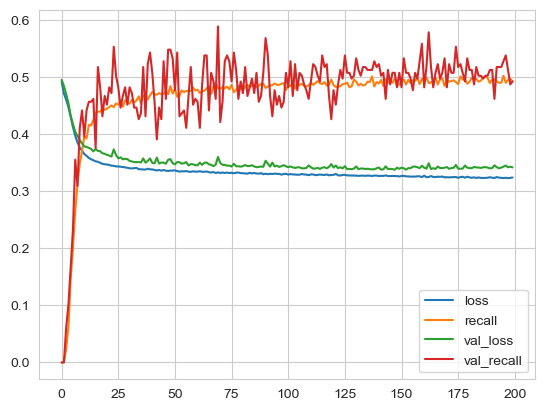

In [65]:
loss_df.plot()

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[770  26]
 [123  81]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.76      0.40      0.52       204

    accuracy                           0.85      1000
   macro avg       0.81      0.68      0.72      1000
weighted avg       0.84      0.85      0.83      1000



32/32 [==============================] - 0s 3ms/step


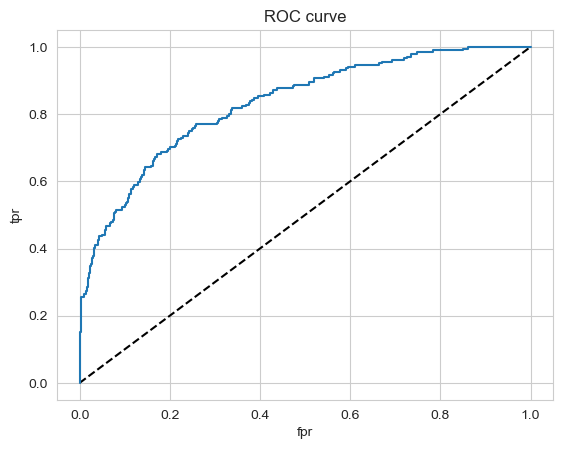

In [67]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [111]:
from tensorflow import keras
from tensorflow.keras import layers


In [112]:
tf.random.set_seed(101)
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

/Users/sahindedogruer/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [113]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(y_train),
                                                  y_train)

/Users/sahindedogruer/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1], y=8255    0
7259    0
9112    0
7666    0
257     0
       ..
1700    0
9512    0
8170    1
1777    0
3694    1
Name: Exited, Length: 9000, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [114]:
class_weights

array([0.62787777, 2.45499182])

In [115]:
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [116]:
model.fit(X_train, y_train, class_weight=class_weights,validation_split = 0.1, batch_size = 32, epochs = 200, verbose=1 )

Epoch 1/200
254/254 [==============================] - 1s 2ms/step - loss: 0.6488 - recall: 0.6473 - val_loss: 0.6299 - val_recall: 0.7056
Epoch 2/200
254/254 [==============================] - 0s 2ms/step - loss: 0.5997 - recall: 0.6553 - val_loss: 0.5598 - val_recall: 0.6802
Epoch 3/200
254/254 [==============================] - 0s 2ms/step - loss: 0.5839 - recall: 0.6870 - val_loss: 0.5295 - val_recall: 0.6244
Epoch 4/200
254/254 [==============================] - 0s 2ms/step - loss: 0.5714 - recall: 0.6950 - val_loss: 0.5467 - val_recall: 0.6853
Epoch 5/200
254/254 [==============================] - 0s 2ms/step - loss: 0.5618 - recall: 0.6913 - val_loss: 0.6067 - val_recall: 0.7970
Epoch 6/200
254/254 [==============================] - 0s 2ms/step - loss: 0.5416 - recall: 0.7066 - val_loss: 0.5459 - val_recall: 0.7614
Epoch 7/200
254/254 [==============================] - 0s 2ms/step - loss: 0.5136 - recall: 0.7268 - val_loss: 0.4933 - val_recall: 0.7157
Epoch 8/200
254/254 [======

254/254 [==============================] - 0s 2ms/step - loss: 0.4016 - recall: 0.7922 - val_loss: 0.4847 - val_recall: 0.8071
Epoch 118/200
254/254 [==============================] - 1s 2ms/step - loss: 0.4031 - recall: 0.7879 - val_loss: 0.5042 - val_recall: 0.7919
Epoch 119/200
254/254 [==============================] - 0s 2ms/step - loss: 0.4009 - recall: 0.7940 - val_loss: 0.4193 - val_recall: 0.7310
Epoch 120/200
254/254 [==============================] - 0s 2ms/step - loss: 0.4032 - recall: 0.7940 - val_loss: 0.4172 - val_recall: 0.7208
Epoch 121/200
254/254 [==============================] - 0s 2ms/step - loss: 0.4018 - recall: 0.7958 - val_loss: 0.4243 - val_recall: 0.7310
Epoch 122/200
254/254 [==============================] - 0s 2ms/step - loss: 0.4023 - recall: 0.7989 - val_loss: 0.4055 - val_recall: 0.7107
Epoch 123/200
254/254 [==============================] - 0s 2ms/step - loss: 0.3979 - recall: 0.7940 - val_loss: 0.4257 - val_recall: 0.7462
Epoch 124/200
254/254 [====

<AxesSubplot:>

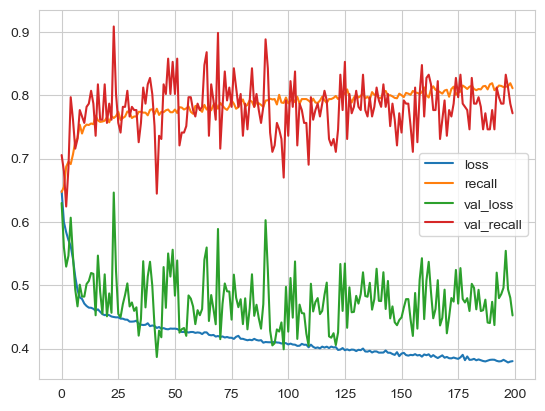

In [117]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [118]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[634 162]
 [ 65 139]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       796
           1       0.46      0.68      0.55       204

    accuracy                           0.77      1000
   macro avg       0.68      0.74      0.70      1000
weighted avg       0.82      0.77      0.79      1000



32/32 [==============================] - 0s 2ms/step


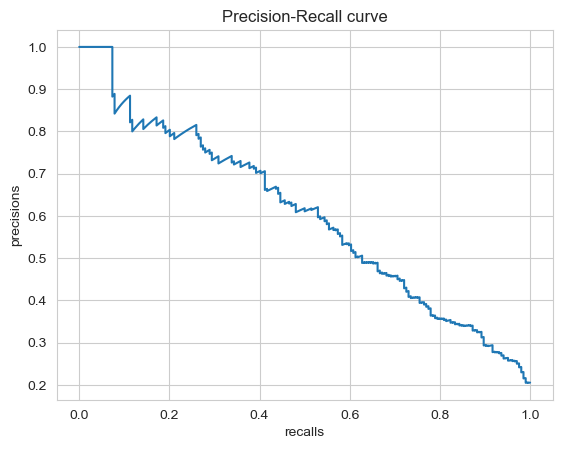

In [119]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()


## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [120]:
tf.random.set_seed(101)
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

/Users/sahindedogruer/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [121]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(y_train),
                                                  y_train)

/Users/sahindedogruer/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1], y=8255    0
7259    0
9112    0
7666    0
257     0
       ..
1700    0
9512    0
8170    1
1777    0
3694    1
Name: Exited, Length: 9000, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [122]:
class_weights

array([0.62787777, 2.45499182])

In [123]:
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [124]:
model.fit(X_train, y_train, class_weight=class_weights,validation_split = 0.1, batch_size = 32, epochs = 200, verbose=1 )

Epoch 1/200
254/254 [==============================] - 3s 9ms/step - loss: 0.6139 - recall: 0.6351 - val_loss: 0.6337 - val_recall: 0.8173
Epoch 2/200
254/254 [==============================] - 2s 7ms/step - loss: 0.5798 - recall: 0.6809 - val_loss: 0.5351 - val_recall: 0.6904
Epoch 3/200
254/254 [==============================] - 2s 9ms/step - loss: 0.5651 - recall: 0.6968 - val_loss: 0.5266 - val_recall: 0.7208
Epoch 4/200
254/254 [==============================] - 4s 14ms/step - loss: 0.5494 - recall: 0.6938 - val_loss: 0.5171 - val_recall: 0.7411
Epoch 5/200
254/254 [==============================] - 5s 20ms/step - loss: 0.5269 - recall: 0.7164 - val_loss: 0.5195 - val_recall: 0.7766
Epoch 6/200
254/254 [==============================] - 6s 22ms/step - loss: 0.4863 - recall: 0.7469 - val_loss: 0.5001 - val_recall: 0.7919
Epoch 7/200
254/254 [==============================] - 4s 17ms/step - loss: 0.4762 - recall: 0.7543 - val_loss: 0.4581 - val_recall: 0.7716
Epoch 8/200
254/254 [==

254/254 [==============================] - 2s 7ms/step - loss: 0.3763 - recall: 0.8172 - val_loss: 0.5052 - val_recall: 0.7157
Epoch 118/200
254/254 [==============================] - 2s 8ms/step - loss: 0.3804 - recall: 0.8130 - val_loss: 0.5183 - val_recall: 0.7462
Epoch 119/200
254/254 [==============================] - 2s 7ms/step - loss: 0.3758 - recall: 0.8075 - val_loss: 0.4705 - val_recall: 0.6904
Epoch 120/200
254/254 [==============================] - 2s 8ms/step - loss: 0.3813 - recall: 0.8105 - val_loss: 0.4740 - val_recall: 0.7157
Epoch 121/200
254/254 [==============================] - 2s 7ms/step - loss: 0.3758 - recall: 0.8166 - val_loss: 0.4679 - val_recall: 0.7107
Epoch 122/200
254/254 [==============================] - 2s 6ms/step - loss: 0.3744 - recall: 0.8130 - val_loss: 0.4316 - val_recall: 0.6853
Epoch 123/200
254/254 [==============================] - 2s 7ms/step - loss: 0.3744 - recall: 0.8172 - val_loss: 0.4756 - val_recall: 0.7107
Epoch 124/200
254/254 [====

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<AxesSubplot:>

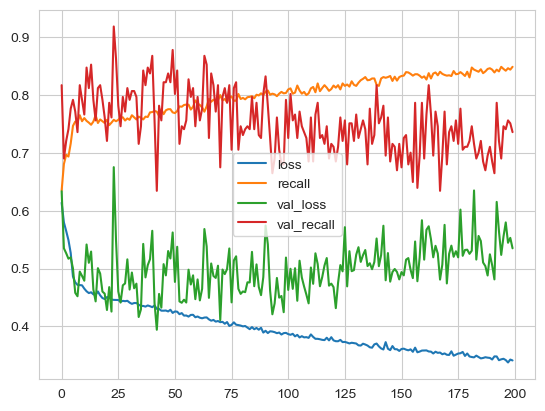

In [125]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()


In [126]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[639 157]
 [ 62 142]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       796
           1       0.47      0.70      0.56       204

    accuracy                           0.78      1000
   macro avg       0.69      0.75      0.71      1000
weighted avg       0.82      0.78      0.79      1000



32/32 [==============================] - 0s 3ms/step


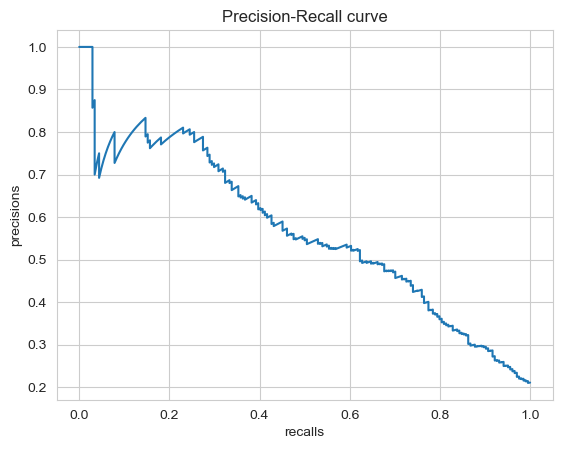

In [127]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()


### Add Dropout Layer

In [128]:
from tensorflow.keras.layers import Dropout

In [129]:
tf.random.set_seed(101)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(24, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss ="binary_crossentropy", metrics=['Recall'])

/Users/sahindedogruer/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [131]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32,class_weight=class_weights, epochs = 200, verbose = 1)

Epoch 1/200
254/254 [==============================] - 6s 22ms/step - loss: 0.4360 - recall: 0.7659 - val_loss: 0.4363 - val_recall: 0.7868
Epoch 2/200
254/254 [==============================] - 4s 18ms/step - loss: 0.4481 - recall: 0.7592 - val_loss: 0.4678 - val_recall: 0.8173
Epoch 3/200
254/254 [==============================] - 4s 15ms/step - loss: 0.4421 - recall: 0.7720 - val_loss: 0.4485 - val_recall: 0.7868
Epoch 4/200
254/254 [==============================] - 4s 15ms/step - loss: 0.4423 - recall: 0.7702 - val_loss: 0.4510 - val_recall: 0.8071
Epoch 5/200
254/254 [==============================] - 3s 13ms/step - loss: 0.4367 - recall: 0.7696 - val_loss: 0.4330 - val_recall: 0.7563
Epoch 6/200
254/254 [==============================] - 3s 13ms/step - loss: 0.4424 - recall: 0.7702 - val_loss: 0.4689 - val_recall: 0.8528
Epoch 7/200
254/254 [==============================] - 3s 13ms/step - loss: 0.4388 - recall: 0.7861 - val_loss: 0.4614 - val_recall: 0.8223
Epoch 8/200
254/254 

254/254 [==============================] - 2s 9ms/step - loss: 0.4367 - recall: 0.7482 - val_loss: 0.4541 - val_recall: 0.7766
Epoch 118/200
254/254 [==============================] - 3s 12ms/step - loss: 0.4463 - recall: 0.7482 - val_loss: 0.4614 - val_recall: 0.7817
Epoch 119/200
254/254 [==============================] - 3s 12ms/step - loss: 0.4431 - recall: 0.7555 - val_loss: 0.4530 - val_recall: 0.7563
Epoch 120/200
254/254 [==============================] - 3s 12ms/step - loss: 0.4424 - recall: 0.7732 - val_loss: 0.4387 - val_recall: 0.7513
Epoch 121/200
254/254 [==============================] - 2s 9ms/step - loss: 0.4364 - recall: 0.7641 - val_loss: 0.4728 - val_recall: 0.7970
Epoch 122/200
254/254 [==============================] - 2s 9ms/step - loss: 0.4422 - recall: 0.7586 - val_loss: 0.4510 - val_recall: 0.7716
Epoch 123/200
254/254 [==============================] - 2s 10ms/step - loss: 0.4451 - recall: 0.7769 - val_loss: 0.4487 - val_recall: 0.7513
Epoch 124/200
254/254 [

254/254 [==============================] - 3s 10ms/step - loss: 0.4398 - recall: 0.7457 - val_loss: 0.4607 - val_recall: 0.7817
Epoch 176/200
254/254 [==============================] - 2s 10ms/step - loss: 0.4393 - recall: 0.7763 - val_loss: 0.4464 - val_recall: 0.7970
Epoch 177/200
254/254 [==============================] - 2s 10ms/step - loss: 0.4377 - recall: 0.7696 - val_loss: 0.4750 - val_recall: 0.7970
Epoch 178/200
254/254 [==============================] - 2s 9ms/step - loss: 0.4412 - recall: 0.7775 - val_loss: 0.4445 - val_recall: 0.7411
Epoch 179/200
254/254 [==============================] - 2s 8ms/step - loss: 0.4371 - recall: 0.7708 - val_loss: 0.4444 - val_recall: 0.7716
Epoch 180/200
254/254 [==============================] - 2s 8ms/step - loss: 0.4449 - recall: 0.7622 - val_loss: 0.4332 - val_recall: 0.7360
Epoch 181/200
254/254 [==============================] - 2s 9ms/step - loss: 0.4475 - recall: 0.7506 - val_loss: 0.4659 - val_recall: 0.7766
Epoch 182/200
254/254 [=

<AxesSubplot:>

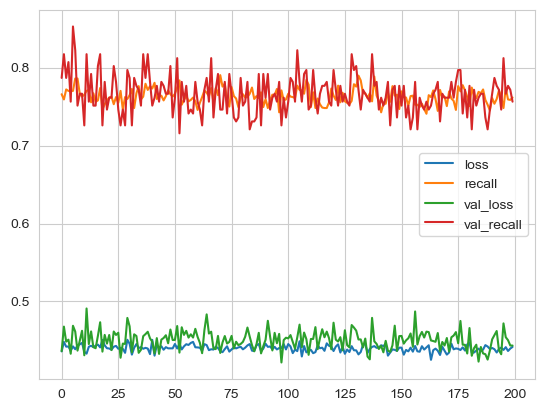

In [132]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [133]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 1s 6ms/step
[[647 149]
 [ 66 138]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       796
           1       0.48      0.68      0.56       204

    accuracy                           0.79      1000
   macro avg       0.69      0.74      0.71      1000
weighted avg       0.82      0.79      0.80      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [134]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15, restore_best_weights = True)

In [135]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 200, callbacks = [early_stop])

Epoch 1/200
64/64 [==============================] - 6s 44ms/step - loss: 0.3775 - recall: 0.6748 - val_loss: 0.3654 - val_recall: 0.6244
Epoch 2/200
64/64 [==============================] - 1s 21ms/step - loss: 0.3406 - recall: 0.5947 - val_loss: 0.3566 - val_recall: 0.5685
Epoch 3/200
64/64 [==============================] - 2s 26ms/step - loss: 0.3302 - recall: 0.5709 - val_loss: 0.3559 - val_recall: 0.5482
Epoch 4/200
64/64 [==============================] - 1s 17ms/step - loss: 0.3291 - recall: 0.5581 - val_loss: 0.3579 - val_recall: 0.5431
Epoch 5/200
64/64 [==============================] - 1s 20ms/step - loss: 0.3297 - recall: 0.5593 - val_loss: 0.3573 - val_recall: 0.5381
Epoch 6/200
64/64 [==============================] - 2s 27ms/step - loss: 0.3301 - recall: 0.5611 - val_loss: 0.3554 - val_recall: 0.5381
Epoch 7/200
64/64 [==============================] - 1s 23ms/step - loss: 0.3328 - recall: 0.5422 - val_loss: 0.3568 - val_recall: 0.5431
Epoch 8/200
64/64 [===============

#### Monitor the "val_recall" as metric

<AxesSubplot:>

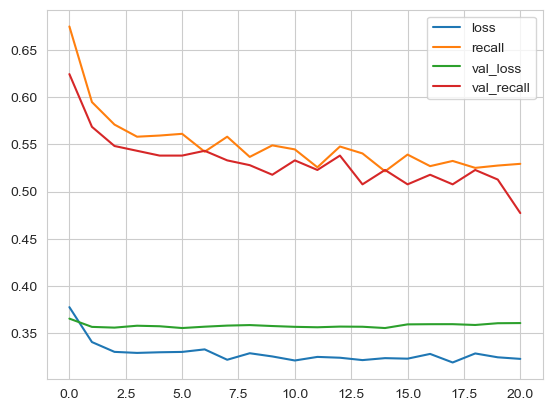

In [136]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## GridSearchCV

In [142]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [143]:
def build_classifier(optimizer,learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [144]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [145]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15, restore_best_weights = True)

In [147]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64, 128],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train,class_weight=class_weights, callbacks = [early_stop])

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/var/folders/30/nrlqwlgd4hl47nz_dxj5m2rr0000gn/T/ipykernel_25278/2062548985.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)
2022-09-18 12:56:06.941326: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-18 12:56:07.384636: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other opera

Epoch 1/200
Epoch 1/200
Epoch 1/200
Epoch 1/200
Epoch 1/200
Epoch 1/200
Epoch 1/200
Epoch 1/200
228/228 [==============================] - 12s 29ms/step - loss: 0.6773 - recall: 0.6720 - val_loss: 0.6450 - val_recall: 0.7045
Epoch 2/200
228/228 [==============================] - 12s 29ms/step - loss: 0.6510 - recall: 0.5299 - val_loss: 0.6509 - val_recall: 0.8011
Epoch 2/200
228/228 [==============================] - 12s 29ms/step - loss: 0.6551 - recall: 0.4628 - val_loss: 0.6275 - val_recall: 0.6420
Epoch 2/200
228/228 [==============================] - 4s 18ms/step - loss: 0.6298 - recall: 0.6540 - val_loss: 0.6294 - val_recall: 0.7557
Epoch 3/200
228/228 [==============================] - 4s 19ms/step - loss: 0.6155 - recall: 0.6660 - val_loss: 0.6064 - val_recall: 0.7443
Epoch 3/200
228/228 [==============================] - 4s 18ms/step - loss: 0.6284 - recall: 0.6772 - val_loss: 0.6330 - val_recall: 0.7386
Epoch 3/200
228/228 [==============================] - 4s 18ms/step - los

228/228 [==============================] - 5s 20ms/step - loss: 0.4979 - recall: 0.7549 - val_loss: 0.5046 - val_recall: 0.7670
Epoch 13/200
228/228 [==============================] - 4s 20ms/step - loss: 0.5029 - recall: 0.7455 - val_loss: 0.5450 - val_recall: 0.7898
Epoch 14/200
228/228 [==============================] - 4s 19ms/step - loss: 0.5058 - recall: 0.7352 - val_loss: 0.5303 - val_recall: 0.7670
Epoch 14/200
228/228 [==============================] - 5s 20ms/step - loss: 0.5261 - recall: 0.7224 - val_loss: 0.5218 - val_recall: 0.7670
Epoch 14/200
228/228 [==============================] - 5s 20ms/step - loss: 0.5227 - recall: 0.7300 - val_loss: 0.5139 - val_recall: 0.7670
Epoch 14/200
228/228 [==============================] - 4s 19ms/step - loss: 0.5630 - recall: 0.6857 - val_loss: 0.5861 - val_recall: 0.7614
Epoch 14/200
228/228 [==============================] - 5s 20ms/step - loss: 0.5020 - recall: 0.7317 - val_loss: 0.5345 - val_recall: 0.8011
Epoch 15/200
228/228 [====

228/228 [==============================] - 5s 22ms/step - loss: 0.4875 - recall: 0.7690 - val_loss: 0.4654 - val_recall: 0.7557
Epoch 19/200
228/228 [==============================] - 5s 23ms/step - loss: 0.4822 - recall: 0.7588 - val_loss: 0.5396 - val_recall: 0.8239
Epoch 19/200
228/228 [==============================] - 5s 22ms/step - loss: 0.4866 - recall: 0.7368 - val_loss: 0.4968 - val_recall: 0.7727
Epoch 20/200
228/228 [==============================] - 5s 22ms/step - loss: 0.4841 - recall: 0.7549 - val_loss: 0.5185 - val_recall: 0.8352
Epoch 20/200
228/228 [==============================] - 5s 22ms/step - loss: 0.4911 - recall: 0.7381 - val_loss: 0.5105 - val_recall: 0.7841
Epoch 20/200
228/228 [==============================] - 5s 22ms/step - loss: 0.5441 - recall: 0.6911 - val_loss: 0.5633 - val_recall: 0.7898
Epoch 20/200
228/228 [==============================] - 5s 22ms/step - loss: 0.4772 - recall: 0.7503 - val_loss: 0.5321 - val_recall: 0.8068
Epoch 20/200
228/228 [====

228/228 [==============================] - 6s 25ms/step - loss: 0.4648 - recall: 0.7555 - val_loss: 0.5128 - val_recall: 0.8125
Epoch 30/200
228/228 [==============================] - 6s 26ms/step - loss: 0.4775 - recall: 0.7435 - val_loss: 0.5029 - val_recall: 0.7670
Epoch 31/200
228/228 [==============================] - 6s 25ms/step - loss: 0.4702 - recall: 0.7531 - val_loss: 0.5079 - val_recall: 0.8239
Epoch 31/200
228/228 [==============================] - 6s 26ms/step - loss: 0.4980 - recall: 0.7282 - val_loss: 0.4999 - val_recall: 0.7784
Epoch 31/200
228/228 [==============================] - 6s 27ms/step - loss: 0.4662 - recall: 0.7565 - val_loss: 0.4891 - val_recall: 0.8011
Epoch 31/200
228/228 [==============================] - 6s 25ms/step - loss: 0.4642 - recall: 0.7575 - val_loss: 0.5472 - val_recall: 0.8125
Epoch 31/200
228/228 [==============================] - 6s 25ms/step - loss: 0.4664 - recall: 0.7462 - val_loss: 0.4766 - val_recall: 0.7727
Epoch 31/200
228/228 [====

Epoch 36/200
228/228 [==============================] - 5s 22ms/step - loss: 0.4634 - recall: 0.7455 - val_loss: 0.5067 - val_recall: 0.8011
Epoch 36/200
228/228 [==============================] - 5s 21ms/step - loss: 0.4607 - recall: 0.7683 - val_loss: 0.4527 - val_recall: 0.7727
Epoch 37/200
Restoring model weights from the end of the best epoch: 21.
228/228 [==============================] - 5s 21ms/step - loss: 0.4711 - recall: 0.7488 - val_loss: 0.4725 - val_recall: 0.7443
Epoch 36: early stopping
228/228 [==============================] - 5s 21ms/step - loss: 0.4650 - recall: 0.7538 - val_loss: 0.4810 - val_recall: 0.7898
Epoch 37/200
228/228 [==============================] - 5s 21ms/step - loss: 0.4612 - recall: 0.7483 - val_loss: 0.5133 - val_recall: 0.8182
Epoch 37/200
228/228 [==============================] - 5s 20ms/step - loss: 0.4631 - recall: 0.7517 - val_loss: 0.5172 - val_recall: 0.8068
Epoch 37/200
228/228 [==============================] - 5s 22ms/step - loss: 0.468

228/228 [==============================] - 24s 44ms/step - loss: 0.6684 - recall: 0.5152 - val_loss: 0.6432 - val_recall: 0.5220
Epoch 2/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6339 - recall: 0.6761 - val_loss: 0.6152 - val_recall: 0.6477
Epoch 3/200
228/228 [==============================] - 5s 22ms/step - loss: 0.4550 - recall: 0.7649 - val_loss: 0.4549 - val_recall: 0.8011
Epoch 44/200
228/228 [==============================] - 5s 22ms/step - loss: 0.4664 - recall: 0.7522 - val_loss: 0.5594 - val_recall: 0.8466
Epoch 44/200
228/228 [==============================] - 5s 23ms/step - loss: 0.4598 - recall: 0.7531 - val_loss: 0.4643 - val_recall: 0.7500
Epoch 44/200
228/228 [==============================] - 6s 25ms/step - loss: 0.6295 - recall: 0.5985 - val_loss: 0.6781 - val_recall: 0.7358
Epoch 3/200
228/228 [==============================] - 6s 25ms/step - loss: 0.6097 - recall: 0.6667 - val_loss: 0.6140 - val_recall: 0.7386
Epoch 4/200
228/228 [=======

228/228 [==============================] - 6s 27ms/step - loss: 0.4586 - recall: 0.7503 - val_loss: 0.4948 - val_recall: 0.8068
Epoch 48: early stopping
 44/228 [====>.........................] - ETA: 3s - loss: 0.5655 - recall: 0.6860Epoch 1/200
Epoch 6/200
228/228 [==============================] - 5s 23ms/step - loss: 0.5356 - recall: 0.7170 - val_loss: 0.5167 - val_recall: 0.6604
Epoch 9/200
228/228 [==============================] - 5s 23ms/step - loss: 0.4570 - recall: 0.7566 - val_loss: 0.4688 - val_recall: 0.7955
Epoch 51/200
228/228 [==============================] - 6s 25ms/step - loss: 0.5272 - recall: 0.7177 - val_loss: 0.5590 - val_recall: 0.7547
Epoch 10/200
228/228 [==============================] - 6s 27ms/step - loss: 0.5760 - recall: 0.6607 - val_loss: 0.6068 - val_recall: 0.7841
Epoch 9/200
228/228 [==============================] - 6s 27ms/step - loss: 0.4556 - recall: 0.7703 - val_loss: 0.4439 - val_recall: 0.7727
Epoch 53/200
228/228 [=============================

228/228 [==============================] - 5s 23ms/step - loss: 0.5701 - recall: 0.6703 - val_loss: 0.5655 - val_recall: 0.7159
Epoch 12/200
228/228 [==============================] - 5s 23ms/step - loss: 0.4868 - recall: 0.7715 - val_loss: 0.4388 - val_recall: 0.6534
Epoch 15/200
228/228 [==============================] - 5s 23ms/step - loss: 0.4493 - recall: 0.7730 - val_loss: 0.4724 - val_recall: 0.8352
Epoch 56/200
228/228 [==============================] - 6s 24ms/step - loss: 0.4541 - recall: 0.7621 - val_loss: 0.4899 - val_recall: 0.8295
Epoch 56/200
228/228 [==============================] - 33s 48ms/step - loss: 0.6855 - recall: 0.4636 - val_loss: 0.6646 - val_recall: 0.6591
Epoch 2/200
228/228 [==============================] - 6s 28ms/step - loss: 0.5687 - recall: 0.6786 - val_loss: 0.5946 - val_recall: 0.7670
Epoch 13/200
228/228 [==============================] - 7s 29ms/step - loss: 0.4848 - recall: 0.7674 - val_loss: 0.5160 - val_recall: 0.7841
Epoch 16/200
228/228 [====

228/228 [==============================] - 5s 23ms/step - loss: 0.4853 - recall: 0.7583 - val_loss: 0.4542 - val_recall: 0.6855
Epoch 20/200
228/228 [==============================] - 5s 23ms/step - loss: 0.5591 - recall: 0.6814 - val_loss: 0.6023 - val_recall: 0.7841
Epoch 18/200
228/228 [==============================] - 6s 28ms/step - loss: 0.5688 - recall: 0.6918 - val_loss: 0.5958 - val_recall: 0.7784
Epoch 9/200
228/228 [==============================] - 7s 32ms/step - loss: 0.5932 - recall: 0.6834 - val_loss: 0.5509 - val_recall: 0.6818
Epoch 8/200
228/228 [==============================] - 7s 31ms/step - loss: 0.4829 - recall: 0.7644 - val_loss: 0.5030 - val_recall: 0.7547
Epoch 21/200
228/228 [==============================] - 7s 31ms/step - loss: 0.5564 - recall: 0.6938 - val_loss: 0.5595 - val_recall: 0.7330
Epoch 19/200
228/228 [==============================] - 11s 47ms/step - loss: 0.5611 - recall: 0.7020 - val_loss: 0.5717 - val_recall: 0.7614
Epoch 10/200
228/228 [=====

228/228 [==============================] - 5s 21ms/step - loss: 0.4972 - recall: 0.7434 - val_loss: 0.5181 - val_recall: 0.7784
Epoch 30/200
228/228 [==============================] - 5s 21ms/step - loss: 0.5803 - recall: 0.6811 - val_loss: 0.5756 - val_recall: 0.7614
Epoch 8/200
228/228 [==============================] - 5s 20ms/step - loss: 0.6182 - recall: 0.6354 - val_loss: 0.6116 - val_recall: 0.7330
Epoch 4/200
228/228 [==============================] - 5s 20ms/step - loss: 0.5632 - recall: 0.6904 - val_loss: 0.5721 - val_recall: 0.7443
Epoch 13/200
228/228 [==============================] - 5s 20ms/step - loss: 0.5340 - recall: 0.7214 - val_loss: 0.5399 - val_recall: 0.7841
Epoch 21/200
228/228 [==============================] - 5s 20ms/step - loss: 0.4869 - recall: 0.7429 - val_loss: 0.5225 - val_recall: 0.8068
Epoch 23/200
228/228 [==============================] - 5s 21ms/step - loss: 0.5287 - recall: 0.7295 - val_loss: 0.5536 - val_recall: 0.8125
Epoch 22/200
228/228 [======

228/228 [==============================] - 5s 22ms/step - loss: 0.4798 - recall: 0.7340 - val_loss: 0.5454 - val_recall: 0.8466
Epoch 27/200
228/228 [==============================] - 5s 23ms/step - loss: 0.4832 - recall: 0.7455 - val_loss: 0.5159 - val_recall: 0.7841
Epoch 37/200
228/228 [==============================] - 5s 23ms/step - loss: 0.5069 - recall: 0.7422 - val_loss: 0.5694 - val_recall: 0.8409
Epoch 27/200
228/228 [==============================] - 5s 23ms/step - loss: 0.5346 - recall: 0.7038 - val_loss: 0.5793 - val_recall: 0.8125
Epoch 20/200
228/228 [==============================] - 5s 23ms/step - loss: 0.6097 - recall: 0.6484 - val_loss: 0.6302 - val_recall: 0.7386
Epoch 12/200
228/228 [==============================] - 5s 23ms/step - loss: 0.5034 - recall: 0.7455 - val_loss: 0.5293 - val_recall: 0.8125
Epoch 28/200
228/228 [==============================] - 6s 25ms/step - loss: 0.4818 - recall: 0.7441 - val_loss: 0.5608 - val_recall: 0.8295
Epoch 39/200
228/228 [====

228/228 [==============================] - 5s 23ms/step - loss: 0.4851 - recall: 0.7408 - val_loss: 0.5686 - val_recall: 0.8466
Epoch 36/200
228/228 [==============================] - 6s 26ms/step - loss: 0.4787 - recall: 0.7503 - val_loss: 0.5510 - val_recall: 0.8466
Epoch 29/200
228/228 [==============================] - 6s 26ms/step - loss: 0.4741 - recall: 0.7456 - val_loss: 0.4811 - val_recall: 0.7955
Epoch 38/200
228/228 [==============================] - 6s 28ms/step - loss: 0.5104 - recall: 0.7345 - val_loss: 0.5670 - val_recall: 0.8523
Epoch 21/200
228/228 [==============================] - 6s 28ms/step - loss: 0.5519 - recall: 0.7060 - val_loss: 0.5514 - val_recall: 0.7443
Epoch 14/200
228/228 [==============================] - 12s 52ms/step - loss: 0.4770 - recall: 0.7455 - val_loss: 0.4909 - val_recall: 0.8068
Epoch 27/200
228/228 [==============================] - 8s 37ms/step - loss: 0.4756 - recall: 0.7469 - val_loss: 0.4919 - val_recall: 0.7841
Epoch 28/200
228/228 [===

228/228 [==============================] - 5s 23ms/step - loss: 0.4740 - recall: 0.7579 - val_loss: 0.4636 - val_recall: 0.7614
Epoch 52/200
228/228 [==============================] - 5s 24ms/step - loss: 0.4731 - recall: 0.7388 - val_loss: 0.5054 - val_recall: 0.8295
Epoch 43/200
228/228 [==============================] - 5s 24ms/step - loss: 0.5219 - recall: 0.7254 - val_loss: 0.5094 - val_recall: 0.7330
Epoch 21/200
228/228 [==============================] - 5s 23ms/step - loss: 0.4793 - recall: 0.7502 - val_loss: 0.5098 - val_recall: 0.8068
Epoch 42/200
228/228 [==============================] - 5s 22ms/step - loss: 0.4728 - recall: 0.7621 - val_loss: 0.4683 - val_recall: 0.7670
Epoch 53/200
228/228 [==============================] - 5s 21ms/step - loss: 0.4720 - recall: 0.7381 - val_loss: 0.5118 - val_recall: 0.8295
Epoch 44/200
228/228 [==============================] - 5s 21ms/step - loss: 0.5014 - recall: 0.7371 - val_loss: 0.5861 - val_recall: 0.8636
Epoch 22/200
228/228 [====

228/228 [==============================] - 4s 19ms/step - loss: 0.4971 - recall: 0.7415 - val_loss: 0.5241 - val_recall: 0.7841
Epoch 24/200
228/228 [==============================] - 4s 19ms/step - loss: 0.4916 - recall: 0.7412 - val_loss: 0.5799 - val_recall: 0.8523
Epoch 26/200
228/228 [==============================] - 4s 19ms/step - loss: 0.4706 - recall: 0.7551 - val_loss: 0.4843 - val_recall: 0.7784
Epoch 36/200
228/228 [==============================] - 4s 18ms/step - loss: 0.4929 - recall: 0.7515 - val_loss: 0.5936 - val_recall: 0.8580
Epoch 25/200
228/228 [==============================] - 4s 18ms/step - loss: 0.4899 - recall: 0.7447 - val_loss: 0.5036 - val_recall: 0.8011
Epoch 27/200
228/228 [==============================] - 4s 19ms/step - loss: 0.4706 - recall: 0.7579 - val_loss: 0.4505 - val_recall: 0.7330
Epoch 58: early stopping
228/228 [==============================] - 4s 19ms/step - loss: 0.4849 - recall: 0.7428 - val_loss: 0.5693 - val_recall: 0.8693
Epoch 41/200
2

228/228 [==============================] - 5s 20ms/step - loss: 0.6298 - recall: 0.6249 - val_loss: 0.6074 - val_recall: 0.5912
Epoch 3/200
228/228 [==============================] - 4s 19ms/step - loss: 0.4705 - recall: 0.7584 - val_loss: 0.5061 - val_recall: 0.8182
Epoch 40/200
228/228 [==============================] - 4s 19ms/step - loss: 0.5918 - recall: 0.6809 - val_loss: 0.6693 - val_recall: 0.8239
Epoch 8/200
202/228 [=========================>....] - ETA: 0s - loss: 0.4686 - recall: 0.7457Epoch 4/200
Restoring model weights from the end of the best epoch: 38.
228/228 [==============================] - 4s 18ms/step - loss: 0.4768 - recall: 0.7495 - val_loss: 0.5189 - val_recall: 0.8352
Epoch 53: early stopping
228/228 [==============================] - 4s 17ms/step - loss: 0.5832 - recall: 0.6944 - val_loss: 0.6033 - val_recall: 0.7670
Epoch 9/200
228/228 [==============================] - 4s 17ms/step - loss: 0.6063 - recall: 0.6676 - val_loss: 0.6074 - val_recall: 0.6918
Epoc

228/228 [==============================] - 7s 30ms/step - loss: 0.7024 - recall: 0.1269 - val_loss: 0.6490 - val_recall: 0.1364
Epoch 13/200
228/228 [==============================] - 7s 29ms/step - loss: 0.4643 - recall: 0.7543 - val_loss: 0.4526 - val_recall: 0.7500
Epoch 52/200
 39/228 [====>.........................] - ETA: 3s - loss: 0.4893 - recall: 0.7458Epoch 2/200
Epoch 8/200
228/228 [==============================] - 6s 24ms/step - loss: 0.5546 - recall: 0.6974 - val_loss: 0.5617 - val_recall: 0.7296
Epoch 16/200
228/228 [==============================] - 6s 25ms/step - loss: 0.7023 - recall: 0.1269 - val_loss: 0.6491 - val_recall: 0.1364
Epoch 14/200
228/228 [==============================] - 6s 25ms/step - loss: 0.6942 - recall: 0.2131 - val_loss: 0.6531 - val_recall: 0.2386
Epoch 8/200
228/228 [==============================] - 6s 25ms/step - loss: 0.7022 - recall: 0.1276 - val_loss: 0.6493 - val_recall: 0.1364
Epoch 15/200
228/228 [==============================] - 5s 21m

228/228 [==============================] - 5s 20ms/step - loss: 0.6801 - recall: 0.9599 - val_loss: 0.7453 - val_recall: 0.9659
Epoch 20/200
228/228 [==============================] - 5s 20ms/step - loss: 0.6944 - recall: 0.9890 - val_loss: 0.7539 - val_recall: 1.0000
Epoch 10/200
228/228 [==============================] - 5s 20ms/step - loss: 0.7295 - recall: 0.0087 - val_loss: 0.5970 - val_recall: 0.0114
Epoch 15/200
228/228 [==============================] - 5s 21ms/step - loss: 0.4760 - recall: 0.7532 - val_loss: 0.5236 - val_recall: 0.8125
Epoch 34/200
228/228 [==============================] - 5s 21ms/step - loss: 0.4964 - recall: 0.7326 - val_loss: 0.5193 - val_recall: 0.7421
Epoch 30/200
228/228 [==============================] - 5s 21ms/step - loss: 0.6942 - recall: 0.9883 - val_loss: 0.7532 - val_recall: 1.0000
Epoch 12/200
228/228 [==============================] - 5s 21ms/step - loss: 0.7032 - recall: 0.0693 - val_loss: 0.6442 - val_recall: 0.0682
Epoch 5/200
228/228 [=====

228/228 [==============================] - 5s 21ms/step - loss: 0.6790 - recall: 0.9524 - val_loss: 0.7422 - val_recall: 0.9659
Epoch 26/200
228/228 [==============================] - 5s 21ms/step - loss: 0.6938 - recall: 0.9863 - val_loss: 0.7517 - val_recall: 1.0000
Epoch 16/200
228/228 [==============================] - 5s 23ms/step - loss: 0.4735 - recall: 0.7431 - val_loss: 0.5020 - val_recall: 0.7955
Epoch 39/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6985 - recall: 0.1253 - val_loss: 0.6580 - val_recall: 0.1250
Epoch 5/200
228/228 [==============================] - 5s 23ms/step - loss: 0.4733 - recall: 0.7539 - val_loss: 0.5214 - val_recall: 0.8182
Epoch 40/200
228/228 [==============================] - 5s 21ms/step - loss: 0.4728 - recall: 0.7525 - val_loss: 0.4475 - val_recall: 0.7443
Epoch 41/200
228/228 [==============================] - 24s 44ms/step - loss: 0.6900 - recall: 0.8891 - val_loss: 0.7089 - val_recall: 0.8750
Epoch 2/200
228/228 [=====

228/228 [==============================] - 5s 24ms/step - loss: 0.6774 - recall: 0.6199 - val_loss: 0.6915 - val_recall: 0.6648
Epoch 21/200
228/228 [==============================] - 5s 23ms/step - loss: 0.4722 - recall: 0.7387 - val_loss: 0.5179 - val_recall: 0.7358
Epoch 45/200
228/228 [==============================] - 6s 25ms/step - loss: 0.6772 - recall: 0.9442 - val_loss: 0.7369 - val_recall: 0.9545
Epoch 37/200
228/228 [==============================] - 5s 23ms/step - loss: 0.6976 - recall: 0.1494 - val_loss: 0.6591 - val_recall: 0.1534
Epoch 15/200
228/228 [==============================] - 5s 22ms/step - loss: 0.4721 - recall: 0.7441 - val_loss: 0.4702 - val_recall: 0.6792
Epoch 46/200
228/228 [==============================] - 5s 21ms/step - loss: 0.6975 - recall: 0.1507 - val_loss: 0.6592 - val_recall: 0.1591
Epoch 16/200
228/228 [==============================] - 5s 21ms/step - loss: 0.4697 - recall: 0.7546 - val_loss: 0.4925 - val_recall: 0.7841
Epoch 51/200
228/228 [====

228/228 [==============================] - 5s 21ms/step - loss: 0.6913 - recall: 0.7170 - val_loss: 0.7178 - val_recall: 0.7296
Epoch 32/200
228/228 [==============================] - 5s 22ms/step - loss: 0.4684 - recall: 0.7505 - val_loss: 0.5258 - val_recall: 0.8125
Epoch 55/200
228/228 [==============================] - 5s 24ms/step - loss: 0.4682 - recall: 0.7505 - val_loss: 0.4699 - val_recall: 0.7500
Epoch 55: early stopping
228/228 [==============================] - 5s 23ms/step - loss: 0.6897 - recall: 0.8702 - val_loss: 0.7084 - val_recall: 0.8693
Epoch 17/200
228/228 [==============================] - 5s 23ms/step - loss: 0.4668 - recall: 0.7414 - val_loss: 0.5733 - val_recall: 0.7799
Epoch 53/200
228/228 [==============================] - 6s 24ms/step - loss: 0.4669 - recall: 0.7515 - val_loss: 0.4528 - val_recall: 0.6667
Epoch 54/200
228/228 [==============================] - 6s 24ms/step - loss: 0.6905 - recall: 0.7089 - val_loss: 0.7157 - val_recall: 0.7296
Epoch 7/200
22

228/228 [==============================] - 8s 34ms/step - loss: 0.6900 - recall: 0.7041 - val_loss: 0.7141 - val_recall: 0.7107
Epoch 10/200
228/228 [==============================] - 8s 33ms/step - loss: 0.6119 - recall: 0.6324 - val_loss: 0.6163 - val_recall: 0.7330
Epoch 4/200
228/228 [==============================] - 7s 30ms/step - loss: 0.6898 - recall: 0.7048 - val_loss: 0.7136 - val_recall: 0.7107
Epoch 11/200
228/228 [==============================] - 6s 26ms/step - loss: 0.6896 - recall: 0.8688 - val_loss: 0.7082 - val_recall: 0.8750
Epoch 24/200
228/228 [==============================] - 45s 47ms/step - loss: 0.6618 - recall: 0.6435 - val_loss: 0.6205 - val_recall: 0.6591
Epoch 2/200
228/228 [==============================] - 6s 27ms/step - loss: 0.6749 - recall: 0.9190 - val_loss: 0.7301 - val_recall: 0.9318
Epoch 53/200
115/228 [==============>...............] - ETA: 2s - loss: 0.4478 - recall: 0.7381Epoch 14/200


228/228 [==============================] - 7s 30ms/step - loss: 0.4635 - recall: 0.7502 - val_loss: 0.5048 - val_recall: 0.7233
Epoch 63/200
228/228 [==============================] - 7s 32ms/step - loss: 0.6912 - recall: 0.9760 - val_loss: 0.7424 - val_recall: 0.9830
Epoch 45/200
228/228 [==============================] - 8s 33ms/step - loss: 0.5717 - recall: 0.6821 - val_loss: 0.6162 - val_recall: 0.8182
Epoch 10/200
228/228 [==============================] - 8s 35ms/step - loss: 0.4630 - recall: 0.7536 - val_loss: 0.4502 - val_recall: 0.6604
Epoch 64/200
228/228 [==============================] - 9s 39ms/step - loss: 0.6911 - recall: 0.9753 - val_loss: 0.7421 - val_recall: 0.9830
Epoch 46/200
228/228 [==============================] - 10s 43ms/step - loss: 0.5656 - recall: 0.6966 - val_loss: 0.5694 - val_recall: 0.7727
Epoch 7/200
228/228 [==============================] - 10s 43ms/step - loss: 0.6911 - recall: 0.9753 - val_loss: 0.7419 - val_recall: 0.9830
Epoch 47/200
228/228 [===

228/228 [==============================] - 5s 23ms/step - loss: 0.5533 - recall: 0.7014 - val_loss: 0.5381 - val_recall: 0.7216
Epoch 18/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6893 - recall: 0.8627 - val_loss: 0.7078 - val_recall: 0.8693
Epoch 37/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6743 - recall: 0.5937 - val_loss: 0.6832 - val_recall: 0.6534
Epoch 49/200
228/228 [==============================] - 5s 21ms/step - loss: 0.4976 - recall: 0.7408 - val_loss: 0.5421 - val_recall: 0.8295
Epoch 15/200
228/228 [==============================] - 5s 22ms/step - loss: 0.5426 - recall: 0.6959 - val_loss: 0.5608 - val_recall: 0.7841
Epoch 20/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6741 - recall: 0.5923 - val_loss: 0.6826 - val_recall: 0.6477
Epoch 67/200
228/228 [==============================] - 5s 23ms/step - loss: 0.6740 - recall: 0.5916 - val_loss: 0.6824 - val_recall: 0.6420
Epoch 68/200
228/228 [====

228/228 [==============================] - 7s 29ms/step - loss: 0.6721 - recall: 0.8878 - val_loss: 0.7218 - val_recall: 0.8920
Epoch 75/200
228/228 [==============================] - 10s 44ms/step - loss: 0.6732 - recall: 0.5842 - val_loss: 0.6804 - val_recall: 0.6307
Epoch 60/200
228/228 [==============================] - 14s 62ms/step - loss: 0.6852 - recall: 0.6628 - val_loss: 0.7015 - val_recall: 0.6918
Epoch 38/200
228/228 [==============================] - 54s 100ms/step - loss: 0.6823 - recall: 0.7001 - val_loss: 0.6572 - val_recall: 0.6761
Epoch 2/200
228/228 [==============================] - 6s 28ms/step - loss: 0.6729 - recall: 0.5822 - val_loss: 0.6796 - val_recall: 0.6307
Epoch 63/200
 87/228 [==========>...................] - ETA: 2s - loss: 0.4456 - recall: 0.7222Epoch 53/200


228/228 [==============================] - 6s 26ms/step - loss: 0.6848 - recall: 0.6567 - val_loss: 0.7003 - val_recall: 0.6792
Epoch 41/200
228/228 [==============================] - 6s 26ms/step - loss: 0.6714 - recall: 0.8810 - val_loss: 0.7198 - val_recall: 0.8807
Epoch 81/200
228/228 [==============================] - 6s 27ms/step - loss: 0.5927 - recall: 0.6927 - val_loss: 0.5593 - val_recall: 0.7443
Epoch 5/200
228/228 [==============================] - 6s 26ms/step - loss: 0.6894 - recall: 0.9630 - val_loss: 0.7357 - val_recall: 0.9773
Epoch 71/200
228/228 [==============================] - 6s 26ms/step - loss: 0.4609 - recall: 0.7421 - val_loss: 0.4679 - val_recall: 0.7784
Epoch 36/200
228/228 [==============================] - 6s 26ms/step - loss: 0.6890 - recall: 0.8573 - val_loss: 0.7074 - val_recall: 0.8693
Epoch 55/200
228/228 [==============================] - 6s 25ms/step - loss: 0.5719 - recall: 0.7074 - val_loss: 0.5609 - val_recall: 0.7841
Epoch 6/200
228/228 [======

228/228 [==============================] - 11s 47ms/step - loss: 0.4656 - recall: 0.7551 - val_loss: 0.4652 - val_recall: 0.7670
Epoch 40/200
228/228 [==============================] - 10s 45ms/step - loss: 0.6888 - recall: 0.9527 - val_loss: 0.7335 - val_recall: 0.9716
Epoch 64/200
228/228 [==============================] - 11s 46ms/step - loss: 0.4927 - recall: 0.7548 - val_loss: 0.5130 - val_recall: 0.8068
Epoch 15/200
228/228 [==============================] - 7s 30ms/step - loss: 0.4860 - recall: 0.7568 - val_loss: 0.5270 - val_recall: 0.8239
Epoch 17/200
228/228 [==============================] - 7s 31ms/step - loss: 0.4649 - recall: 0.7605 - val_loss: 0.4544 - val_recall: 0.7557
Epoch 43/200
228/228 [==============================] - 7s 32ms/step - loss: 0.4541 - recall: 0.7462 - val_loss: 0.4814 - val_recall: 0.8182
Epoch 48/200
228/228 [==============================] - 7s 31ms/step - loss: 0.6887 - recall: 0.9506 - val_loss: 0.7329 - val_recall: 0.9659
Epoch 84/200
228/228 [=

228/228 [==============================] - 12s 52ms/step - loss: 0.6885 - recall: 0.9499 - val_loss: 0.7325 - val_recall: 0.9659
Epoch 86/200
228/228 [==============================] - 12s 51ms/step - loss: 0.6888 - recall: 0.8533 - val_loss: 0.7071 - val_recall: 0.8693
Epoch 70/200
228/228 [==============================] - 12s 52ms/step - loss: 0.6885 - recall: 0.9499 - val_loss: 0.7323 - val_recall: 0.9659
Epoch 87/200
228/228 [==============================] - 12s 52ms/step - loss: 0.6711 - recall: 0.5788 - val_loss: 0.6757 - val_recall: 0.6193
Epoch 81/200
228/228 [==============================] - 6s 28ms/step - loss: 0.6884 - recall: 0.9499 - val_loss: 0.7319 - val_recall: 0.9659
Epoch 89/200
228/228 [==============================] - 6s 25ms/step - loss: 0.4621 - recall: 0.7449 - val_loss: 0.4667 - val_recall: 0.7670
Epoch 49/200
228/228 [==============================] - 5s 24ms/step - loss: 0.6819 - recall: 0.6351 - val_loss: 0.6932 - val_recall: 0.6352
Epoch 73/200
228/228 [

228/228 [==============================] - 5s 22ms/step - loss: 0.4600 - recall: 0.7626 - val_loss: 0.4919 - val_recall: 0.8068
Epoch 56/200
228/228 [==============================] - 5s 21ms/step - loss: 0.5669 - recall: 0.7152 - val_loss: 0.5141 - val_recall: 0.6932
Epoch 6/200
228/228 [==============================] - 5s 20ms/step - loss: 0.6687 - recall: 0.8361 - val_loss: 0.7119 - val_recall: 0.8636
Epoch 57/200
228/228 [==============================] - 5s 20ms/step - loss: 0.5391 - recall: 0.7233 - val_loss: 0.5511 - val_recall: 0.7784
Epoch 8/200
228/228 [==============================] - 5s 21ms/step - loss: 0.6806 - recall: 0.6263 - val_loss: 0.6904 - val_recall: 0.6226
Epoch 70/200
228/228 [==============================] - 6s 25ms/step - loss: 0.4593 - recall: 0.7524 - val_loss: 0.5082 - val_recall: 0.8125
Epoch 58: early stopping
139/228 [=================>............] - ETA: 1s - loss: 0.4640 - recall: 0.7598Epoch 10/200


228/228 [==============================] - 5s 22ms/step - loss: 0.6885 - recall: 0.8499 - val_loss: 0.7069 - val_recall: 0.8693
Epoch 72/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6697 - recall: 0.5761 - val_loss: 0.6727 - val_recall: 0.6136
Epoch 96/200
209/228 [==========================>...] - ETA: 0s - loss: 0.6693 - recall: 0.5715Epoch 12/200
Epoch 74/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6799 - recall: 0.6222 - val_loss: 0.6889 - val_recall: 0.6289
Epoch 13/200
Epoch 75/200
153/228 [===================>..........] - ETA: 1s - loss: 0.4580 - recall: 0.7717Epoch 105/200
Epoch 88/200
228/228 [==============================] - 4s 19ms/step - loss: 0.4945 - recall: 0.7529 - val_loss: 0.4782 - val_recall: 0.7443
Epoch 14/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6797 - recall: 0.6202 - val_loss: 0.6883 - val_recall: 0.6226
Epoch 77/200
123/228 [===============>..............] - ETA: 2s - loss: 0.6774

228/228 [==============================] - 5s 22ms/step - loss: 0.6884 - recall: 0.8485 - val_loss: 0.7068 - val_recall: 0.8693
Epoch 90/200
228/228 [==============================] - 5s 23ms/step - loss: 0.4881 - recall: 0.7488 - val_loss: 0.4951 - val_recall: 0.7727
Epoch 16/200
228/228 [==============================] - 5s 20ms/step - loss: 0.4870 - recall: 0.7582 - val_loss: 0.4691 - val_recall: 0.7500
Epoch 17/200
228/228 [==============================] - 5s 21ms/step - loss: 0.4623 - recall: 0.7609 - val_loss: 0.5270 - val_recall: 0.8636
Epoch 42/200
228/228 [==============================] - 5s 21ms/step - loss: 0.6884 - recall: 0.8472 - val_loss: 0.7068 - val_recall: 0.8693
Epoch 92/200
228/228 [==============================] - 5s 20ms/step - loss: 0.4619 - recall: 0.7702 - val_loss: 0.5076 - val_recall: 0.8523
Epoch 43/200
228/228 [==============================] - 5s 20ms/step - loss: 0.5956 - recall: 0.6845 - val_loss: 0.5878 - val_recall: 0.7727
Epoch 4/200
228/228 [=====

228/228 [==============================] - 5s 22ms/step - loss: 0.6781 - recall: 0.6154 - val_loss: 0.6851 - val_recall: 0.6164
Epoch 101/200
 63/228 [=======>......................] - ETA: 2s - loss: 0.6698 - recall: 0.8098Epoch 89/200
Epoch 118/200
228/228 [==============================] - 5s 20ms/step - loss: 0.6683 - recall: 0.5714 - val_loss: 0.6699 - val_recall: 0.6193
Epoch 112/200
228/228 [==============================] - 5s 23ms/step - loss: 0.4760 - recall: 0.7555 - val_loss: 0.4640 - val_recall: 0.7500
Epoch 27: early stopping
169/228 [=====================>........] - ETA: 0s - loss: 0.6668 - recall: 0.5716Epoch 103/200
Epoch 91/200
228/228 [==============================] - 5s 22ms/step - loss: 0.5849 - recall: 0.7089 - val_loss: 0.5883 - val_recall: 0.7614
Epoch 6/200
 40/228 [====>.........................] - ETA: 2s - loss: 0.5821 - recall: 0.7374Epoch 94/200


191/228 [========================>.....] - ETA: 0s - loss: 0.4969 - recall: 0.7417Epoch 95/200
Epoch 107/200
228/228 [==============================] - 4s 18ms/step - loss: 0.6867 - recall: 0.9266 - val_loss: 0.7258 - val_recall: 0.9545
Epoch 124/200
228/228 [==============================] - 4s 18ms/step - loss: 0.4974 - recall: 0.7407 - val_loss: 0.5580 - val_recall: 0.8239
Epoch 18/200
228/228 [==============================] - 4s 19ms/step - loss: 0.6881 - recall: 0.8438 - val_loss: 0.7066 - val_recall: 0.8693
Epoch 96/200
Epoch 108/200
228/228 [==============================] - 5s 23ms/step - loss: 0.6772 - recall: 0.6161 - val_loss: 0.6832 - val_recall: 0.6164
Epoch 97/200
228/228 [==============================] - 5s 21ms/step - loss: 0.6770 - recall: 0.6154 - val_loss: 0.6829 - val_recall: 0.6164
Epoch 98/200
228/228 [==============================] - 5s 20ms/step - loss: 0.4877 - recall: 0.7490 - val_loss: 0.5413 - val_recall: 0.8182
Epoch 21/200
228/228 [=====================

228/228 [==============================] - 5s 21ms/step - loss: 0.6880 - recall: 0.8438 - val_loss: 0.7066 - val_recall: 0.8693
Epoch 112/200
228/228 [==============================] - 5s 20ms/step - loss: 0.6767 - recall: 0.6141 - val_loss: 0.6823 - val_recall: 0.6164
Epoch 101/200
228/228 [==============================] - 5s 21ms/step - loss: 0.5431 - recall: 0.7150 - val_loss: 0.6113 - val_recall: 0.8466
Epoch 14/200
228/228 [==============================] - 5s 20ms/step - loss: 0.4799 - recall: 0.7586 - val_loss: 0.5224 - val_recall: 0.8068
Epoch 25/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6657 - recall: 0.8034 - val_loss: 0.7036 - val_recall: 0.8068
Epoch 143/200
 34/228 [===>..........................] - ETA: 3s - loss: 0.4800 - recall: 0.7576Epoch 7/200


169/228 [=====================>........] - ETA: 1s - loss: 0.5175 - recall: 0.7425Epoch 128/200
Epoch 8/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6761 - recall: 0.6127 - val_loss: 0.6811 - val_recall: 0.6226
Epoch 106/200
228/228 [==============================] - 5s 22ms/step - loss: 0.5187 - recall: 0.7358 - val_loss: 0.5629 - val_recall: 0.8239
Epoch 18/200
228/228 [==============================] - 5s 23ms/step - loss: 0.5141 - recall: 0.7419 - val_loss: 0.5309 - val_recall: 0.7955
Epoch 19/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6862 - recall: 0.9218 - val_loss: 0.7241 - val_recall: 0.9432
Epoch 136/200
228/228 [==============================] - 5s 22ms/step - loss: 0.4736 - recall: 0.7668 - val_loss: 0.4731 - val_recall: 0.7670
Epoch 31/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6878 - recall: 0.8425 - val_loss: 0.7065 - val_recall: 0.8693
Epoch 21/200
228/228 [==============================] - 5

228/228 [==============================] - 5s 21ms/step - loss: 0.6756 - recall: 0.6154 - val_loss: 0.6803 - val_recall: 0.6289
Epoch 110/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6861 - recall: 0.9218 - val_loss: 0.7237 - val_recall: 0.9432
Epoch 139/200
228/228 [==============================] - 5s 21ms/step - loss: 0.4704 - recall: 0.7620 - val_loss: 0.4828 - val_recall: 0.7841
Epoch 33/200
228/228 [==============================] - 5s 21ms/step - loss: 0.6664 - recall: 0.5674 - val_loss: 0.6666 - val_recall: 0.6080
Epoch 133/200
228/228 [==============================] - 5s 22ms/step - loss: 0.4702 - recall: 0.7634 - val_loss: 0.4982 - val_recall: 0.7955
Epoch 34/200
228/228 [==============================] - 5s 21ms/step - loss: 0.6860 - recall: 0.9198 - val_loss: 0.7234 - val_recall: 0.9432
Epoch 141/200
228/228 [==============================] - 5s 21ms/step - loss: 0.6650 - recall: 0.7898 - val_loss: 0.7018 - val_recall: 0.8068
Epoch 152/200
228/228 

228/228 [==============================] - 5s 22ms/step - loss: 0.6745 - recall: 0.6141 - val_loss: 0.6782 - val_recall: 0.6415
Epoch 120/200
228/228 [==============================] - 5s 23ms/step - loss: 0.6744 - recall: 0.6134 - val_loss: 0.6780 - val_recall: 0.6415
Epoch 121/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6876 - recall: 0.8404 - val_loss: 0.7065 - val_recall: 0.8807
Epoch 133/200
228/228 [==============================] - 5s 22ms/step - loss: 0.4709 - recall: 0.7481 - val_loss: 0.4816 - val_recall: 0.7727
Epoch 24/200
228/228 [==============================] - 5s 23ms/step - loss: 0.4621 - recall: 0.7579 - val_loss: 0.5077 - val_recall: 0.8182
Epoch 43: early stopping
228/228 [==============================] - 4s 19ms/step - loss: 0.4706 - recall: 0.7509 - val_loss: 0.5238 - val_recall: 0.8011
Epoch 24: early stopping
228/228 [==============================] - 4s 18ms/step - loss: 0.4771 - recall: 0.7527 - val_loss: 0.5620 - val_recall: 0.8523

228/228 [==============================] - 5s 23ms/step - loss: 0.4700 - recall: 0.7520 - val_loss: 0.4949 - val_recall: 0.8125
Epoch 44/200
228/228 [==============================] - 5s 22ms/step - loss: 0.5855 - recall: 0.6986 - val_loss: 0.6069 - val_recall: 0.8068
Epoch 5/200
228/228 [==============================] - 5s 20ms/step - loss: 0.6730 - recall: 0.6107 - val_loss: 0.6756 - val_recall: 0.6289
Epoch 134/200
228/228 [==============================] - 5s 20ms/step - loss: 0.5761 - recall: 0.7019 - val_loss: 0.5578 - val_recall: 0.7443
Epoch 6/200
228/228 [==============================] - 5s 22ms/step - loss: 0.5682 - recall: 0.7073 - val_loss: 0.5612 - val_recall: 0.7670
Epoch 7/200
228/228 [==============================] - 5s 23ms/step - loss: 0.5213 - recall: 0.7606 - val_loss: 0.5370 - val_recall: 0.7955
Epoch 6/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6873 - recall: 0.8377 - val_loss: 0.7065 - val_recall: 0.8807
Epoch 147/200
228/228 [======

228/228 [==============================] - 5s 21ms/step - loss: 0.6872 - recall: 0.8377 - val_loss: 0.7065 - val_recall: 0.8807
Epoch 9/200
228/228 [==============================] - 5s 21ms/step - loss: 0.4970 - recall: 0.7573 - val_loss: 0.5259 - val_recall: 0.7784
Epoch 8/200
228/228 [==============================] - 5s 20ms/step - loss: 0.4667 - recall: 0.7581 - val_loss: 0.4761 - val_recall: 0.8068
Epoch 49/200
228/228 [==============================] - 5s 20ms/step - loss: 0.6725 - recall: 0.6087 - val_loss: 0.6749 - val_recall: 0.6352
Epoch 138/200
228/228 [==============================] - 5s 20ms/step - loss: 0.6851 - recall: 0.9033 - val_loss: 0.7204 - val_recall: 0.9318
Epoch 167/200
228/228 [==============================] - 5s 21ms/step - loss: 0.6872 - recall: 0.8371 - val_loss: 0.7065 - val_recall: 0.8807
Epoch 150/200
228/228 [==============================] - 5s 21ms/step - loss: 0.5279 - recall: 0.7354 - val_loss: 0.5198 - val_recall: 0.7727
Epoch 10/200
228/228 [===

228/228 [==============================] - 5s 21ms/step - loss: 0.4773 - recall: 0.7566 - val_loss: 0.5266 - val_recall: 0.8125
Epoch 13/200
228/228 [==============================] - 4s 19ms/step - loss: 0.6720 - recall: 0.6093 - val_loss: 0.6740 - val_recall: 0.6352
Epoch 143/200
228/228 [==============================] - 4s 19ms/step - loss: 0.6871 - recall: 0.8371 - val_loss: 0.7065 - val_recall: 0.8807
Epoch 155/200
228/228 [==============================] - 5s 20ms/step - loss: 0.4814 - recall: 0.7629 - val_loss: 0.5414 - val_recall: 0.8295
Epoch 15/200
228/228 [==============================] - 4s 19ms/step - loss: 0.4753 - recall: 0.7586 - val_loss: 0.4939 - val_recall: 0.7784
Epoch 14/200
228/228 [==============================] - 4s 19ms/step - loss: 0.4648 - recall: 0.7520 - val_loss: 0.4660 - val_recall: 0.7898
Epoch 55/200
228/228 [==============================] - 4s 19ms/step - loss: 0.4793 - recall: 0.7582 - val_loss: 0.5476 - val_recall: 0.8409
Epoch 16/200
228/228 [==

228/228 [==============================] - 5s 22ms/step - loss: 0.6848 - recall: 0.8937 - val_loss: 0.7194 - val_recall: 0.9261
Epoch 177/200
228/228 [==============================] - 5s 21ms/step - loss: 0.6870 - recall: 0.8350 - val_loss: 0.7065 - val_recall: 0.8807
Epoch 160/200
228/228 [==============================] - 5s 22ms/step - loss: 0.4720 - recall: 0.7683 - val_loss: 0.4991 - val_recall: 0.8068
Epoch 20/200
228/228 [==============================] - 5s 22ms/step - loss: 0.4630 - recall: 0.7588 - val_loss: 0.5492 - val_recall: 0.8636
Epoch 61/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6632 - recall: 0.5687 - val_loss: 0.6610 - val_recall: 0.6250
Epoch 172/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6870 - recall: 0.8350 - val_loss: 0.7065 - val_recall: 0.8807
Epoch 162/200
228/228 [==============================] - 5s 22ms/step - loss: 0.4702 - recall: 0.7770 - val_loss: 0.4757 - val_recall: 0.7727
Epoch 22/200
228/228 [

228/228 [==============================] - 4s 20ms/step - loss: 0.6847 - recall: 0.8916 - val_loss: 0.7189 - val_recall: 0.9205
Epoch 182/200
228/228 [==============================] - 5s 21ms/step - loss: 0.4677 - recall: 0.7616 - val_loss: 0.4855 - val_recall: 0.7841
Epoch 25/200
228/228 [==============================] - 5s 21ms/step - loss: 0.4619 - recall: 0.7600 - val_loss: 0.4650 - val_recall: 0.7614
Epoch 24/200
228/228 [==============================] - 5s 22ms/step - loss: 0.6708 - recall: 0.6087 - val_loss: 0.6721 - val_recall: 0.6289
Epoch 154/200
228/228 [==============================] - 6s 24ms/step - loss: 0.4674 - recall: 0.7669 - val_loss: 0.4768 - val_recall: 0.7784
Epoch 26/200
228/228 [==============================] - 5s 21ms/step - loss: 0.6621 - recall: 0.7422 - val_loss: 0.6943 - val_recall: 0.7443
Epoch 194/200
228/228 [==============================] - 4s 19ms/step - loss: 0.6627 - recall: 0.5674 - val_loss: 0.6603 - val_recall: 0.6250
Epoch 178/200
228/228 [

228/228 [==============================] - 4s 19ms/step - loss: 0.4568 - recall: 0.7534 - val_loss: 0.5646 - val_recall: 0.8750
Epoch 75/200
228/228 [==============================] - 4s 18ms/step - loss: 0.6867 - recall: 0.8330 - val_loss: 0.7065 - val_recall: 0.8864
Epoch 176/200
228/228 [==============================] - 5s 20ms/step - loss: 0.4573 - recall: 0.7480 - val_loss: 0.4310 - val_recall: 0.7557
Epoch 76/200
228/228 [==============================] - 4s 19ms/step - loss: 0.6866 - recall: 0.8323 - val_loss: 0.7065 - val_recall: 0.8864
Epoch 177/200
228/228 [==============================] - 4s 20ms/step - loss: 0.4614 - recall: 0.7676 - val_loss: 0.4750 - val_recall: 0.7727
Epoch 37/200
228/228 [==============================] - 4s 19ms/step - loss: 0.4565 - recall: 0.7608 - val_loss: 0.4541 - val_recall: 0.8068
Epoch 77/200
228/228 [==============================] - 4s 19ms/step - loss: 0.6696 - recall: 0.6080 - val_loss: 0.6702 - val_recall: 0.6226
Epoch 166/200
228/228 [=

228/228 [==============================] - 5s 20ms/step - loss: 0.6866 - recall: 0.8323 - val_loss: 0.7065 - val_recall: 0.8864
Epoch 181/200
228/228 [==============================] - 32s 40ms/step - loss: 0.6737 - recall: 0.5640 - val_loss: 0.6422 - val_recall: 0.5975
Epoch 2/200
228/228 [==============================] - 4s 19ms/step - loss: 0.4556 - recall: 0.7567 - val_loss: 0.4770 - val_recall: 0.8295
Epoch 80: early stopping
228/228 [==============================] - 4s 18ms/step - loss: 0.6865 - recall: 0.8310 - val_loss: 0.7065 - val_recall: 0.8864
Epoch 182/200
228/228 [==============================] - 4s 19ms/step - loss: 0.4608 - recall: 0.7683 - val_loss: 0.4730 - val_recall: 0.7898
Epoch 42/200
228/228 [==============================] - 4s 18ms/step - loss: 0.6865 - recall: 0.8303 - val_loss: 0.7065 - val_recall: 0.8864
Epoch 193/200
228/228 [==============================] - 4s 18ms/step - loss: 0.4590 - recall: 0.7656 - val_loss: 0.5417 - val_recall: 0.8580
Epoch 43/20

228/228 [==============================] - 4s 17ms/step - loss: 0.5600 - recall: 0.6933 - val_loss: 0.5844 - val_recall: 0.7421
Epoch 8/200
228/228 [==============================] - 4s 16ms/step - loss: 0.6611 - recall: 0.5667 - val_loss: 0.6580 - val_recall: 0.6136
Epoch 2/200
228/228 [==============================] - 4s 19ms/step - loss: 0.4586 - recall: 0.7703 - val_loss: 0.5239 - val_recall: 0.8523
Epoch 48/200
228/228 [==============================] - 4s 19ms/step - loss: 0.5829 - recall: 0.6844 - val_loss: 0.5008 - val_recall: 0.6477
Epoch 3/200
228/228 [==============================] - 5s 20ms/step - loss: 0.4581 - recall: 0.7763 - val_loss: 0.5110 - val_recall: 0.8068
Epoch 49/200
228/228 [==============================] - 5s 21ms/step - loss: 0.5037 - recall: 0.7359 - val_loss: 0.4865 - val_recall: 0.7500
Epoch 6/200
228/228 [==============================] - 5s 23ms/step - loss: 0.4577 - recall: 0.7616 - val_loss: 0.4946 - val_recall: 0.8182
Epoch 50/200
228/228 [========

228/228 [==============================] - 5s 20ms/step - loss: 0.6679 - recall: 0.5999 - val_loss: 0.6677 - val_recall: 0.6101
Epoch 54/200
228/228 [==============================] - 5s 21ms/step - loss: 0.5689 - recall: 0.7119 - val_loss: 0.5485 - val_recall: 0.7557
Epoch 7/200
Epoch 5/200
228/228 [==============================] - 5s 21ms/step - loss: 0.4800 - recall: 0.7442 - val_loss: 0.4987 - val_recall: 0.8011
Epoch 10/200
228/228 [==============================] - 5s 21ms/step - loss: 0.5466 - recall: 0.7240 - val_loss: 0.5742 - val_recall: 0.8182
Epoch 6/200
228/228 [==============================] - 5s 20ms/step - loss: 0.4564 - recall: 0.7656 - val_loss: 0.5138 - val_recall: 0.8580
Epoch 56/200
228/228 [==============================] - 5s 20ms/step - loss: 0.4689 - recall: 0.7400 - val_loss: 0.4613 - val_recall: 0.7443
Epoch 13/200
228/228 [==============================] - 5s 21ms/step - loss: 0.4765 - recall: 0.7571 - val_loss: 0.4761 - val_recall: 0.7955
Epoch 17/200
Epo

228/228 [==============================] - 12s 53ms/step - loss: 0.4640 - recall: 0.7612 - val_loss: 0.4433 - val_recall: 0.7443
Epoch 20/200
 57/228 [======>.......................] - ETA: 7s - loss: 0.4536 - recall: 0.7712Epoch 18/200
Epoch 11/200
228/228 [==============================] - 12s 53ms/step - loss: 0.4791 - recall: 0.7524 - val_loss: 0.4961 - val_recall: 0.7614
Epoch 12/200
228/228 [==============================] - 8s 37ms/step - loss: 0.4758 - recall: 0.7497 - val_loss: 0.4626 - val_recall: 0.7330
Epoch 13/200
228/228 [==============================] - 8s 34ms/step - loss: 0.4690 - recall: 0.7502 - val_loss: 0.4565 - val_recall: 0.7841
Epoch 18/200
228/228 [==============================] - 65s 78ms/step - loss: 0.6329 - recall: 0.6354 - val_loss: 0.6522 - val_recall: 0.8580
Epoch 2/200
228/228 [==============================] - 8s 33ms/step - loss: 0.4615 - recall: 0.7585 - val_loss: 0.5142 - val_recall: 0.8182
Epoch 23/200
228/228 [==============================] - 9

228/228 [==============================] - 2s 10ms/step - loss: 0.6663 - recall: 0.5965 - val_loss: 0.6656 - val_recall: 0.6101
Epoch 199/200
228/228 [==============================] - 2s 8ms/step - loss: 0.4662 - recall: 0.7590 - val_loss: 0.5014 - val_recall: 0.7610
Epoch 31/200
228/228 [==============================] - 2s 8ms/step - loss: 0.4646 - recall: 0.7562 - val_loss: 0.5069 - val_recall: 0.8239
Epoch 21/200
228/228 [==============================] - 2s 8ms/step - loss: 0.4672 - recall: 0.7482 - val_loss: 0.4700 - val_recall: 0.7898
Epoch 23/200
228/228 [==============================] - 2s 7ms/step - loss: 0.6663 - recall: 0.5958 - val_loss: 0.6654 - val_recall: 0.6101
Epoch 200/200
228/228 [==============================] - 2s 7ms/step - loss: 0.4660 - recall: 0.7515 - val_loss: 0.4362 - val_recall: 0.7557
Epoch 24/200
228/228 [==============================] - 2s 8ms/step - loss: 0.5151 - recall: 0.7399 - val_loss: 0.5490 - val_recall: 0.8466
Epoch 6/200
228/228 [=========

228/228 [==============================] - 1s 6ms/step - loss: 0.4570 - recall: 0.7663 - val_loss: 0.3966 - val_recall: 0.6932
Epoch 28/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4652 - recall: 0.7497 - val_loss: 0.5086 - val_recall: 0.7955
Epoch 23/200
228/228 [==============================] - 7s 12ms/step - loss: 0.6520 - recall: 0.5740 - val_loss: 0.5520 - val_recall: 0.6023
Epoch 2/200
228/228 [==============================] - 1s 5ms/step - loss: 0.5209 - recall: 0.7241 - val_loss: 0.5741 - val_recall: 0.8182
Epoch 5/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4558 - recall: 0.7701 - val_loss: 0.4856 - val_recall: 0.8125
Epoch 33/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4617 - recall: 0.7725 - val_loss: 0.4975 - val_recall: 0.7610
Epoch 39/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4637 - recall: 0.7569 - val_loss: 0.4948 - val_recall: 0.8239
Epoch 29/200
228/228 [============

228/228 [==============================] - 1s 5ms/step - loss: 0.4690 - recall: 0.7655 - val_loss: 0.4349 - val_recall: 0.7443
Epoch 18/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4904 - recall: 0.7488 - val_loss: 0.4351 - val_recall: 0.7045
Epoch 8/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4774 - recall: 0.7467 - val_loss: 0.5103 - val_recall: 0.8068
Epoch 11/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4535 - recall: 0.7609 - val_loss: 0.5262 - val_recall: 0.8523
Epoch 35/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4590 - recall: 0.7644 - val_loss: 0.5041 - val_recall: 0.7736
Epoch 44: early stopping
228/228 [==============================] - 1s 6ms/step - loss: 0.4559 - recall: 0.7649 - val_loss: 0.4742 - val_recall: 0.8125
Epoch 37/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4590 - recall: 0.7558 - val_loss: 0.4100 - val_recall: 0.6989
Epoch 30/200
228/228 [

228/228 [==============================] - 1s 5ms/step - loss: 0.5545 - recall: 0.7045 - val_loss: 0.5111 - val_recall: 0.7045
Epoch 6/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4517 - recall: 0.7595 - val_loss: 0.4922 - val_recall: 0.8352
Epoch 44/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4531 - recall: 0.7586 - val_loss: 0.5052 - val_recall: 0.8068
Epoch 37/200
228/228 [==============================] - 1s 5ms/step - loss: 0.5914 - recall: 0.6845 - val_loss: 0.5698 - val_recall: 0.6918
Epoch 3/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4632 - recall: 0.7668 - val_loss: 0.4639 - val_recall: 0.8125
Epoch 26/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4611 - recall: 0.7696 - val_loss: 0.3925 - val_recall: 0.7045
Epoch 16/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4629 - recall: 0.7550 - val_loss: 0.4981 - val_recall: 0.8125
Epoch 19/200
228/228 [=============

228/228 [==============================] - 1s 4ms/step - loss: 0.4896 - recall: 0.7317 - val_loss: 0.5519 - val_recall: 0.8523
Epoch 11/200
228/228 [==============================] - 1s 4ms/step - loss: 0.5850 - recall: 0.6844 - val_loss: 0.5470 - val_recall: 0.7159
Epoch 4/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4573 - recall: 0.7627 - val_loss: 0.5582 - val_recall: 0.8523
Epoch 23/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4645 - recall: 0.7420 - val_loss: 0.5174 - val_recall: 0.7233
Epoch 20/200
228/228 [==============================] - 5s 8ms/step - loss: 0.6473 - recall: 0.5925 - val_loss: 0.5777 - val_recall: 0.6250
Epoch 2/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4513 - recall: 0.7722 - val_loss: 0.4256 - val_recall: 0.7898
Epoch 43/200
155/228 [===================>..........] - ETA: 0s - loss: 0.4396 - recall: 0.7773Epoch 5/200
Epoch 12/200
228/228 [==============================] - 1s 4ms/step 

228/228 [==============================] - 1s 4ms/step - loss: 0.4696 - recall: 0.7352 - val_loss: 0.5264 - val_recall: 0.8182
Epoch 20/200
228/228 [==============================] - 1s 4ms/step - loss: 0.5322 - recall: 0.7068 - val_loss: 0.6056 - val_recall: 0.8295
Epoch 13/200
228/228 [==============================] - 1s 4ms/step - loss: 0.5743 - recall: 0.7011 - val_loss: 0.5605 - val_recall: 0.7614
Epoch 11/200
Epoch 6/200
228/228 [==============================] - 1s 4ms/step - loss: 0.5817 - recall: 0.6708 - val_loss: 0.6872 - val_recall: 0.8466
Epoch 4/200
228/228 [==============================] - 1s 4ms/step - loss: 0.5319 - recall: 0.7129 - val_loss: 0.5450 - val_recall: 0.7614
Epoch 14/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4945 - recall: 0.7522 - val_loss: 0.4699 - val_recall: 0.7443
Epoch 12/200
228/228 [==============================] - 5s 8ms/step - loss: 0.6364 - recall: 0.5964 - val_loss: 0.6105 - val_recall: 0.7216
Epoch 2/200
228/228 [=

228/228 [==============================] - 1s 5ms/step - loss: 0.4986 - recall: 0.7270 - val_loss: 0.4961 - val_recall: 0.7614
Epoch 11/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4605 - recall: 0.7421 - val_loss: 0.6233 - val_recall: 0.8977
Epoch 28/200
228/228 [==============================] - 1s 5ms/step - loss: 0.5085 - recall: 0.7224 - val_loss: 0.4827 - val_recall: 0.7443
Epoch 20: early stopping
228/228 [==============================] - 1s 5ms/step - loss: 0.4778 - recall: 0.7595 - val_loss: 0.4656 - val_recall: 0.7557
Epoch 19/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4870 - recall: 0.7428 - val_loss: 0.4643 - val_recall: 0.7273
Epoch 14/200
228/228 [==============================] - 1s 5ms/step - loss: 0.5099 - recall: 0.7213 - val_loss: 0.4671 - val_recall: 0.7159
Epoch 7/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4857 - recall: 0.7581 - val_loss: 0.4908 - val_recall: 0.7955
Epoch 9/200
228/228 [=

228/228 [==============================] - 1s 5ms/step - loss: 0.4666 - recall: 0.7507 - val_loss: 0.5056 - val_recall: 0.8125
Epoch 22/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4526 - recall: 0.7462 - val_loss: 0.4755 - val_recall: 0.8068
Epoch 41: early stopping
228/228 [==============================] - 1s 5ms/step - loss: 0.4899 - recall: 0.7444 - val_loss: 0.5389 - val_recall: 0.8182
Epoch 9/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4669 - recall: 0.7502 - val_loss: 0.4556 - val_recall: 0.7216
Epoch 28/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4696 - recall: 0.7582 - val_loss: 0.4182 - val_recall: 0.6761
Epoch 14/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4650 - recall: 0.7575 - val_loss: 0.5006 - val_recall: 0.8011
Epoch 33/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4655 - recall: 0.7275 - val_loss: 0.5029 - val_recall: 0.8011
Epoch 21/200
228/228 [

228/228 [==============================] - 1s 4ms/step - loss: 0.4612 - recall: 0.7574 - val_loss: 0.4636 - val_recall: 0.7727
Epoch 30/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4659 - recall: 0.7448 - val_loss: 0.5156 - val_recall: 0.8125
Epoch 22/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4624 - recall: 0.7407 - val_loss: 0.4415 - val_recall: 0.7557
Epoch 34/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4600 - recall: 0.7480 - val_loss: 0.4782 - val_recall: 0.8125
Epoch 31/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4723 - recall: 0.7573 - val_loss: 0.4756 - val_recall: 0.8011
Epoch 18/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4605 - recall: 0.7582 - val_loss: 0.5150 - val_recall: 0.8295
Epoch 41: early stopping
228/228 [==============================] - 1s 4ms/step - loss: 0.4608 - recall: 0.7483 - val_loss: 0.4639 - val_recall: 0.7955
Epoch 35/200
228/228 

228/228 [==============================] - 4s 7ms/step - loss: 0.6917 - recall: 0.0469 - val_loss: 0.6303 - val_recall: 0.0511
Epoch 2/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4579 - recall: 0.7428 - val_loss: 0.4360 - val_recall: 0.7614
Epoch 43/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4567 - recall: 0.7480 - val_loss: 0.4144 - val_recall: 0.7273
Epoch 40/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4667 - recall: 0.7573 - val_loss: 0.5090 - val_recall: 0.7955
Epoch 27/200
228/228 [==============================] - 1s 4ms/step - loss: 0.6913 - recall: 0.0524 - val_loss: 0.6307 - val_recall: 0.0511
Epoch 3/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4941 - recall: 0.7387 - val_loss: 0.4798 - val_recall: 0.7107
Epoch 8/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4547 - recall: 0.7480 - val_loss: 0.4168 - val_recall: 0.7159
Epoch 41/200
228/228 [==============

228/228 [==============================] - 1s 3ms/step - loss: 0.4515 - recall: 0.7615 - val_loss: 0.4626 - val_recall: 0.7727
Epoch 48/200
228/228 [==============================] - 1s 3ms/step - loss: 0.4621 - recall: 0.7579 - val_loss: 0.4293 - val_recall: 0.7102
Epoch 35/200
228/228 [==============================] - 1s 3ms/step - loss: 0.4618 - recall: 0.7617 - val_loss: 0.6080 - val_recall: 0.8239
Epoch 16/200
228/228 [==============================] - 1s 3ms/step - loss: 0.6888 - recall: 0.0850 - val_loss: 0.6333 - val_recall: 0.0909
Epoch 11/200
228/228 [==============================] - 1s 3ms/step - loss: 0.4521 - recall: 0.7547 - val_loss: 0.4542 - val_recall: 0.7557
Epoch 49/200
228/228 [==============================] - 1s 3ms/step - loss: 0.4616 - recall: 0.7596 - val_loss: 0.4257 - val_recall: 0.6226
Epoch 17/200
228/228 [==============================] - 1s 3ms/step - loss: 0.6885 - recall: 0.0918 - val_loss: 0.6336 - val_recall: 0.0909
Epoch 12/200
228/228 [===========

228/228 [==============================] - 1s 4ms/step - loss: 0.6860 - recall: 0.1907 - val_loss: 0.6333 - val_recall: 0.1818
Epoch 9/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4521 - recall: 0.7552 - val_loss: 0.4351 - val_recall: 0.7841
Epoch 55/200
228/228 [==============================] - 1s 4ms/step - loss: 0.6583 - recall: 0.6874 - val_loss: 0.6788 - val_recall: 0.6932
Epoch 18/200
228/228 [==============================] - 1s 4ms/step - loss: 0.6921 - recall: 0.9879 - val_loss: 0.7491 - val_recall: 0.9602
Epoch 11/200
228/228 [==============================] - 1s 4ms/step - loss: 0.6856 - recall: 0.2010 - val_loss: 0.6340 - val_recall: 0.1818
Epoch 10/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4531 - recall: 0.7552 - val_loss: 0.4601 - val_recall: 0.7898
Epoch 56/200
228/228 [==============================] - 1s 4ms/step - loss: 0.6581 - recall: 0.6827 - val_loss: 0.6778 - val_recall: 0.6932
Epoch 19/200
228/228 [============

228/228 [==============================] - 1s 5ms/step - loss: 0.6890 - recall: 0.7662 - val_loss: 0.7036 - val_recall: 0.7386
Epoch 7/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4501 - recall: 0.7512 - val_loss: 0.4333 - val_recall: 0.7330
Epoch 63/200
228/228 [==============================] - 1s 4ms/step - loss: 0.6571 - recall: 0.6640 - val_loss: 0.6714 - val_recall: 0.6818
Epoch 26/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6935 - recall: 0.6501 - val_loss: 0.7052 - val_recall: 0.6534
Epoch 26/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6897 - recall: 0.7955 - val_loss: 0.7597 - val_recall: 0.8068
Epoch 8/200
228/228 [==============================] - 1s 4ms/step - loss: 0.6889 - recall: 0.7656 - val_loss: 0.7034 - val_recall: 0.7330
Epoch 8/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4497 - recall: 0.7478 - val_loss: 0.4500 - val_recall: 0.7898
Epoch 64/200
228/228 [==============

228/228 [==============================] - 1s 5ms/step - loss: 0.6905 - recall: 0.6111 - val_loss: 0.6952 - val_recall: 0.6307
Epoch 41/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6847 - recall: 0.7426 - val_loss: 0.7392 - val_recall: 0.7784
Epoch 23/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6877 - recall: 0.7522 - val_loss: 0.7009 - val_recall: 0.6875
Epoch 23/200
228/228 [==============================] - 1s 5ms/step - loss: 0.5252 - recall: 0.7255 - val_loss: 0.5056 - val_recall: 0.7330
Epoch 4/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6987 - recall: 0.9194 - val_loss: 0.7792 - val_recall: 0.9308
Epoch 8/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6884 - recall: 0.1034 - val_loss: 0.6496 - val_recall: 0.1420
Epoch 13/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6903 - recall: 0.6098 - val_loss: 0.6946 - val_recall: 0.6250
Epoch 42/200
Epoch 42/200
228/228 [

228/228 [==============================] - 1s 5ms/step - loss: 0.6803 - recall: 0.8854 - val_loss: 0.7122 - val_recall: 0.8580
Epoch 40/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6872 - recall: 0.7508 - val_loss: 0.7000 - val_recall: 0.6818
Epoch 29/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6927 - recall: 0.8829 - val_loss: 0.7591 - val_recall: 0.8994
Epoch 14/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4805 - recall: 0.7386 - val_loss: 0.5165 - val_recall: 0.7841
Epoch 10/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6548 - recall: 0.6406 - val_loss: 0.6586 - val_recall: 0.6477
Epoch 48/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6892 - recall: 0.5977 - val_loss: 0.6912 - val_recall: 0.6080
Epoch 48/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6829 - recall: 0.7152 - val_loss: 0.7320 - val_recall: 0.7557
Epoch 30/200
228/228 [===========

228/228 [==============================] - 1s 6ms/step - loss: 0.6760 - recall: 0.8221 - val_loss: 0.6986 - val_recall: 0.8068
Epoch 54/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6862 - recall: 0.7395 - val_loss: 0.6981 - val_recall: 0.6818
Epoch 43/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6833 - recall: 0.8138 - val_loss: 0.7272 - val_recall: 0.8365
Epoch 28/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6867 - recall: 0.5742 - val_loss: 0.6840 - val_recall: 0.5909
Epoch 62/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6537 - recall: 0.6326 - val_loss: 0.6542 - val_recall: 0.6477
Epoch 62/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6803 - recall: 0.6774 - val_loss: 0.7214 - val_recall: 0.7330
Epoch 44/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4597 - recall: 0.7545 - val_loss: 0.4669 - val_recall: 0.7614
Epoch 24/200
228/228 [===========

228/228 [==============================] - 1s 5ms/step - loss: 0.6533 - recall: 0.6306 - val_loss: 0.6528 - val_recall: 0.6420
Epoch 50/200
Epoch 68/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4670 - recall: 0.7463 - val_loss: 0.4664 - val_recall: 0.7500
Epoch 14/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4546 - recall: 0.7490 - val_loss: 0.4742 - val_recall: 0.7898
Epoch 30/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6742 - recall: 0.7965 - val_loss: 0.6930 - val_recall: 0.7955
Epoch 61/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6856 - recall: 0.7334 - val_loss: 0.6973 - val_recall: 0.6818
Epoch 50/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6797 - recall: 0.7793 - val_loss: 0.7155 - val_recall: 0.8050
Epoch 35/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6856 - recall: 0.5655 - val_loss: 0.6809 - val_recall: 0.5739
Epoch 69/200
228/228

228/228 [==============================] - 1s 5ms/step - loss: 0.4515 - recall: 0.7469 - val_loss: 0.4479 - val_recall: 0.7330
Epoch 36/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6847 - recall: 0.5601 - val_loss: 0.6785 - val_recall: 0.5852
Epoch 75/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6770 - recall: 0.7569 - val_loss: 0.7070 - val_recall: 0.7862
Epoch 41/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6783 - recall: 0.6616 - val_loss: 0.7144 - val_recall: 0.6989
Epoch 57/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6528 - recall: 0.6293 - val_loss: 0.6514 - val_recall: 0.6420
Epoch 75/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4594 - recall: 0.7503 - val_loss: 0.5036 - val_recall: 0.8068
Epoch 21/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6726 - recall: 0.7675 - val_loss: 0.6879 - val_recall: 0.7841
Epoch 68/200
228/228 [===========

228/228 [==============================] - 1s 4ms/step - loss: 0.6698 - recall: 0.7156 - val_loss: 0.6794 - val_recall: 0.7614
Epoch 81/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6841 - recall: 0.7328 - val_loss: 0.6952 - val_recall: 0.6761
Epoch 70/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6765 - recall: 0.6424 - val_loss: 0.7088 - val_recall: 0.6761
Epoch 89/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6715 - recall: 0.7156 - val_loss: 0.6919 - val_recall: 0.7170
Epoch 55/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6518 - recall: 0.6273 - val_loss: 0.6493 - val_recall: 0.6420
Epoch 89/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6840 - recall: 0.7328 - val_loss: 0.6951 - val_recall: 0.6761
Epoch 71/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6826 - recall: 0.5413 - val_loss: 0.6731 - val_recall: 0.5909
Epoch 90/200
228/228 [===========

228/228 [==============================] - 1s 5ms/step - loss: 0.6830 - recall: 0.7341 - val_loss: 0.6941 - val_recall: 0.6818
Epoch 84/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6672 - recall: 0.6664 - val_loss: 0.6713 - val_recall: 0.7386
Epoch 95/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4775 - recall: 0.7542 - val_loss: 0.5165 - val_recall: 0.8409
Epoch 14/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4719 - recall: 0.7623 - val_loss: 0.4699 - val_recall: 0.8011
Epoch 14/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6809 - recall: 0.5359 - val_loss: 0.6699 - val_recall: 0.5739
Epoch 103/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6509 - recall: 0.6239 - val_loss: 0.6477 - val_recall: 0.6477
Epoch 103/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6670 - recall: 0.6644 - val_loss: 0.6708 - val_recall: 0.7330
Epoch 96/200
228/228 [=========

228/228 [==============================] - 1s 5ms/step - loss: 0.6506 - recall: 0.6239 - val_loss: 0.6472 - val_recall: 0.6477
Epoch 108/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6826 - recall: 0.7348 - val_loss: 0.6936 - val_recall: 0.6818
Epoch 90/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6661 - recall: 0.6530 - val_loss: 0.6683 - val_recall: 0.7216
Epoch 101/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6802 - recall: 0.5319 - val_loss: 0.6688 - val_recall: 0.5682
Epoch 109/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4642 - recall: 0.7735 - val_loss: 0.5055 - val_recall: 0.8182
Epoch 20/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6741 - recall: 0.6163 - val_loss: 0.7029 - val_recall: 0.6364
Epoch 91/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6505 - recall: 0.6232 - val_loss: 0.6471 - val_recall: 0.6477
Epoch 109/200
228/228 [=======

228/228 [==============================] - 1s 5ms/step - loss: 0.6815 - recall: 0.7287 - val_loss: 0.6926 - val_recall: 0.6875
Epoch 103/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6642 - recall: 0.6267 - val_loss: 0.6630 - val_recall: 0.6534
Epoch 114/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6789 - recall: 0.5285 - val_loss: 0.6670 - val_recall: 0.5682
Epoch 122/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6726 - recall: 0.6088 - val_loss: 0.7001 - val_recall: 0.6250
Epoch 104/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4532 - recall: 0.7709 - val_loss: 0.4521 - val_recall: 0.8011
Epoch 33/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4579 - recall: 0.7656 - val_loss: 0.4767 - val_recall: 0.8182
Epoch 33/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6610 - recall: 0.6669 - val_loss: 0.6710 - val_recall: 0.6855
Epoch 88/200
228/228 [=======

228/228 [==============================] - 1s 6ms/step - loss: 0.4489 - recall: 0.7655 - val_loss: 0.4849 - val_recall: 0.8352
Epoch 39/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4537 - recall: 0.7690 - val_loss: 0.4800 - val_recall: 0.7841
Epoch 39/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6494 - recall: 0.6212 - val_loss: 0.6455 - val_recall: 0.6534
Epoch 128/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6632 - recall: 0.6152 - val_loss: 0.6606 - val_recall: 0.6307
Epoch 110/200
Epoch 121/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6783 - recall: 0.5285 - val_loss: 0.6661 - val_recall: 0.5739
Epoch 129/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6718 - recall: 0.6067 - val_loss: 0.6987 - val_recall: 0.6250
Epoch 111/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4463 - recall: 0.7695 - val_loss: 0.5040 - val_recall: 0.8352
Epoch 40/200
22

228/228 [==============================] - 1s 5ms/step - loss: 0.6489 - recall: 0.6199 - val_loss: 0.6449 - val_recall: 0.6534
Epoch 136/200
228/228 [==============================] - 1s 4ms/step - loss: 0.6803 - recall: 0.7287 - val_loss: 0.6914 - val_recall: 0.6875
Epoch 118/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6621 - recall: 0.6051 - val_loss: 0.6581 - val_recall: 0.6307
Epoch 137/200
Epoch 129/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6571 - recall: 0.6588 - val_loss: 0.6657 - val_recall: 0.6730
Epoch 103/200
228/228 [==============================] - 1s 4ms/step - loss: 0.6488 - recall: 0.6199 - val_loss: 0.6448 - val_recall: 0.6534
Epoch 137/200
228/228 [==============================] - 1s 4ms/step - loss: 0.6802 - recall: 0.7274 - val_loss: 0.6913 - val_recall: 0.6875
Epoch 119/200
228/228 [==============================] - 7s 9ms/step - loss: 0.6452 - recall: 0.5597 - val_loss: 0.6633 - val_recall: 0.8295
Epoch 2/200
2

228/228 [==============================] - 1s 5ms/step - loss: 0.4825 - recall: 0.7373 - val_loss: 0.5358 - val_recall: 0.8182
Epoch 8/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6554 - recall: 0.6547 - val_loss: 0.6637 - val_recall: 0.6667
Epoch 110/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6796 - recall: 0.7274 - val_loss: 0.6907 - val_recall: 0.6875
Epoch 126/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6484 - recall: 0.6232 - val_loss: 0.6444 - val_recall: 0.6534
Epoch 144/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6769 - recall: 0.5339 - val_loss: 0.6647 - val_recall: 0.5682
Epoch 145/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6700 - recall: 0.6026 - val_loss: 0.6958 - val_recall: 0.6250
Epoch 127/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4792 - recall: 0.7414 - val_loss: 0.5387 - val_recall: 0.8409
Epoch 9/200
228/228 [========

228/228 [==============================] - 1s 5ms/step - loss: 0.6692 - recall: 0.5999 - val_loss: 0.6948 - val_recall: 0.6250
Epoch 134/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4676 - recall: 0.7401 - val_loss: 0.4525 - val_recall: 0.7614
Epoch 134/200
Epoch 16/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6480 - recall: 0.6212 - val_loss: 0.6439 - val_recall: 0.6591
Epoch 152/200
228/228 [==============================] - 1s 4ms/step - loss: 0.6601 - recall: 0.5903 - val_loss: 0.6540 - val_recall: 0.6193
Epoch 145/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6536 - recall: 0.6534 - val_loss: 0.6618 - val_recall: 0.6730
Epoch 118/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6763 - recall: 0.5332 - val_loss: 0.6641 - val_recall: 0.5739
Epoch 153/200
228/228 [==============================] - 1s 4ms/step - loss: 0.6691 - recall: 0.5992 - val_loss: 0.6946 - val_recall: 0.6250
Epoch 135/200


228/228 [==============================] - 1s 5ms/step - loss: 0.6782 - recall: 0.7187 - val_loss: 0.6893 - val_recall: 0.6932
Epoch 142/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6475 - recall: 0.6199 - val_loss: 0.6435 - val_recall: 0.6591
Epoch 160/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6519 - recall: 0.6513 - val_loss: 0.6601 - val_recall: 0.6667
Epoch 126/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6756 - recall: 0.5353 - val_loss: 0.6635 - val_recall: 0.5795
Epoch 161/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6683 - recall: 0.5971 - val_loss: 0.6933 - val_recall: 0.6307
Epoch 143/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4601 - recall: 0.7490 - val_loss: 0.4761 - val_recall: 0.7955
Epoch 24/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6781 - recall: 0.7194 - val_loss: 0.6892 - val_recall: 0.6932
Epoch 143/200
228/228 [=====

228/228 [==============================] - 1s 5ms/step - loss: 0.4552 - recall: 0.7449 - val_loss: 0.4523 - val_recall: 0.7784
Epoch 31/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6750 - recall: 0.5366 - val_loss: 0.6629 - val_recall: 0.5795
Epoch 169/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6774 - recall: 0.7180 - val_loss: 0.6885 - val_recall: 0.6875
Epoch 150/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6470 - recall: 0.6212 - val_loss: 0.6430 - val_recall: 0.6591
Epoch 168/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6674 - recall: 0.5944 - val_loss: 0.6921 - val_recall: 0.6250
Epoch 151/200
228/228 [==============================] - 1s 6ms/step - loss: 0.5996 - recall: 0.6894 - val_loss: 0.5693 - val_recall: 0.7500
Epoch 3/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4540 - recall: 0.7524 - val_loss: 0.4762 - val_recall: 0.8068
Epoch 32/200
228/228 [========

228/228 [==============================] - 1s 6ms/step - loss: 0.4835 - recall: 0.7433 - val_loss: 0.5178 - val_recall: 0.8182
Epoch 9/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4502 - recall: 0.7593 - val_loss: 0.4388 - val_recall: 0.7670
Epoch 38/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6667 - recall: 0.5923 - val_loss: 0.6910 - val_recall: 0.6193
Epoch 158/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6767 - recall: 0.7160 - val_loss: 0.6878 - val_recall: 0.6818
Epoch 157/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6744 - recall: 0.5379 - val_loss: 0.6624 - val_recall: 0.5795
Epoch 176/200
228/228 [==============================] - 1s 7ms/step - loss: 0.4804 - recall: 0.7399 - val_loss: 0.5111 - val_recall: 0.8182
Epoch 10/200
228/228 [==============================] - 2s 7ms/step - loss: 0.4476 - recall: 0.7551 - val_loss: 0.4170 - val_recall: 0.7273
Epoch 39/200
228/228 [=========

228/228 [==============================] - 1s 5ms/step - loss: 0.6660 - recall: 0.5903 - val_loss: 0.6900 - val_recall: 0.6136
Epoch 164/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4475 - recall: 0.7586 - val_loss: 0.4519 - val_recall: 0.7557
Epoch 44/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6761 - recall: 0.7153 - val_loss: 0.6870 - val_recall: 0.6761
Epoch 163/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6740 - recall: 0.5406 - val_loss: 0.6620 - val_recall: 0.5852
Epoch 182/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4698 - recall: 0.7540 - val_loss: 0.5217 - val_recall: 0.8182
Epoch 16/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4468 - recall: 0.7647 - val_loss: 0.4751 - val_recall: 0.8182
Epoch 45/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6760 - recall: 0.7140 - val_loss: 0.6869 - val_recall: 0.6761
Epoch 164/200
228/228 [=======

228/228 [==============================] - 1s 6ms/step - loss: 0.4571 - recall: 0.7594 - val_loss: 0.5107 - val_recall: 0.8068
Epoch 27: early stopping
228/228 [==============================] - 1s 5ms/step - loss: 0.6646 - recall: 0.5861 - val_loss: 0.6880 - val_recall: 0.6080
Epoch 177/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6747 - recall: 0.7053 - val_loss: 0.6855 - val_recall: 0.6761
Epoch 176/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4409 - recall: 0.7723 - val_loss: 0.4466 - val_recall: 0.7955
Epoch 57/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6730 - recall: 0.5400 - val_loss: 0.6610 - val_recall: 0.5909
Epoch 195/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6456 - recall: 0.6219 - val_loss: 0.6418 - val_recall: 0.6591
Epoch 194/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6555 - recall: 0.5802 - val_loss: 0.6469 - val_recall: 0.6193
Epoch 187/200
228

228/228 [==============================] - 1s 4ms/step - loss: 0.6548 - recall: 0.5802 - val_loss: 0.6460 - val_recall: 0.6193
Epoch 194/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6638 - recall: 0.5834 - val_loss: 0.6869 - val_recall: 0.6080
Epoch 185/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6738 - recall: 0.7053 - val_loss: 0.6844 - val_recall: 0.6761
Epoch 184/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6443 - recall: 0.6452 - val_loss: 0.6542 - val_recall: 0.6918
Epoch 168/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6547 - recall: 0.5802 - val_loss: 0.6459 - val_recall: 0.6193
Epoch 195/200
228/228 [==============================] - 1s 4ms/step - loss: 0.6637 - recall: 0.5834 - val_loss: 0.6867 - val_recall: 0.6080
Epoch 186/200
228/228 [==============================] - 1s 4ms/step - loss: 0.6737 - recall: 0.7046 - val_loss: 0.6843 - val_recall: 0.6761
Epoch 185/200
228/228 [====

228/228 [==============================] - 1s 6ms/step - loss: 0.6628 - recall: 0.5820 - val_loss: 0.6856 - val_recall: 0.6023
Epoch 194/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6727 - recall: 0.7019 - val_loss: 0.6832 - val_recall: 0.6875
Epoch 193/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4745 - recall: 0.7488 - val_loss: 0.5204 - val_recall: 0.8125
Epoch 10/200
228/228 [==============================] - 1s 6ms/step - loss: 0.5968 - recall: 0.6798 - val_loss: 0.6905 - val_recall: 0.7925
Epoch 3/200
228/228 [==============================] - 1s 7ms/step - loss: 0.5760 - recall: 0.6917 - val_loss: 0.6240 - val_recall: 0.8182
Epoch 4/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6428 - recall: 0.6445 - val_loss: 0.6534 - val_recall: 0.6918
Epoch 177/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4850 - recall: 0.7662 - val_loss: 0.5896 - val_recall: 0.8750
Epoch 7/200
228/228 [===========

228/228 [==============================] - 1s 6ms/step - loss: 0.5247 - recall: 0.7317 - val_loss: 0.5291 - val_recall: 0.7784
Epoch 5/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6719 - recall: 0.7026 - val_loss: 0.6820 - val_recall: 0.6875
Epoch 200/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4513 - recall: 0.7536 - val_loss: 0.4797 - val_recall: 0.8125
Epoch 17/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4842 - recall: 0.7404 - val_loss: 0.5199 - val_recall: 0.8125
Epoch 11/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6418 - recall: 0.6418 - val_loss: 0.6528 - val_recall: 0.6855
Epoch 184/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4771 - recall: 0.7434 - val_loss: 0.5042 - val_recall: 0.7421
Epoch 10/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4670 - recall: 0.7609 - val_loss: 0.5129 - val_recall: 0.8125
Epoch 14/200
228/228 [==========

228/228 [==============================] - 1s 6ms/step - loss: 0.4751 - recall: 0.7586 - val_loss: 0.5014 - val_recall: 0.8239
Epoch 13/200
228/228 [==============================] - 1s 6ms/step - loss: 0.5683 - recall: 0.7027 - val_loss: 0.5175 - val_recall: 0.7443
Epoch 3/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4617 - recall: 0.7485 - val_loss: 0.5048 - val_recall: 0.8068
Epoch 19/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4454 - recall: 0.7495 - val_loss: 0.4704 - val_recall: 0.8011
Epoch 25/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4536 - recall: 0.7624 - val_loss: 0.4639 - val_recall: 0.7296
Epoch 18/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4622 - recall: 0.7649 - val_loss: 0.5119 - val_recall: 0.8182
Epoch 22/200
228/228 [==============================] - 1s 7ms/step - loss: 0.5841 - recall: 0.6694 - val_loss: 0.6424 - val_recall: 0.8182
Epoch 3/200
228/228 [=============

228/228 [==============================] - 1s 6ms/step - loss: 0.4521 - recall: 0.7662 - val_loss: 0.5880 - val_recall: 0.8636
Epoch 35/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4714 - recall: 0.7508 - val_loss: 0.5113 - val_recall: 0.8295
Epoch 17/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4413 - recall: 0.7509 - val_loss: 0.4192 - val_recall: 0.7557
Epoch 39/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4448 - recall: 0.7678 - val_loss: 0.4989 - val_recall: 0.7736
Epoch 32/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4478 - recall: 0.7647 - val_loss: 0.4449 - val_recall: 0.7955
Epoch 33/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4626 - recall: 0.7435 - val_loss: 0.4574 - val_recall: 0.7614
Epoch 17/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4519 - recall: 0.7703 - val_loss: 0.4631 - val_recall: 0.7784
Epoch 36/200
228/228 [===========

228/228 [==============================] - 1s 4ms/step - loss: 0.4440 - recall: 0.7701 - val_loss: 0.4768 - val_recall: 0.8409
Epoch 41/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4621 - recall: 0.7615 - val_loss: 0.5417 - val_recall: 0.8580
Epoch 26/200
228/228 [==============================] - 4s 8ms/step - loss: 0.6276 - recall: 0.6735 - val_loss: 0.5028 - val_recall: 0.5682
Epoch 2/200
228/228 [==============================] - 1s 4ms/step - loss: 0.5079 - recall: 0.7293 - val_loss: 0.4904 - val_recall: 0.7557
Epoch 4/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4373 - recall: 0.7543 - val_loss: 0.4384 - val_recall: 0.7670
Epoch 48/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4444 - recall: 0.7613 - val_loss: 0.4252 - val_recall: 0.7784
Epoch 42/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4565 - recall: 0.7575 - val_loss: 0.4129 - val_recall: 0.7443
Epoch 27/200
228/228 [=============

228/228 [==============================] - 1s 5ms/step - loss: 0.4593 - recall: 0.7490 - val_loss: 0.4833 - val_recall: 0.8068
Epoch 18: early stopping
228/228 [==============================] - 1s 5ms/step - loss: 0.4927 - recall: 0.7435 - val_loss: 0.5181 - val_recall: 0.8068
Epoch 6/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4559 - recall: 0.7515 - val_loss: 0.4517 - val_recall: 0.7898
Epoch 44/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4890 - recall: 0.7399 - val_loss: 0.5504 - val_recall: 0.8068
Epoch 7/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4825 - recall: 0.7365 - val_loss: 0.4702 - val_recall: 0.7159
Epoch 8/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4594 - recall: 0.7562 - val_loss: 0.4469 - val_recall: 0.7670
Epoch 22/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4887 - recall: 0.7515 - val_loss: 0.4671 - val_recall: 0.7500
Epoch 7/200
228/228 [===

228/228 [==============================] - 1s 5ms/step - loss: 0.4819 - recall: 0.7458 - val_loss: 0.5091 - val_recall: 0.7784
Epoch 9/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4688 - recall: 0.7662 - val_loss: 0.4389 - val_recall: 0.7386
Epoch 14/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4480 - recall: 0.7609 - val_loss: 0.4304 - val_recall: 0.7443
Epoch 52/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4574 - recall: 0.7488 - val_loss: 0.5011 - val_recall: 0.7955
Epoch 15/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4645 - recall: 0.7412 - val_loss: 0.5068 - val_recall: 0.8239
Epoch 16/200
228/228 [==============================] - 1s 5ms/step - loss: 0.5858 - recall: 0.6473 - val_loss: 0.6071 - val_recall: 0.6792
Epoch 3/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4755 - recall: 0.7424 - val_loss: 0.5037 - val_recall: 0.7841
Epoch 10/200
228/228 [=============

228/228 [==============================] - 1s 4ms/step - loss: 0.4583 - recall: 0.7536 - val_loss: 0.5091 - val_recall: 0.7673
Epoch 19/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4575 - recall: 0.7532 - val_loss: 0.4204 - val_recall: 0.7386
Epoch 26/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4827 - recall: 0.7393 - val_loss: 0.5211 - val_recall: 0.8068
Epoch 14/200
228/228 [==============================] - 5s 8ms/step - loss: 0.6419 - recall: 0.6086 - val_loss: 0.5521 - val_recall: 0.6591
Epoch 2/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4540 - recall: 0.7593 - val_loss: 0.5152 - val_recall: 0.8125
Epoch 27/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4715 - recall: 0.7415 - val_loss: 0.4174 - val_recall: 0.7159
Epoch 10/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4555 - recall: 0.7536 - val_loss: 0.4922 - val_recall: 0.7296
Epoch 20: early stopping
228/228 [

228/228 [==============================] - 7s 11ms/step - loss: 0.6390 - recall: 0.6193 - val_loss: 0.5597 - val_recall: 0.6534
Epoch 2/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4634 - recall: 0.7381 - val_loss: 0.4445 - val_recall: 0.7557
Epoch 17/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4834 - recall: 0.7515 - val_loss: 0.5204 - val_recall: 0.8068
Epoch 10/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4910 - recall: 0.7373 - val_loss: 0.5364 - val_recall: 0.8011
Epoch 8/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4510 - recall: 0.7654 - val_loss: 0.4473 - val_recall: 0.7841
Epoch 35/200
228/228 [==============================] - 1s 7ms/step - loss: 0.4698 - recall: 0.7317 - val_loss: 0.5044 - val_recall: 0.8182
Epoch 23/200
228/228 [==============================] - 1s 6ms/step - loss: 0.5938 - recall: 0.6624 - val_loss: 0.6594 - val_recall: 0.8295
Epoch 3/200
228/228 [=============

228/228 [==============================] - 1s 6ms/step - loss: 0.4628 - recall: 0.7303 - val_loss: 0.5733 - val_recall: 0.8693
Restoring model weights from the end of the best epoch: 25.
Epoch 29/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4446 - recall: 0.7593 - val_loss: 0.4549 - val_recall: 0.7955
Epoch 40: early stopping
228/228 [==============================] - 1s 6ms/step - loss: 0.4580 - recall: 0.7483 - val_loss: 0.5288 - val_recall: 0.8523
Epoch 24/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4710 - recall: 0.7508 - val_loss: 0.5567 - val_recall: 0.8693
Epoch 17/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4718 - recall: 0.7401 - val_loss: 0.5231 - val_recall: 0.8352
Epoch 15/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4889 - recall: 0.7358 - val_loss: 0.4513 - val_recall: 0.7102
Epoch 9/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4694 - recall: 0.7483 - 

228/228 [==============================] - 1s 5ms/step - loss: 0.4613 - recall: 0.7428 - val_loss: 0.4469 - val_recall: 0.7841
Epoch 22/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4692 - recall: 0.7466 - val_loss: 0.6003 - val_recall: 0.8920
Epoch 16/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4589 - recall: 0.7462 - val_loss: 0.4352 - val_recall: 0.7955
Epoch 22/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4676 - recall: 0.7502 - val_loss: 0.4316 - val_recall: 0.7330
Epoch 15/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4618 - recall: 0.7461 - val_loss: 0.4595 - val_recall: 0.7898
Epoch 23/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4572 - recall: 0.7428 - val_loss: 0.5376 - val_recall: 0.8580
Epoch 23/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4685 - recall: 0.7527 - val_loss: 0.4730 - val_recall: 0.7841
Epoch 17/200
228/228 [===========

228/228 [==============================] - 1s 4ms/step - loss: 0.4705 - recall: 0.7549 - val_loss: 0.5380 - val_recall: 0.7484
Epoch 12/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4555 - recall: 0.7454 - val_loss: 0.5105 - val_recall: 0.8295
Epoch 30/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4785 - recall: 0.7465 - val_loss: 0.4386 - val_recall: 0.6534
Epoch 13/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4673 - recall: 0.7508 - val_loss: 0.4838 - val_recall: 0.6792
Epoch 13/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4518 - recall: 0.7419 - val_loss: 0.4447 - val_recall: 0.7614
Epoch 32/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4545 - recall: 0.7481 - val_loss: 0.4508 - val_recall: 0.7955
Epoch 31/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4771 - recall: 0.7410 - val_loss: 0.4262 - val_recall: 0.6989
Epoch 14/200
228/228 [===========

228/228 [==============================] - 4s 7ms/step - loss: 0.6828 - recall: 0.3271 - val_loss: 0.6537 - val_recall: 0.3580
Epoch 2/200
228/228 [==============================] - 1s 4ms/step - loss: 0.7974 - recall: 0.0088 - val_loss: 0.5557 - val_recall: 0.0227
Epoch 10/200
228/228 [==============================] - 1s 4ms/step - loss: 0.6927 - recall: 0.2051 - val_loss: 0.6606 - val_recall: 0.2102
Epoch 10/200
228/228 [==============================] - 1s 4ms/step - loss: 0.6824 - recall: 0.3318 - val_loss: 0.6539 - val_recall: 0.3693
Epoch 3/200
228/228 [==============================] - 1s 4ms/step - loss: 0.4523 - recall: 0.7535 - val_loss: 0.4310 - val_recall: 0.8011
Epoch 39/200
228/228 [==============================] - 3s 7ms/step - loss: 0.7245 - recall: 0.0000e+00 - val_loss: 0.5706 - val_recall: 0.0000e+00
Epoch 2/200
228/228 [==============================] - 1s 4ms/step - loss: 0.7922 - recall: 0.0102 - val_loss: 0.5579 - val_recall: 0.0227
Epoch 11/200
228/228 [======

228/228 [==============================] - 1s 4ms/step - loss: 0.4515 - recall: 0.7528 - val_loss: 0.4820 - val_recall: 0.8295
Epoch 48/200
228/228 [==============================] - 1s 4ms/step - loss: 0.7106 - recall: 0.0000e+00 - val_loss: 0.5834 - val_recall: 0.0000e+00
Epoch 11/200
228/228 [==============================] - 1s 4ms/step - loss: 0.6869 - recall: 0.8848 - val_loss: 0.7307 - val_recall: 0.8636
Epoch 3/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4488 - recall: 0.7689 - val_loss: 0.4269 - val_recall: 0.7727
Epoch 49/200
228/228 [==============================] - 1s 5ms/step - loss: 0.7093 - recall: 6.8587e-04 - val_loss: 0.5848 - val_recall: 0.0000e+00
Epoch 12/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6865 - recall: 0.8787 - val_loss: 0.7290 - val_recall: 0.8352
Epoch 4/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6781 - recall: 0.3983 - val_loss: 0.6561 - val_recall: 0.4489
Epoch 14/200
228/22

228/228 [==============================] - 1s 5ms/step - loss: 0.5572 - recall: 0.6862 - val_loss: 0.5471 - val_recall: 0.7670
Epoch 4/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6794 - recall: 0.8287 - val_loss: 0.7196 - val_recall: 0.8491
Epoch 11/200
228/228 [==============================] - 1s 5ms/step - loss: 0.5583 - recall: 0.6837 - val_loss: 0.6821 - val_recall: 0.8920
Epoch 4/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6804 - recall: 0.6927 - val_loss: 0.7053 - val_recall: 0.7102
Epoch 22/200
228/228 [==============================] - 1s 5ms/step - loss: 0.7693 - recall: 1.0000 - val_loss: 0.9665 - val_recall: 1.0000
Epoch 12/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6791 - recall: 0.8280 - val_loss: 0.7197 - val_recall: 0.8428
Epoch 12/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6801 - recall: 0.6840 - val_loss: 0.7042 - val_recall: 0.7102
Epoch 23/200
228/228 [=============

228/228 [==============================] - 1s 5ms/step - loss: 0.6779 - recall: 0.6368 - val_loss: 0.6969 - val_recall: 0.6875
Epoch 31/200
228/228 [==============================] - 1s 5ms/step - loss: 0.7267 - recall: 1.0000 - val_loss: 0.8606 - val_recall: 1.0000
Epoch 21/200
228/228 [==============================] - 1s 5ms/step - loss: 0.4702 - recall: 0.7429 - val_loss: 0.5042 - val_recall: 0.8125
Epoch 13/200
228/228 [==============================] - 1s 6ms/step - loss: 0.5079 - recall: 0.7228 - val_loss: 0.6065 - val_recall: 0.9034
Epoch 5/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4667 - recall: 0.7455 - val_loss: 0.4682 - val_recall: 0.7898
Epoch 14/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4937 - recall: 0.7535 - val_loss: 0.4747 - val_recall: 0.7727
Epoch 1/200
Epoch 5/200
228/228 [==============================] - 1s 6ms/step - loss: 0.7233 - recall: 1.0000 - val_loss: 0.8516 - val_recall: 1.0000
Epoch 22/200
228/228 [=

228/228 [==============================] - 2s 7ms/step - loss: 0.4715 - recall: 0.7428 - val_loss: 0.4603 - val_recall: 0.7386
Epoch 12/200
228/228 [==============================] - 2s 7ms/step - loss: 0.7056 - recall: 0.9953 - val_loss: 0.8003 - val_recall: 1.0000
Epoch 29/200
228/228 [==============================] - 2s 7ms/step - loss: 0.4566 - recall: 0.7456 - val_loss: 0.4445 - val_recall: 0.7670
Epoch 21/200
228/228 [==============================] - 2s 7ms/step - loss: 0.4767 - recall: 0.7568 - val_loss: 0.4841 - val_recall: 0.7955
Epoch 13/200
228/228 [==============================] - 2s 7ms/step - loss: 0.4577 - recall: 0.7434 - val_loss: 0.4710 - val_recall: 0.7670
Epoch 22/200
228/228 [==============================] - 2s 7ms/step - loss: 0.6755 - recall: 0.5970 - val_loss: 0.6901 - val_recall: 0.6591
Epoch 40/200
228/228 [==============================] - 2s 7ms/step - loss: 0.5000 - recall: 0.7236 - val_loss: 0.5171 - val_recall: 0.7784
Epoch 6/200
228/228 [============

228/228 [==============================] - 2s 7ms/step - loss: 0.6961 - recall: 0.9872 - val_loss: 0.7702 - val_recall: 0.9716
Epoch 35/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4539 - recall: 0.7469 - val_loss: 0.5550 - val_recall: 0.8466
Epoch 27/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6739 - recall: 0.5863 - val_loss: 0.6862 - val_recall: 0.6307
Epoch 46/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4808 - recall: 0.7332 - val_loss: 0.5132 - val_recall: 0.7784
Epoch 9/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4781 - recall: 0.7449 - val_loss: 0.4670 - val_recall: 0.7614
Epoch 12/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6949 - recall: 0.9851 - val_loss: 0.7662 - val_recall: 0.9659
Epoch 36/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4673 - recall: 0.7635 - val_loss: 0.5191 - val_recall: 0.8523
Epoch 20/200
228/228 [============

228/228 [==============================] - 1s 6ms/step - loss: 0.4501 - recall: 0.7558 - val_loss: 0.4725 - val_recall: 0.8011
Epoch 34/200
228/228 [==============================] - 10s 13ms/step - loss: 0.6331 - recall: 0.6170 - val_loss: 0.5565 - val_recall: 0.6705
Epoch 2/200
228/228 [==============================] - 1s 7ms/step - loss: 0.4581 - recall: 0.7527 - val_loss: 0.5080 - val_recall: 0.8523
Epoch 16/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4535 - recall: 0.7562 - val_loss: 0.5124 - val_recall: 0.8409
Epoch 25: early stopping
228/228 [==============================] - 1s 6ms/step - loss: 0.4683 - recall: 0.7545 - val_loss: 0.4511 - val_recall: 0.7330
Epoch 19/200
228/228 [==============================] - 1s 7ms/step - loss: 0.6884 - recall: 0.9520 - val_loss: 0.7437 - val_recall: 0.9375
Epoch 43/200
228/228 [==============================] - 2s 7ms/step - loss: 0.4624 - recall: 0.7589 - val_loss: 0.4529 - val_recall: 0.8125
Epoch 27/200
228/228

228/228 [==============================] - 1s 6ms/step - loss: 0.4799 - recall: 0.7636 - val_loss: 0.5367 - val_recall: 0.8182
Epoch 33/200
Epoch 8/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4536 - recall: 0.7609 - val_loss: 0.4742 - val_recall: 0.8523
Epoch 40: early stopping
228/228 [==============================] - 1s 6ms/step - loss: 0.4935 - recall: 0.7512 - val_loss: 0.6146 - val_recall: 0.8864
Epoch 6/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6801 - recall: 0.8587 - val_loss: 0.7154 - val_recall: 0.8352
Epoch 58/200
228/228 [==============================] - 2s 7ms/step - loss: 0.4527 - recall: 0.7660 - val_loss: 0.4708 - val_recall: 0.7727
Epoch 18/200
228/228 [==============================] - 2s 8ms/step - loss: 0.4528 - recall: 0.7627 - val_loss: 0.4565 - val_recall: 0.8011
Epoch 35/200
228/228 [==============================] - 2s 8ms/step - loss: 0.4737 - recall: 0.7528 - val_loss: 0.5458 - val_recall: 0.8182
Epoch 10/2

228/228 [==============================] - 3s 14ms/step - loss: 0.4638 - recall: 0.7485 - val_loss: 0.4447 - val_recall: 0.7443
Epoch 12/200
228/228 [==============================] - 3s 13ms/step - loss: 0.4484 - recall: 0.7618 - val_loss: 0.4632 - val_recall: 0.8068
Epoch 23/200
228/228 [==============================] - 3s 12ms/step - loss: 0.4486 - recall: 0.7634 - val_loss: 0.4822 - val_recall: 0.8239
Epoch 40/200
228/228 [==============================] - 3s 12ms/step - loss: 0.5152 - recall: 0.7251 - val_loss: 0.4519 - val_recall: 0.6667
Epoch 6/200
228/228 [==============================] - 3s 11ms/step - loss: 0.4658 - recall: 0.7542 - val_loss: 0.5082 - val_recall: 0.8125
Epoch 4/200
Epoch 15/200
228/228 [==============================] - 2s 8ms/step - loss: 0.4642 - recall: 0.7586 - val_loss: 0.4676 - val_recall: 0.7784
Epoch 13/200
228/228 [==============================] - 2s 7ms/step - loss: 0.4911 - recall: 0.7400 - val_loss: 0.5449 - val_recall: 0.7610
Epoch 7/200
228/2

228/228 [==============================] - 1s 6ms/step - loss: 0.4593 - recall: 0.7552 - val_loss: 0.4805 - val_recall: 0.7841
Epoch 18/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5242 - recall: 0.7179 - val_loss: 0.5559 - val_recall: 0.7727
Epoch 14/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4722 - recall: 0.7475 - val_loss: 0.5209 - val_recall: 0.7484
Epoch 12/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4551 - recall: 0.7528 - val_loss: 0.5848 - val_recall: 0.8807
Epoch 21/200
114/114 [==============================] - 1s 8ms/step - loss: 0.5204 - recall: 0.7283 - val_loss: 0.5883 - val_recall: 0.7898
Epoch 15/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6746 - recall: 0.7809 - val_loss: 0.7022 - val_recall: 0.7841
Epoch 71/200
228/228 [==============================] - 1s 7ms/step - loss: 0.4577 - recall: 0.7492 - val_loss: 0.4725 - val_recall: 0.7557
Epoch 19/200
114/114 [===========

228/228 [==============================] - 2s 8ms/step - loss: 0.6727 - recall: 0.7566 - val_loss: 0.6985 - val_recall: 0.7557
Epoch 76/200
228/228 [==============================] - 2s 9ms/step - loss: 0.4659 - recall: 0.7563 - val_loss: 0.5175 - val_recall: 0.7673
Epoch 18/200
114/114 [==============================] - 1s 11ms/step - loss: 0.6196 - recall: 0.6660 - val_loss: 0.6387 - val_recall: 0.7784
Epoch 5/200
114/114 [==============================] - 1s 11ms/step - loss: 0.4852 - recall: 0.7462 - val_loss: 0.4982 - val_recall: 0.7670
Epoch 25/200
114/114 [==============================] - 1s 11ms/step - loss: 0.5763 - recall: 0.6857 - val_loss: 0.5630 - val_recall: 0.7102
Epoch 10/200
228/228 [==============================] - 2s 9ms/step - loss: 0.4501 - recall: 0.7669 - val_loss: 0.5197 - val_recall: 0.8295
Epoch 27/200
228/228 [==============================] - 2s 10ms/step - loss: 0.6648 - recall: 0.5505 - val_loss: 0.6682 - val_recall: 0.5852
Epoch 87/200
114/114 [========

114/114 [==============================] - 1s 8ms/step - loss: 0.5535 - recall: 0.6803 - val_loss: 0.5266 - val_recall: 0.6818
Epoch 26/200
228/228 [==============================] - 2s 7ms/step - loss: 0.4447 - recall: 0.7589 - val_loss: 0.5131 - val_recall: 0.8352
Epoch 36/200
114/114 [==============================] - 1s 9ms/step - loss: 0.4928 - recall: 0.7595 - val_loss: 0.4934 - val_recall: 0.7898
Epoch 22/200
114/114 [==============================] - 1s 9ms/step - loss: 0.5534 - recall: 0.6850 - val_loss: 0.5392 - val_recall: 0.7216
Epoch 27/200
228/228 [==============================] - 2s 8ms/step - loss: 0.4477 - recall: 0.7634 - val_loss: 0.5021 - val_recall: 0.8182
Epoch 34/200
228/228 [==============================] - 2s 8ms/step - loss: 0.6627 - recall: 0.5492 - val_loss: 0.6650 - val_recall: 0.5909
Epoch 97/200
228/228 [==============================] - 2s 8ms/step - loss: 0.4428 - recall: 0.7736 - val_loss: 0.4604 - val_recall: 0.8068
Epoch 37/200
114/114 [===========

114/114 [==============================] - 1s 8ms/step - loss: 0.4837 - recall: 0.7455 - val_loss: 0.5419 - val_recall: 0.8182
Epoch 32/200
228/228 [==============================] - 2s 7ms/step - loss: 0.4424 - recall: 0.7622 - val_loss: 0.4803 - val_recall: 0.8125
Epoch 42/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6119 - recall: 0.6924 - val_loss: 0.6116 - val_recall: 0.7386
Epoch 5/200
114/114 [==============================] - 1s 8ms/step - loss: 0.5245 - recall: 0.7116 - val_loss: 0.5273 - val_recall: 0.7784
Epoch 37/200
228/228 [==============================] - 2s 7ms/step - loss: 0.6670 - recall: 0.7072 - val_loss: 0.6904 - val_recall: 0.7273
Epoch 92/200
114/114 [==============================] - 1s 9ms/step - loss: 0.4813 - recall: 0.7555 - val_loss: 0.4978 - val_recall: 0.7898
Epoch 33/200
114/114 [==============================] - 1s 8ms/step - loss: 0.5993 - recall: 0.6897 - val_loss: 0.6008 - val_recall: 0.7614
Epoch 6/200
114/114 [=============

114/114 [==============================] - 1s 8ms/step - loss: 0.4740 - recall: 0.7595 - val_loss: 0.5230 - val_recall: 0.8125
Epoch 48: early stopping
114/114 [==============================] - 1s 7ms/step - loss: 0.5254 - recall: 0.7332 - val_loss: 0.5630 - val_recall: 0.8295
Epoch 17/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6598 - recall: 0.5505 - val_loss: 0.6608 - val_recall: 0.5682
Epoch 112/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5227 - recall: 0.7253 - val_loss: 0.5353 - val_recall: 0.7670
Epoch 22/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4385 - recall: 0.7696 - val_loss: 0.4647 - val_recall: 0.8295
Epoch 52/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5211 - recall: 0.7421 - val_loss: 0.5493 - val_recall: 0.8409
Epoch 18/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6639 - recall: 0.6971 - val_loss: 0.6869 - val_recall: 0.7102
Epoch 102/200
114/11

114/114 [==============================] - 1s 6ms/step - loss: 0.5217 - recall: 0.7305 - val_loss: 0.5422 - val_recall: 0.7841
Epoch 16/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6588 - recall: 0.5532 - val_loss: 0.6595 - val_recall: 0.5795
Epoch 117/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4690 - recall: 0.7415 - val_loss: 0.4718 - val_recall: 0.7670
Epoch 63/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4984 - recall: 0.7468 - val_loss: 0.5350 - val_recall: 0.8239
Epoch 31/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5161 - recall: 0.7298 - val_loss: 0.5675 - val_recall: 0.8125
Epoch 17/200
114/114 [==============================] - 6s 17ms/step - loss: 0.6881 - recall: 0.4660 - val_loss: 0.6733 - val_recall: 0.5625
Epoch 2/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4334 - recall: 0.7696 - val_loss: 0.4610 - val_recall: 0.7898
Epoch 57/200
228/228 [==========

114/114 [==============================] - 1s 7ms/step - loss: 0.4894 - recall: 0.7480 - val_loss: 0.5174 - val_recall: 0.8295
Epoch 24/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6612 - recall: 0.6951 - val_loss: 0.6843 - val_recall: 0.7045
Epoch 111/200
228/228 [==============================] - 1s 6ms/step - loss: 0.4310 - recall: 0.7770 - val_loss: 0.4436 - val_recall: 0.7557
Epoch 61/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4791 - recall: 0.7551 - val_loss: 0.5293 - val_recall: 0.8068
Epoch 34/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4846 - recall: 0.7482 - val_loss: 0.5666 - val_recall: 0.8693
Epoch 39/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6578 - recall: 0.5532 - val_loss: 0.6583 - val_recall: 0.5852
Epoch 122/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4862 - recall: 0.7581 - val_loss: 0.5123 - val_recall: 0.8182
Epoch 25/200
114/114 [=========

114/114 [==============================] - 1s 6ms/step - loss: 0.4638 - recall: 0.7565 - val_loss: 0.4979 - val_recall: 0.7955
Epoch 51/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4911 - recall: 0.7406 - val_loss: 0.5337 - val_recall: 0.7955
Epoch 26/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5362 - recall: 0.7066 - val_loss: 0.5138 - val_recall: 0.7216
Epoch 12/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4722 - recall: 0.7623 - val_loss: 0.4953 - val_recall: 0.8011
Epoch 56/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4645 - recall: 0.7500 - val_loss: 0.5059 - val_recall: 0.8295
Epoch 42/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4887 - recall: 0.7474 - val_loss: 0.5015 - val_recall: 0.7727
Epoch 27/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4633 - recall: 0.7702 - val_loss: 0.4777 - val_recall: 0.7670
Epoch 52/200
228/228 [===========

114/114 [==============================] - 1s 6ms/step - loss: 0.4695 - recall: 0.7562 - val_loss: 0.4766 - val_recall: 0.7784
Epoch 28/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5717 - recall: 0.6971 - val_loss: 0.5749 - val_recall: 0.7727
Epoch 20/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4554 - recall: 0.7565 - val_loss: 0.4644 - val_recall: 0.7500
Epoch 68/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4747 - recall: 0.7440 - val_loss: 0.5058 - val_recall: 0.7955
Epoch 43/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6544 - recall: 0.5546 - val_loss: 0.6541 - val_recall: 0.6023
Epoch 141/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4698 - recall: 0.7609 - val_loss: 0.4797 - val_recall: 0.7841
Epoch 29/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5714 - recall: 0.7005 - val_loss: 0.5800 - val_recall: 0.7784
Epoch 21/200
114/114 [==========

Epoch 53/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6547 - recall: 0.6680 - val_loss: 0.6769 - val_recall: 0.7045
Epoch 136/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4628 - recall: 0.7649 - val_loss: 0.4971 - val_recall: 0.7955
Epoch 39/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5320 - recall: 0.7265 - val_loss: 0.5126 - val_recall: 0.6541
Epoch 11/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6534 - recall: 0.5566 - val_loss: 0.6528 - val_recall: 0.6136
Epoch 147/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4711 - recall: 0.7495 - val_loss: 0.5032 - val_recall: 0.8011
Epoch 54/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4633 - recall: 0.7649 - val_loss: 0.5004 - val_recall: 0.7898
Epoch 40/200
114/114 [==============================] - 1s 5ms/step - loss: 0.5209 - recall: 0.7393 - val_loss: 0.5181 - val_recall: 0.6918
Epoch 12/200
114/1

Epoch 142/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4599 - recall: 0.7669 - val_loss: 0.5149 - val_recall: 0.8239
Epoch 50/200
114/114 [==============================] - 1s 5ms/step - loss: 0.5751 - recall: 0.7034 - val_loss: 0.5630 - val_recall: 0.7443
Epoch 9/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4760 - recall: 0.7542 - val_loss: 0.4883 - val_recall: 0.7233
Epoch 153/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5736 - recall: 0.6841 - val_loss: 0.5894 - val_recall: 0.7955
Epoch 12/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4583 - recall: 0.7622 - val_loss: 0.5138 - val_recall: 0.8068
Epoch 51/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5686 - recall: 0.6939 - val_loss: 0.5674 - val_recall: 0.7386
Epoch 10/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4754 - recall: 0.7475 - val_loss: 0.4897 - val_recall: 0.7296
Epoch 23/200
114/11

114/114 [==============================] - 1s 6ms/step - loss: 0.6018 - recall: 0.6794 - val_loss: 0.5889 - val_recall: 0.7443
Epoch 7/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4553 - recall: 0.7723 - val_loss: 0.4784 - val_recall: 0.7955
Epoch 60/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6519 - recall: 0.6592 - val_loss: 0.6733 - val_recall: 0.7045
Epoch 148/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4621 - recall: 0.7542 - val_loss: 0.4786 - val_recall: 0.7358
Epoch 32/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5082 - recall: 0.7352 - val_loss: 0.5470 - val_recall: 0.8239
Epoch 22/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5950 - recall: 0.6860 - val_loss: 0.5861 - val_recall: 0.7557
Epoch 8/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5390 - recall: 0.6905 - val_loss: 0.5666 - val_recall: 0.7955
Epoch 20/200
228/228 [============

114/114 [==============================] - 1s 6ms/step - loss: 0.5665 - recall: 0.6914 - val_loss: 0.6024 - val_recall: 0.8068
Epoch 16/200
114/114 [==============================] - 1s 5ms/step - loss: 0.5253 - recall: 0.6925 - val_loss: 0.5113 - val_recall: 0.7102
Epoch 28/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6508 - recall: 0.6592 - val_loss: 0.6722 - val_recall: 0.6989
Epoch 153/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4799 - recall: 0.7462 - val_loss: 0.5066 - val_recall: 0.8011
Epoch 41/200
Epoch 31/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6506 - recall: 0.5580 - val_loss: 0.6497 - val_recall: 0.6136
Epoch 164/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5227 - recall: 0.6973 - val_loss: 0.5576 - val_recall: 0.7784
Epoch 29/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4788 - recall: 0.7407 - val_loss: 0.4926 - val_recall: 0.7955
Epoch 32/200
114/1

114/114 [==============================] - 1s 7ms/step - loss: 0.4665 - recall: 0.7538 - val_loss: 0.4636 - val_recall: 0.7670
Epoch 47/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6488 - recall: 0.6613 - val_loss: 0.6701 - val_recall: 0.6989
Epoch 162/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5434 - recall: 0.7260 - val_loss: 0.5563 - val_recall: 0.7898
Epoch 12/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4487 - recall: 0.7590 - val_loss: 0.4854 - val_recall: 0.7484
Epoch 57/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5975 - recall: 0.6715 - val_loss: 0.6051 - val_recall: 0.7898
Epoch 8/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4783 - recall: 0.7361 - val_loss: 0.5024 - val_recall: 0.7784
Epoch 45/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5140 - recall: 0.7281 - val_loss: 0.5676 - val_recall: 0.8352
Epoch 33/200
228/228 [===========

114/114 [==============================] - 1s 7ms/step - loss: 0.4684 - recall: 0.7395 - val_loss: 0.5100 - val_recall: 0.7898
Epoch 52/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4630 - recall: 0.7621 - val_loss: 0.4592 - val_recall: 0.7557
Epoch 55/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6486 - recall: 0.5606 - val_loss: 0.6474 - val_recall: 0.6136
Epoch 177/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4434 - recall: 0.7725 - val_loss: 0.4750 - val_recall: 0.7421
Epoch 65/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4984 - recall: 0.7643 - val_loss: 0.5177 - val_recall: 0.7898
Epoch 20/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5731 - recall: 0.6934 - val_loss: 0.5534 - val_recall: 0.7330
Epoch 16/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4946 - recall: 0.7428 - val_loss: 0.5389 - val_recall: 0.8182
Epoch 41/200
114/114 [==========

114/114 [==============================] - 1s 6ms/step - loss: 0.4427 - recall: 0.7705 - val_loss: 0.4611 - val_recall: 0.7358
Epoch 27/200
Epoch 72/200
228/228 [==============================] - 1s 5ms/step - loss: 0.6480 - recall: 0.5633 - val_loss: 0.6469 - val_recall: 0.6193
Epoch 181/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5656 - recall: 0.7099 - val_loss: 0.5393 - val_recall: 0.7386
Epoch 23/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4843 - recall: 0.7522 - val_loss: 0.4625 - val_recall: 0.7614
Epoch 48/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4443 - recall: 0.7678 - val_loss: 0.4486 - val_recall: 0.7170
Epoch 72: early stopping
228/228 [==============================] - 1s 5ms/step - loss: 0.6468 - recall: 0.6592 - val_loss: 0.6680 - val_recall: 0.6989
Epoch 171/200
114/114 [==============================] - 1s 5ms/step - loss: 0.5647 - recall: 0.7010 - val_loss: 0.5618 - val_recall: 0.7500
Epoch 

114/114 [==============================] - 1s 6ms/step - loss: 0.4772 - recall: 0.7609 - val_loss: 0.5145 - val_recall: 0.8125
Epoch 57/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6589 - recall: 0.6098 - val_loss: 0.6323 - val_recall: 0.5739
Epoch 3/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4764 - recall: 0.7596 - val_loss: 0.5026 - val_recall: 0.7841
Epoch 36: early stopping
228/228 [==============================] - 1s 5ms/step - loss: 0.6458 - recall: 0.6586 - val_loss: 0.6667 - val_recall: 0.6989
Epoch 176/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5463 - recall: 0.7078 - val_loss: 0.5200 - val_recall: 0.7500
Epoch 33/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4771 - recall: 0.7662 - val_loss: 0.5281 - val_recall: 0.8182
Epoch 58/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6449 - recall: 0.6186 - val_loss: 0.6484 - val_recall: 0.6705
Epoch 4/200
228/228 [

114/114 [==============================] - 1s 6ms/step - loss: 0.6094 - recall: 0.6504 - val_loss: 0.6106 - val_recall: 0.7330
Epoch 6/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5909 - recall: 0.6706 - val_loss: 0.5894 - val_recall: 0.7443
Epoch 9/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5868 - recall: 0.6867 - val_loss: 0.5705 - val_recall: 0.7045
Epoch 12/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6447 - recall: 0.6592 - val_loss: 0.6656 - val_recall: 0.6989
Epoch 181/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6014 - recall: 0.6725 - val_loss: 0.5921 - val_recall: 0.7273
Epoch 7/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6464 - recall: 0.5694 - val_loss: 0.6452 - val_recall: 0.6250
Epoch 192/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5857 - recall: 0.6726 - val_loss: 0.6057 - val_recall: 0.7670
Epoch 10/200
114/114 [============

114/114 [==============================] - 1s 7ms/step - loss: 0.5864 - recall: 0.6937 - val_loss: 0.5721 - val_recall: 0.7273
Epoch 15/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5603 - recall: 0.6877 - val_loss: 0.5551 - val_recall: 0.7386
Epoch 18/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6437 - recall: 0.6592 - val_loss: 0.6645 - val_recall: 0.6989
Epoch 186/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5422 - recall: 0.7332 - val_loss: 0.5364 - val_recall: 0.7670
Epoch 21/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4914 - recall: 0.7510 - val_loss: 0.5055 - val_recall: 0.8068
Epoch 51/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6536 - recall: 0.5193 - val_loss: 0.6368 - val_recall: 0.5786
Epoch 3/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5416 - recall: 0.7120 - val_loss: 0.5519 - val_recall: 0.7841
Epoch 16/200
228/228 [===========

114/114 [==============================] - 1s 7ms/step - loss: 0.5104 - recall: 0.7419 - val_loss: 0.5205 - val_recall: 0.7727
Epoch 28/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4799 - recall: 0.7497 - val_loss: 0.4785 - val_recall: 0.7955
Epoch 58/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4938 - recall: 0.7502 - val_loss: 0.5455 - val_recall: 0.7955
Epoch 23/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5289 - recall: 0.7356 - val_loss: 0.5497 - val_recall: 0.7784
Epoch 16/200
228/228 [==============================] - 2s 7ms/step - loss: 0.6429 - recall: 0.6592 - val_loss: 0.6635 - val_recall: 0.6989
Epoch 190/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5396 - recall: 0.7035 - val_loss: 0.5274 - val_recall: 0.7045
Epoch 26/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5072 - recall: 0.7487 - val_loss: 0.5501 - val_recall: 0.8295
Epoch 29/200
114/114 [==========

114/114 [==============================] - 1s 7ms/step - loss: 0.5060 - recall: 0.7451 - val_loss: 0.5566 - val_recall: 0.8182
Epoch 23/200
228/228 [==============================] - 1s 6ms/step - loss: 0.6422 - recall: 0.6592 - val_loss: 0.6626 - val_recall: 0.7045
Epoch 194/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5458 - recall: 0.7123 - val_loss: 0.5502 - val_recall: 0.6792
Epoch 17/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5213 - recall: 0.7213 - val_loss: 0.5169 - val_recall: 0.7443
Epoch 33/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4886 - recall: 0.7520 - val_loss: 0.4914 - val_recall: 0.7841
Epoch 36/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4791 - recall: 0.7622 - val_loss: 0.5279 - val_recall: 0.8125
Epoch 31/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5029 - recall: 0.7465 - val_loss: 0.5495 - val_recall: 0.8068
Epoch 24/200
114/114 [==========

228/228 [==============================] - 1s 6ms/step - loss: 0.6414 - recall: 0.6606 - val_loss: 0.6617 - val_recall: 0.6989
Epoch 198/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5031 - recall: 0.7303 - val_loss: 0.4940 - val_recall: 0.7216
Epoch 40/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6929 - recall: 0.1634 - val_loss: 0.6706 - val_recall: 0.1648
Epoch 6/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4655 - recall: 0.7565 - val_loss: 0.5011 - val_recall: 0.8466
Epoch 73/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4796 - recall: 0.7540 - val_loss: 0.5402 - val_recall: 0.8523
Epoch 43/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4741 - recall: 0.7609 - val_loss: 0.4908 - val_recall: 0.7898
Epoch 38/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4901 - recall: 0.7566 - val_loss: 0.5089 - val_recall: 0.7784
Epoch 31/200
114/114 [===========

Epoch 37/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4898 - recall: 0.7310 - val_loss: 0.5114 - val_recall: 0.8011
Epoch 47/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4613 - recall: 0.7613 - val_loss: 0.5511 - val_recall: 0.8864
Epoch 80/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4887 - recall: 0.7312 - val_loss: 0.4878 - val_recall: 0.7170
Epoch 13/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4710 - recall: 0.7616 - val_loss: 0.5249 - val_recall: 0.8125
Epoch 45/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4728 - recall: 0.7594 - val_loss: 0.4788 - val_recall: 0.7955
Epoch 50/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4815 - recall: 0.7634 - val_loss: 0.5089 - val_recall: 0.7955
Epoch 38/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4629 - recall: 0.7627 - val_loss: 0.5136 - val_recall: 0.8580
Epoch 81/200
114/114

114/114 [==============================] - 1s 5ms/step - loss: 0.4745 - recall: 0.7640 - val_loss: 0.4835 - val_recall: 0.7784
Epoch 44: early stopping
114/114 [==============================] - 1s 6ms/step - loss: 0.4698 - recall: 0.7615 - val_loss: 0.4747 - val_recall: 0.7898
Epoch 57/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4792 - recall: 0.7433 - val_loss: 0.5412 - val_recall: 0.8295
Epoch 55/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4678 - recall: 0.7669 - val_loss: 0.4720 - val_recall: 0.7784
Epoch 53/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4712 - recall: 0.7529 - val_loss: 0.4706 - val_recall: 0.7170
Epoch 39/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4692 - recall: 0.7621 - val_loss: 0.5119 - val_recall: 0.8239
Epoch 58/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6877 - recall: 0.3898 - val_loss: 0.6710 - val_recall: 0.4830
Epoch 3/200
114/114 [

Epoch 64/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4659 - recall: 0.7615 - val_loss: 0.4951 - val_recall: 0.8182
Epoch 67/200
114/114 [==============================] - 1s 5ms/step - loss: 0.7160 - recall: 0.8584 - val_loss: 0.7679 - val_recall: 0.8750
Epoch 48/200
Epoch 6/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7194 - recall: 0.9987 - val_loss: 0.8370 - val_recall: 1.0000
Epoch 6/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6872 - recall: 0.3966 - val_loss: 0.6717 - val_recall: 0.4886
Epoch 12/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4658 - recall: 0.7588 - val_loss: 0.4912 - val_recall: 0.8125
Epoch 67: early stopping
114/114 [==============================] - 1s 5ms/step - loss: 0.7192 - recall: 0.9987 - val_loss: 0.8363 - val_recall: 1.0000
Epoch 7/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7158 - recall: 0.8577 - val_loss: 0.7675 - val_recall: 0.875

114/114 [==============================] - 1s 5ms/step - loss: 0.6813 - recall: 0.6495 - val_loss: 0.6892 - val_recall: 0.6875
Epoch 10/200
114/114 [==============================] - 1s 5ms/step - loss: 0.7171 - recall: 0.9987 - val_loss: 0.8298 - val_recall: 1.0000
Epoch 16/200
114/114 [==============================] - 4s 13ms/step - loss: 0.7319 - recall: 0.4104 - val_loss: 0.7122 - val_recall: 0.4318
Epoch 2/200
114/114 [==============================] - 1s 4ms/step - loss: 0.7168 - recall: 0.9987 - val_loss: 0.8291 - val_recall: 1.0000
Epoch 17/200
114/114 [==============================] - 1s 5ms/step - loss: 0.7317 - recall: 0.4137 - val_loss: 0.7122 - val_recall: 0.4318
Epoch 3/200
114/114 [==============================] - 1s 5ms/step - loss: 0.7147 - recall: 0.8524 - val_loss: 0.7635 - val_recall: 0.8636
Epoch 17/200
114/114 [==============================] - 4s 13ms/step - loss: 0.7535 - recall: 0.0000e+00 - val_loss: 0.5343 - val_recall: 0.0000e+00
Epoch 2/200
114/114 [====

114/114 [==============================] - 1s 6ms/step - loss: 0.7485 - recall: 0.0000e+00 - val_loss: 0.5365 - val_recall: 0.0000e+00
Epoch 8/200
Epoch 10/200
Epoch 4/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7149 - recall: 0.9987 - val_loss: 0.8232 - val_recall: 1.0000
Epoch 26/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7304 - recall: 0.4205 - val_loss: 0.7122 - val_recall: 0.4318
Epoch 12/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7138 - recall: 0.8470 - val_loss: 0.7603 - val_recall: 0.8580
Epoch 26/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7670 - recall: 1.0000 - val_loss: 0.9357 - val_recall: 1.0000
Epoch 9/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7480 - recall: 0.0000e+00 - val_loss: 0.5367 - val_recall: 0.0000e+00
Epoch 11/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7147 - recall: 0.9987 - val_loss: 0.8226 - val_recall: 1

114/114 [==============================] - 1s 7ms/step - loss: 0.6808 - recall: 0.6413 - val_loss: 0.6880 - val_recall: 0.6705
Epoch 27/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7446 - recall: 0.0000e+00 - val_loss: 0.5384 - val_recall: 0.0000e+00
Epoch 16: early stopping
114/114 [==============================] - 1s 6ms/step - loss: 0.7295 - recall: 0.4225 - val_loss: 0.7119 - val_recall: 0.4375
Epoch 19/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7131 - recall: 0.8444 - val_loss: 0.7579 - val_recall: 0.8523
Epoch 33/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7133 - recall: 0.9987 - val_loss: 0.8183 - val_recall: 1.0000
Epoch 16/200
Epoch 34/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6989 - recall: 0.0467 - val_loss: 0.6399 - val_recall: 0.0966
Epoch 12/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6807 - recall: 0.6413 - val_loss: 0.6880 - val_recall: 0.6648


114/114 [==============================] - 1s 5ms/step - loss: 0.7118 - recall: 0.9980 - val_loss: 0.8136 - val_recall: 1.0000
Epoch 42/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6805 - recall: 0.6358 - val_loss: 0.6874 - val_recall: 0.6591
Epoch 36/200
114/114 [==============================] - 5s 13ms/step - loss: 0.7108 - recall: 0.0142 - val_loss: 0.6187 - val_recall: 0.0126
Epoch 2/200
114/114 [==============================] - 1s 5ms/step - loss: 0.7123 - recall: 0.8403 - val_loss: 0.7548 - val_recall: 0.8523
Epoch 42/200
114/114 [==============================] - 1s 5ms/step - loss: 0.7284 - recall: 0.4265 - val_loss: 0.7117 - val_recall: 0.4432
Epoch 28/200
114/114 [==============================] - 1s 5ms/step - loss: 0.7553 - recall: 1.0000 - val_loss: 0.9075 - val_recall: 1.0000
Epoch 25/200
114/114 [==============================] - 1s 5ms/step - loss: 0.7116 - recall: 0.9980 - val_loss: 0.8130 - val_recall: 1.0000
Epoch 43/200
114/114 [===========

114/114 [==============================] - 1s 6ms/step - loss: 0.7115 - recall: 0.8357 - val_loss: 0.7519 - val_recall: 0.8466
Epoch 51/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6802 - recall: 0.6317 - val_loss: 0.6869 - val_recall: 0.6534
Epoch 45/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7098 - recall: 0.0156 - val_loss: 0.6201 - val_recall: 0.0126
Epoch 11/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7273 - recall: 0.4279 - val_loss: 0.7114 - val_recall: 0.4489
Epoch 37/200
114/114 [==============================] - 1s 5ms/step - loss: 0.7493 - recall: 1.0000 - val_loss: 0.8929 - val_recall: 1.0000
Epoch 34/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7100 - recall: 0.9980 - val_loss: 0.8080 - val_recall: 1.0000
Epoch 52/200
114/114 [==============================] - 7s 16ms/step - loss: 0.6711 - recall: 0.6234 - val_loss: 0.6812 - val_recall: 0.6648
Epoch 2/200
114/114 [===========

114/114 [==============================] - 1s 6ms/step - loss: 0.7089 - recall: 0.9980 - val_loss: 0.8043 - val_recall: 1.0000
Epoch 59/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7108 - recall: 0.8310 - val_loss: 0.7495 - val_recall: 0.8466
Epoch 59/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7444 - recall: 1.0000 - val_loss: 0.8809 - val_recall: 1.0000
Epoch 42/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5514 - recall: 0.7062 - val_loss: 0.5829 - val_recall: 0.7841
Epoch 9/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6800 - recall: 0.6248 - val_loss: 0.6864 - val_recall: 0.6534
Epoch 53/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7263 - recall: 0.4313 - val_loss: 0.7110 - val_recall: 0.4489
Epoch 45/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7087 - recall: 0.9980 - val_loss: 0.8038 - val_recall: 1.0000
Epoch 60/200
114/114 [============

114/114 [==============================] - 1s 8ms/step - loss: 0.4787 - recall: 0.7441 - val_loss: 0.4771 - val_recall: 0.7614
Epoch 24/200
114/114 [==============================] - 1s 8ms/step - loss: 0.7095 - recall: 0.8196 - val_loss: 0.7449 - val_recall: 0.8466
Epoch 75/200
114/114 [==============================] - 1s 8ms/step - loss: 0.7358 - recall: 1.0000 - val_loss: 0.8592 - val_recall: 1.0000
Epoch 58/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6794 - recall: 0.6132 - val_loss: 0.6854 - val_recall: 0.6477
Epoch 69/200
Epoch 61/200
114/114 [==============================] - 1s 8ms/step - loss: 0.5736 - recall: 0.7007 - val_loss: 0.6495 - val_recall: 0.8295
Epoch 7/200
114/114 [==============================] - 1s 8ms/step - loss: 0.7062 - recall: 0.9980 - val_loss: 0.7959 - val_recall: 1.0000
Epoch 76/200
114/114 [==============================] - 1s 9ms/step - loss: 0.4767 - recall: 0.7476 - val_loss: 0.5237 - val_recall: 0.7955
Epoch 25/200
114/114 

114/114 [==============================] - 1s 8ms/step - loss: 0.7297 - recall: 1.0000 - val_loss: 0.8436 - val_recall: 1.0000
Epoch 88/200
Epoch 71/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5610 - recall: 0.7128 - val_loss: 0.5556 - val_recall: 0.7500
Epoch 13/200
114/114 [==============================] - 1s 9ms/step - loss: 0.4683 - recall: 0.7524 - val_loss: 0.5053 - val_recall: 0.7841
Epoch 37/200
114/114 [==============================] - 1s 8ms/step - loss: 0.7044 - recall: 0.9973 - val_loss: 0.7900 - val_recall: 1.0000
Epoch 89/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6790 - recall: 0.6029 - val_loss: 0.6846 - val_recall: 0.6420
Epoch 82/200
114/114 [==============================] - 1s 8ms/step - loss: 0.7230 - recall: 0.4427 - val_loss: 0.7096 - val_recall: 0.4659
Epoch 74/200
 65/114 [================>.............] - ETA: 0s - loss: 0.4887 - recall: 0.7468Epoch 72/200
Epoch 89/200
114/114 [==============================

114/114 [==============================] - 1s 7ms/step - loss: 0.7268 - recall: 1.0000 - val_loss: 0.8359 - val_recall: 1.0000
Epoch 78/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7080 - recall: 0.8049 - val_loss: 0.7397 - val_recall: 0.8409
Epoch 95/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7034 - recall: 0.9973 - val_loss: 0.7869 - val_recall: 1.0000
Epoch 96/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5260 - recall: 0.7288 - val_loss: 0.5252 - val_recall: 0.7443
Epoch 20/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4770 - recall: 0.7633 - val_loss: 0.4779 - val_recall: 0.7670
Epoch 27/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6788 - recall: 0.6015 - val_loss: 0.6842 - val_recall: 0.6420
Epoch 89/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7222 - recall: 0.4447 - val_loss: 0.7092 - val_recall: 0.4659
Epoch 81/200
114/114 [===========

114/114 [==============================] - 1s 8ms/step - loss: 0.7024 - recall: 0.9966 - val_loss: 0.7835 - val_recall: 1.0000
Epoch 104/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4711 - recall: 0.7660 - val_loss: 0.4903 - val_recall: 0.7841
Epoch 35/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4981 - recall: 0.7468 - val_loss: 0.5130 - val_recall: 0.8011
Epoch 28/200
114/114 [==============================] - 1s 8ms/step - loss: 0.7073 - recall: 0.8009 - val_loss: 0.7376 - val_recall: 0.8409
Epoch 87/200
Epoch 104/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6785 - recall: 0.6001 - val_loss: 0.6837 - val_recall: 0.6420
Epoch 97/200
114/114 [==============================] - 1s 8ms/step - loss: 0.7213 - recall: 0.4481 - val_loss: 0.7087 - val_recall: 0.4659
Epoch 89/200
114/114 [==============================] - 9s 21ms/step - loss: 0.6917 - recall: 0.7126 - val_loss: 0.6756 - val_recall: 0.5455
Epoch 2/200
114/1

114/114 [==============================] - 1s 8ms/step - loss: 0.7069 - recall: 0.7989 - val_loss: 0.7362 - val_recall: 0.8409
Epoch 110/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6783 - recall: 0.5981 - val_loss: 0.6834 - val_recall: 0.6364
Epoch 103/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4845 - recall: 0.7575 - val_loss: 0.5082 - val_recall: 0.8011
Epoch 34/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7207 - recall: 0.4468 - val_loss: 0.7084 - val_recall: 0.4659
Epoch 95/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7208 - recall: 1.0000 - val_loss: 0.8199 - val_recall: 1.0000
Epoch 94/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4675 - recall: 0.7667 - val_loss: 0.4613 - val_recall: 0.7386
Epoch 42/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7068 - recall: 0.7976 - val_loss: 0.7360 - val_recall: 0.8352
Epoch 111/200
114/114 [========

114/114 [==============================] - 1s 7ms/step - loss: 0.7188 - recall: 1.0000 - val_loss: 0.8145 - val_recall: 1.0000
Epoch 100/200
114/114 [==============================] - 1s 8ms/step - loss: 0.5081 - recall: 0.7495 - val_loss: 0.5257 - val_recall: 0.7841
Epoch 14/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4658 - recall: 0.7558 - val_loss: 0.4724 - val_recall: 0.7670
Epoch 48/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7064 - recall: 0.7936 - val_loss: 0.7346 - val_recall: 0.8295
Epoch 117/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6781 - recall: 0.5974 - val_loss: 0.6830 - val_recall: 0.6364
Epoch 110/200
114/114 [==============================] - 1s 8ms/step - loss: 0.7200 - recall: 0.4501 - val_loss: 0.7080 - val_recall: 0.4659
Epoch 102/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4764 - recall: 0.7649 - val_loss: 0.4522 - val_recall: 0.7216
Epoch 41/200
114/114 [=======

114/114 [==============================] - 1s 8ms/step - loss: 0.6779 - recall: 0.5960 - val_loss: 0.6827 - val_recall: 0.6307
Epoch 116/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7166 - recall: 1.0000 - val_loss: 0.8084 - val_recall: 1.0000
Epoch 107/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4849 - recall: 0.7562 - val_loss: 0.4866 - val_recall: 0.7784
Epoch 21/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7060 - recall: 0.7876 - val_loss: 0.7331 - val_recall: 0.8295
Epoch 124/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4632 - recall: 0.7619 - val_loss: 0.5224 - val_recall: 0.8068
Epoch 55/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6779 - recall: 0.5960 - val_loss: 0.6826 - val_recall: 0.6307
Epoch 117/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7163 - recall: 1.0000 - val_loss: 0.8076 - val_recall: 1.0000
Epoch 108/200
114/114 [======

114/114 [==============================] - 1s 6ms/step - loss: 0.6777 - recall: 0.5926 - val_loss: 0.6823 - val_recall: 0.6307
Epoch 122/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6991 - recall: 0.9960 - val_loss: 0.7734 - val_recall: 0.9943
Epoch 130/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7148 - recall: 1.0000 - val_loss: 0.8034 - val_recall: 1.0000
Epoch 113/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4697 - recall: 0.7568 - val_loss: 0.4585 - val_recall: 0.7557
Epoch 53/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7056 - recall: 0.7802 - val_loss: 0.7318 - val_recall: 0.8239
Epoch 130/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4781 - recall: 0.7589 - val_loss: 0.5540 - val_recall: 0.8295
Epoch 27/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6777 - recall: 0.5919 - val_loss: 0.6823 - val_recall: 0.6307
Epoch 123/200
114/114 [======

114/114 [==============================] - 1s 7ms/step - loss: 0.6982 - recall: 0.9953 - val_loss: 0.7705 - val_recall: 0.9943
Epoch 138/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6774 - recall: 0.5898 - val_loss: 0.6819 - val_recall: 0.6250
Epoch 130/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7180 - recall: 0.4555 - val_loss: 0.7066 - val_recall: 0.4659
Epoch 122/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7125 - recall: 1.0000 - val_loss: 0.7971 - val_recall: 1.0000
Epoch 121/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7052 - recall: 0.7782 - val_loss: 0.7302 - val_recall: 0.8125
Epoch 138/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4746 - recall: 0.7636 - val_loss: 0.5165 - val_recall: 0.8125
Epoch 35/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6774 - recall: 0.5912 - val_loss: 0.6818 - val_recall: 0.6250
Epoch 131/200
114/114 [=====

114/114 [==============================] - 1s 7ms/step - loss: 0.4717 - recall: 0.7535 - val_loss: 0.5019 - val_recall: 0.7841
Epoch 42/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6973 - recall: 0.9940 - val_loss: 0.7677 - val_recall: 0.9943
Epoch 146/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7172 - recall: 0.4582 - val_loss: 0.7060 - val_recall: 0.4659
Epoch 130/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7104 - recall: 0.9993 - val_loss: 0.7913 - val_recall: 1.0000
Epoch 129/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5790 - recall: 0.6824 - val_loss: 0.5812 - val_recall: 0.7386
Epoch 8/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7047 - recall: 0.7689 - val_loss: 0.7286 - val_recall: 0.8068
Epoch 146/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4713 - recall: 0.7643 - val_loss: 0.4950 - val_recall: 0.7898
Epoch 43/200
114/114 [========

114/114 [==============================] - 1s 7ms/step - loss: 0.7166 - recall: 0.4609 - val_loss: 0.7056 - val_recall: 0.4659
Epoch 136/200
114/114 [==============================] - 1s 8ms/step - loss: 0.5481 - recall: 0.7037 - val_loss: 0.5554 - val_recall: 0.7670
Epoch 14/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6965 - recall: 0.9926 - val_loss: 0.7653 - val_recall: 0.9943
Epoch 153/200
114/114 [==============================] - 1s 8ms/step - loss: 0.7043 - recall: 0.7635 - val_loss: 0.7275 - val_recall: 0.8011
Epoch 152/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4686 - recall: 0.7589 - val_loss: 0.5223 - val_recall: 0.8125
Epoch 49/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6769 - recall: 0.5816 - val_loss: 0.6811 - val_recall: 0.6250
Epoch 145/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5829 - recall: 0.6920 - val_loss: 0.5906 - val_recall: 0.7614
Epoch 8/200
114/114 [========

114/114 [==============================] - 1s 8ms/step - loss: 0.4658 - recall: 0.7623 - val_loss: 0.4808 - val_recall: 0.7727
Epoch 55/200
114/114 [==============================] - 1s 8ms/step - loss: 0.7074 - recall: 0.9980 - val_loss: 0.7826 - val_recall: 0.9943
Epoch 142/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6767 - recall: 0.5809 - val_loss: 0.6808 - val_recall: 0.6193
Epoch 151/200
114/114 [==============================] - 1s 8ms/step - loss: 0.5546 - recall: 0.7042 - val_loss: 0.5673 - val_recall: 0.7614
Epoch 14/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7159 - recall: 0.4609 - val_loss: 0.7052 - val_recall: 0.4659
Epoch 143/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5005 - recall: 0.7531 - val_loss: 0.5192 - val_recall: 0.7955
Epoch 21/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7039 - recall: 0.7582 - val_loss: 0.7262 - val_recall: 0.8011
Epoch 159/200
114/114 [=======

Epoch 166/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6949 - recall: 0.9906 - val_loss: 0.7606 - val_recall: 0.9773
Epoch 167/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7057 - recall: 0.9967 - val_loss: 0.7777 - val_recall: 0.9943
Epoch 150/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6765 - recall: 0.5802 - val_loss: 0.6803 - val_recall: 0.6136
Epoch 159/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7152 - recall: 0.4636 - val_loss: 0.7046 - val_recall: 0.4659
Epoch 22/200
Epoch 151/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4823 - recall: 0.7661 - val_loss: 0.5084 - val_recall: 0.7784
Epoch 29/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7055 - recall: 0.9967 - val_loss: 0.7771 - val_recall: 0.9943
Epoch 151/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6764 - recall: 0.5802 - val_loss: 0.6803 - val_recall: 0.6080
E

114/114 [==============================] - 1s 6ms/step - loss: 0.4812 - recall: 0.7419 - val_loss: 0.5432 - val_recall: 0.8125
Epoch 29/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7041 - recall: 0.9967 - val_loss: 0.7731 - val_recall: 0.9943
Epoch 158/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6762 - recall: 0.5789 - val_loss: 0.6799 - val_recall: 0.6080
Epoch 167/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7031 - recall: 0.7428 - val_loss: 0.7234 - val_recall: 0.7784
Epoch 175/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7145 - recall: 0.4656 - val_loss: 0.7040 - val_recall: 0.4602
Epoch 159/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4798 - recall: 0.7412 - val_loss: 0.4996 - val_recall: 0.7670
Epoch 30/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7039 - recall: 0.9967 - val_loss: 0.7726 - val_recall: 0.9943
Epoch 159/200
114/114 [======

114/114 [==============================] - 1s 7ms/step - loss: 0.7138 - recall: 0.4724 - val_loss: 0.7035 - val_recall: 0.4659
Epoch 166/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4702 - recall: 0.7487 - val_loss: 0.5298 - val_recall: 0.8182
Epoch 37/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7026 - recall: 0.9967 - val_loss: 0.7689 - val_recall: 0.9886
Epoch 166/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6931 - recall: 0.9866 - val_loss: 0.7552 - val_recall: 0.9716
Epoch 184/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4693 - recall: 0.7661 - val_loss: 0.4954 - val_recall: 0.7841
Epoch 183/200
Epoch 45/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4704 - recall: 0.7493 - val_loss: 0.4691 - val_recall: 0.7670
Epoch 38/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7025 - recall: 0.9967 - val_loss: 0.7684 - val_recall: 0.9886
Epoch 167/200
11

114/114 [==============================] - 1s 6ms/step - loss: 0.4653 - recall: 0.7473 - val_loss: 0.4874 - val_recall: 0.7898
Epoch 45/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7013 - recall: 0.9953 - val_loss: 0.7649 - val_recall: 0.9830
Epoch 174/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6923 - recall: 0.9846 - val_loss: 0.7527 - val_recall: 0.9716
Epoch 192/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6756 - recall: 0.5761 - val_loss: 0.6790 - val_recall: 0.6136
Epoch 183/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7130 - recall: 0.4717 - val_loss: 0.7027 - val_recall: 0.4716
Epoch 175/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4656 - recall: 0.7419 - val_loss: 0.4932 - val_recall: 0.8068
Epoch 46/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7011 - recall: 0.9953 - val_loss: 0.7645 - val_recall: 0.9830
Epoch 175/200
114/114 [======

114/114 [==============================] - 1s 6ms/step - loss: 0.6915 - recall: 0.9825 - val_loss: 0.7504 - val_recall: 0.9716
Epoch 200/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7019 - recall: 0.7241 - val_loss: 0.7195 - val_recall: 0.7557
Epoch 199/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6754 - recall: 0.5741 - val_loss: 0.6786 - val_recall: 0.6136
Epoch 191/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7123 - recall: 0.4730 - val_loss: 0.7021 - val_recall: 0.4716
Epoch 183/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6317 - recall: 0.6822 - val_loss: 0.6094 - val_recall: 0.6818
Epoch 3/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6998 - recall: 0.9933 - val_loss: 0.7607 - val_recall: 0.9830
Epoch 183/200
114/114 [==============================] - 1s 5ms/step - loss: 0.7018 - recall: 0.7228 - val_loss: 0.7193 - val_recall: 0.7557
Epoch 200/200
114/114 [======

114/114 [==============================] - 1s 6ms/step - loss: 0.5666 - recall: 0.6994 - val_loss: 0.5844 - val_recall: 0.6981
Epoch 9/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4713 - recall: 0.7598 - val_loss: 0.4983 - val_recall: 0.8239
Epoch 24/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5172 - recall: 0.7616 - val_loss: 0.5343 - val_recall: 0.7670
Epoch 12/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5563 - recall: 0.6972 - val_loss: 0.5909 - val_recall: 0.8068
Epoch 3/200
Epoch 4/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5503 - recall: 0.7140 - val_loss: 0.5745 - val_recall: 0.8125
Epoch 9/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5599 - recall: 0.7075 - val_loss: 0.5985 - val_recall: 0.7547
Epoch 10/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4699 - recall: 0.7605 - val_loss: 0.5037 - val_recall: 0.8239
Epoch 25/200
114/114 [==

114/114 [==============================] - 1s 8ms/step - loss: 0.4824 - recall: 0.7508 - val_loss: 0.5097 - val_recall: 0.8068
Epoch 10/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4787 - recall: 0.7552 - val_loss: 0.5048 - val_recall: 0.7955
Epoch 23/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4576 - recall: 0.7687 - val_loss: 0.4385 - val_recall: 0.7614
Epoch 39/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4760 - recall: 0.7422 - val_loss: 0.5647 - val_recall: 0.8239
Epoch 18/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4931 - recall: 0.7589 - val_loss: 0.5157 - val_recall: 0.7955
Epoch 11/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4606 - recall: 0.7510 - val_loss: 0.4617 - val_recall: 0.7614
Epoch 19/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4771 - recall: 0.7600 - val_loss: 0.4950 - val_recall: 0.7898
Epoch 24/200
114/114 [===========

114/114 [==============================] - 1s 7ms/step - loss: 0.4544 - recall: 0.7680 - val_loss: 0.4755 - val_recall: 0.8068
Epoch 51/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4653 - recall: 0.7537 - val_loss: 0.5028 - val_recall: 0.7898
Epoch 30/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4621 - recall: 0.7756 - val_loss: 0.5108 - val_recall: 0.8125
Epoch 39/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4513 - recall: 0.7655 - val_loss: 0.4465 - val_recall: 0.7784
Epoch 31/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4649 - recall: 0.7671 - val_loss: 0.4813 - val_recall: 0.7107
Epoch 37/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4542 - recall: 0.7612 - val_loss: 0.4779 - val_recall: 0.8068
Epoch 52/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4639 - recall: 0.7449 - val_loss: 0.5495 - val_recall: 0.8068
Epoch 31/200
114/114 [===========

114/114 [==============================] - 1s 5ms/step - loss: 0.4559 - recall: 0.7743 - val_loss: 0.5091 - val_recall: 0.8295
Epoch 55: early stopping
114/114 [==============================] - 1s 5ms/step - loss: 0.5505 - recall: 0.7064 - val_loss: 0.6272 - val_recall: 0.8409
Epoch 5/200
114/114 [==============================] - 4s 13ms/step - loss: 0.6485 - recall: 0.5559 - val_loss: 0.6115 - val_recall: 0.7273
Epoch 2/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4549 - recall: 0.7683 - val_loss: 0.4106 - val_recall: 0.7273
Epoch 41/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6101 - recall: 0.6739 - val_loss: 0.5915 - val_recall: 0.7500
Epoch 3/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5227 - recall: 0.7222 - val_loss: 0.5025 - val_recall: 0.7386
Epoch 6/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4547 - recall: 0.7723 - val_loss: 0.4492 - val_recall: 0.7955
Epoch 42/200
114/114 [==

114/114 [==============================] - 1s 10ms/step - loss: 0.4787 - recall: 0.7444 - val_loss: 0.4858 - val_recall: 0.7784
Epoch 14/200
114/114 [==============================] - 1s 9ms/step - loss: 0.4716 - recall: 0.7582 - val_loss: 0.5412 - val_recall: 0.8182
Epoch 16/200
114/114 [==============================] - 1s 9ms/step - loss: 0.4613 - recall: 0.7776 - val_loss: 0.4697 - val_recall: 0.8125
Epoch 20/200
114/114 [==============================] - 1s 9ms/step - loss: 0.5528 - recall: 0.7076 - val_loss: 0.6304 - val_recall: 0.8920
Epoch 9/200
114/114 [==============================] - 1s 9ms/step - loss: 0.5008 - recall: 0.7179 - val_loss: 0.5270 - val_recall: 0.7898
Epoch 17/200
114/114 [==============================] - 1s 9ms/step - loss: 0.4754 - recall: 0.7549 - val_loss: 0.4167 - val_recall: 0.6478
Epoch 12/200
114/114 [==============================] - 1s 9ms/step - loss: 0.4608 - recall: 0.7579 - val_loss: 0.5055 - val_recall: 0.8352
Epoch 23/200
114/114 [===========

114/114 [==============================] - 1s 8ms/step - loss: 0.4716 - recall: 0.7337 - val_loss: 0.5372 - val_recall: 0.8409
Epoch 23/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4633 - recall: 0.7637 - val_loss: 0.4827 - val_recall: 0.7233
Epoch 18/200
114/114 [==============================] - 1s 9ms/step - loss: 0.4564 - recall: 0.7620 - val_loss: 0.4438 - val_recall: 0.7784
Epoch 29/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4652 - recall: 0.7519 - val_loss: 0.5168 - val_recall: 0.7898
Epoch 21/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4558 - recall: 0.7682 - val_loss: 0.4397 - val_recall: 0.7784
Epoch 27/200
114/114 [==============================] - 1s 8ms/step - loss: 0.5308 - recall: 0.7211 - val_loss: 0.4944 - val_recall: 0.6989
Epoch 7/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4665 - recall: 0.7378 - val_loss: 0.4263 - val_recall: 0.6818
Epoch 24/200
114/114 [============

114/114 [==============================] - 1s 8ms/step - loss: 0.4818 - recall: 0.7435 - val_loss: 0.5386 - val_recall: 0.7955
Epoch 13/200
114/114 [==============================] - 1s 9ms/step - loss: 0.4572 - recall: 0.7656 - val_loss: 0.4730 - val_recall: 0.7841
Epoch 28: early stopping
114/114 [==============================] - 1s 7ms/step - loss: 0.4565 - recall: 0.7584 - val_loss: 0.4064 - val_recall: 0.7216
Epoch 30/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4570 - recall: 0.7657 - val_loss: 0.4377 - val_recall: 0.6730
Epoch 25/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4797 - recall: 0.7441 - val_loss: 0.6038 - val_recall: 0.8807
Epoch 23/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4492 - recall: 0.7756 - val_loss: 0.4300 - val_recall: 0.7898
Epoch 34/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4626 - recall: 0.7458 - val_loss: 0.5282 - val_recall: 0.8068
Epoch 28/200
114/114 

114/114 [==============================] - 1s 7ms/step - loss: 0.5809 - recall: 0.7010 - val_loss: 0.5888 - val_recall: 0.7670
Epoch 5/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5706 - recall: 0.6864 - val_loss: 0.5610 - val_recall: 0.7500
Epoch 8/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5281 - recall: 0.7428 - val_loss: 0.5301 - val_recall: 0.7955
Epoch 11/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4911 - recall: 0.7446 - val_loss: 0.4432 - val_recall: 0.7159
Epoch 8/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4633 - recall: 0.7524 - val_loss: 0.5743 - val_recall: 0.8693
Epoch 43/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5654 - recall: 0.7025 - val_loss: 0.5470 - val_recall: 0.7216
Epoch 9/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4858 - recall: 0.7527 - val_loss: 0.4837 - val_recall: 0.7955
Epoch 9/200
114/114 [================

114/114 [==============================] - 1s 9ms/step - loss: 0.5126 - recall: 0.7314 - val_loss: 0.5643 - val_recall: 0.8125
Epoch 16/200
114/114 [==============================] - 1s 9ms/step - loss: 0.5258 - recall: 0.7119 - val_loss: 0.5651 - val_recall: 0.8295
Epoch 14/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4582 - recall: 0.7552 - val_loss: 0.4632 - val_recall: 0.8011
Epoch 50: early stopping
114/114 [==============================] - 1s 8ms/step - loss: 0.4708 - recall: 0.7581 - val_loss: 0.5121 - val_recall: 0.8239
Epoch 17/200
114/114 [==============================] - 1s 8ms/step - loss: 0.5914 - recall: 0.6825 - val_loss: 0.5965 - val_recall: 0.7784
Epoch 20/200
Epoch 4/200
29/29 [==============================] - 0s 3ms/step
Epoch 10/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4917 - recall: 0.7575 - val_loss: 0.5137 - val_recall: 0.8011
Epoch 21/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5772 

114/114 [==============================] - 1s 8ms/step - loss: 0.5289 - recall: 0.7274 - val_loss: 0.5649 - val_recall: 0.8295
Epoch 10/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4830 - recall: 0.7448 - val_loss: 0.4604 - val_recall: 0.7443
Epoch 23/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4744 - recall: 0.7490 - val_loss: 0.4787 - val_recall: 0.8011
Epoch 21/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5428 - recall: 0.7228 - val_loss: 0.5763 - val_recall: 0.8466
Epoch 10/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4844 - recall: 0.7440 - val_loss: 0.4585 - val_recall: 0.7330
Epoch 16/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4838 - recall: 0.7562 - val_loss: 0.4078 - val_recall: 0.6477
Epoch 27/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4626 - recall: 0.7574 - val_loss: 0.4481 - val_recall: 0.7955
Epoch 24/200
114/114 [===========

114/114 [==============================] - 1s 7ms/step - loss: 0.4560 - recall: 0.7545 - val_loss: 0.4489 - val_recall: 0.8295
Epoch 35/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4709 - recall: 0.7609 - val_loss: 0.5456 - val_recall: 0.8580
Restoring model weights from the end of the best epoch: 21.
Epoch 41/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4676 - recall: 0.7549 - val_loss: 0.5397 - val_recall: 0.8409
Epoch 36: early stopping
114/114 [==============================] - 1s 7ms/step - loss: 0.4727 - recall: 0.7546 - val_loss: 0.5174 - val_recall: 0.8466
Epoch 24/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4640 - recall: 0.7378 - val_loss: 0.5547 - val_recall: 0.8580
Epoch 30/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5189 - recall: 0.7285 - val_loss: 0.5547 - val_recall: 0.7421
Epoch 12/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4684 - recall: 0.7575 -

114/114 [==============================] - 1s 5ms/step - loss: 0.4550 - recall: 0.7606 - val_loss: 0.4924 - val_recall: 0.8636
Epoch 44/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4796 - recall: 0.7508 - val_loss: 0.4692 - val_recall: 0.6792
Epoch 21/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4614 - recall: 0.7661 - val_loss: 0.4857 - val_recall: 0.8239
Epoch 33/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4590 - recall: 0.7344 - val_loss: 0.5072 - val_recall: 0.8011
Epoch 39/200
114/114 [==============================] - 5s 16ms/step - loss: 0.7365 - recall: 0.0000e+00 - val_loss: 0.5625 - val_recall: 0.0000e+00
Epoch 2/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4602 - recall: 0.7694 - val_loss: 0.4070 - val_recall: 0.7102
Epoch 22/200
Epoch 34/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4598 - recall: 0.7412 - val_loss: 0.4410 - val_recall: 0.7443
Epoch 40/200

Epoch 4/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7179 - recall: 0.0000e+00 - val_loss: 0.5796 - val_recall: 0.0000e+00
Epoch 16: early stopping
114/114 [==============================] - 6s 17ms/step - loss: 0.7016 - recall: 0.0269 - val_loss: 0.6355 - val_recall: 0.0511
Epoch 2/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4626 - recall: 0.7569 - val_loss: 0.5567 - val_recall: 0.7862
Epoch 37/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7092 - recall: 0.9918 - val_loss: 0.8244 - val_recall: 0.9943
Epoch 15/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7108 - recall: 0.9973 - val_loss: 0.8055 - val_recall: 0.9943
Epoch 5/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7012 - recall: 0.0322 - val_loss: 0.6360 - val_recall: 0.0511
Epoch 3/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4603 - recall: 0.7542 - val_loss: 0.4884 - val_recall: 0.7358
Epo

114/114 [==============================] - 1s 7ms/step - loss: 0.6873 - recall: 0.9616 - val_loss: 0.7678 - val_recall: 0.9602
Epoch 6/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7035 - recall: 0.9905 - val_loss: 0.8074 - val_recall: 0.9886
Epoch 23/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7814 - recall: 1.0000 - val_loss: 0.9983 - val_recall: 1.0000
Epoch 46/200
Epoch 3/200
114/114 [==============================] - 6s 19ms/step - loss: 0.7045 - recall: 0.6314 - val_loss: 0.7587 - val_recall: 0.6193
Epoch 2/200
114/114 [==============================] - 1s 7ms/step - loss: 0.7778 - recall: 1.0000 - val_loss: 0.9899 - val_recall: 1.0000
Epoch 4/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6984 - recall: 0.0557 - val_loss: 0.6396 - val_recall: 0.0739
Epoch 12/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4562 - recall: 0.7569 - val_loss: 0.4685 - val_recall: 0.7044
Epoch 47/200
114/114 [=

114/114 [==============================] - 1s 7ms/step - loss: 0.7062 - recall: 0.9940 - val_loss: 0.7879 - val_recall: 0.9830
Epoch 19/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7018 - recall: 0.6033 - val_loss: 0.7475 - val_recall: 0.6080
Epoch 8/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4438 - recall: 0.7529 - val_loss: 0.4553 - val_recall: 0.7955
Epoch 69: early stopping
114/114 [==============================] - 1s 6ms/step - loss: 0.6852 - recall: 0.9479 - val_loss: 0.7597 - val_recall: 0.9602
Epoch 13/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7563 - recall: 0.9993 - val_loss: 0.9388 - val_recall: 1.0000
Epoch 10/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7059 - recall: 0.9940 - val_loss: 0.7868 - val_recall: 0.9830
Epoch 20/200
114/114 [==============================] - 1s 5ms/step - loss: 0.7014 - recall: 0.5985 - val_loss: 0.7458 - val_recall: 0.6023
Epoch 9/200
114/114 [=

114/114 [==============================] - 1s 6ms/step - loss: 0.6984 - recall: 0.5710 - val_loss: 0.7330 - val_recall: 0.5682
Epoch 17/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7294 - recall: 0.9912 - val_loss: 0.8704 - val_recall: 0.9886
Epoch 19/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6888 - recall: 0.2312 - val_loss: 0.6557 - val_recall: 0.2614
Epoch 3/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7076 - recall: 0.0013 - val_loss: 0.5777 - val_recall: 0.0057
Epoch 7/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6980 - recall: 0.5690 - val_loss: 0.7316 - val_recall: 0.5568
Epoch 18/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6824 - recall: 0.9362 - val_loss: 0.7495 - val_recall: 0.9375
Epoch 23/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6942 - recall: 0.9844 - val_loss: 0.7788 - val_recall: 0.9886
Epoch 40/200
114/114 [=============

114/114 [==============================] - 1s 6ms/step - loss: 0.6873 - recall: 0.2468 - val_loss: 0.6562 - val_recall: 0.2614
Epoch 16: early stopping
114/114 [==============================] - 1s 6ms/step - loss: 0.7001 - recall: 0.9873 - val_loss: 0.7660 - val_recall: 0.9830
Epoch 43/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6941 - recall: 0.5333 - val_loss: 0.7144 - val_recall: 0.5398
Epoch 32/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6885 - recall: 0.9810 - val_loss: 0.7606 - val_recall: 0.9830
Epoch 54/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7014 - recall: 0.9434 - val_loss: 0.7882 - val_recall: 0.9489
Epoch 34/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6999 - recall: 0.9866 - val_loss: 0.7653 - val_recall: 0.9830
Epoch 44/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6791 - recall: 0.8957 - val_loss: 0.7371 - val_recall: 0.9091
Epoch 38/200
114/114 

114/114 [==============================] - 1s 6ms/step - loss: 0.6921 - recall: 0.5182 - val_loss: 0.7056 - val_recall: 0.5398
Epoch 42/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6775 - recall: 0.8786 - val_loss: 0.7311 - val_recall: 0.8807
Epoch 47/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6852 - recall: 0.9741 - val_loss: 0.7502 - val_recall: 0.9602
Epoch 64/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6912 - recall: 0.8888 - val_loss: 0.7522 - val_recall: 0.8920
Epoch 44/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6919 - recall: 0.5154 - val_loss: 0.7048 - val_recall: 0.5398
Epoch 43/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6774 - recall: 0.8786 - val_loss: 0.7304 - val_recall: 0.8750
Epoch 48/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6802 - recall: 0.6520 - val_loss: 0.7130 - val_recall: 0.6415
Epoch 6/200
114/114 [============

114/114 [==============================] - 1s 7ms/step - loss: 0.5691 - recall: 0.6931 - val_loss: 0.5744 - val_recall: 0.7670
Epoch 5/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6763 - recall: 0.8649 - val_loss: 0.7263 - val_recall: 0.8636
Epoch 55/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6906 - recall: 0.5017 - val_loss: 0.6997 - val_recall: 0.5455
Epoch 50/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6963 - recall: 0.9793 - val_loss: 0.7542 - val_recall: 0.9773
Epoch 61/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6782 - recall: 0.6425 - val_loss: 0.7081 - val_recall: 0.6478
Epoch 13/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6856 - recall: 0.8255 - val_loss: 0.7302 - val_recall: 0.8239
Epoch 52/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6829 - recall: 0.9653 - val_loss: 0.7433 - val_recall: 0.9545
Epoch 72/200
114/114 [============

114/114 [==============================] - 1s 7ms/step - loss: 0.6812 - recall: 0.9565 - val_loss: 0.7381 - val_recall: 0.9489
Epoch 79/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6893 - recall: 0.4942 - val_loss: 0.6948 - val_recall: 0.5455
Epoch 58/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4794 - recall: 0.7497 - val_loss: 0.5282 - val_recall: 0.8011
Epoch 13/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6751 - recall: 0.8519 - val_loss: 0.7222 - val_recall: 0.8580
Epoch 63/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6816 - recall: 0.7682 - val_loss: 0.7126 - val_recall: 0.8011
Epoch 60/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6810 - recall: 0.9551 - val_loss: 0.7374 - val_recall: 0.9489
Epoch 80/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6892 - recall: 0.4942 - val_loss: 0.6943 - val_recall: 0.5455
Epoch 59/200
114/114 [===========

114/114 [==============================] - 1s 7ms/step - loss: 0.6797 - recall: 0.9524 - val_loss: 0.7337 - val_recall: 0.9489
Epoch 86/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6883 - recall: 0.4921 - val_loss: 0.6911 - val_recall: 0.5455
Epoch 65/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6742 - recall: 0.8395 - val_loss: 0.7189 - val_recall: 0.8580
Epoch 70/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6791 - recall: 0.7365 - val_loss: 0.7008 - val_recall: 0.7557
Epoch 67/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4632 - recall: 0.7566 - val_loss: 0.4741 - val_recall: 0.7898
Epoch 20/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6933 - recall: 0.9760 - val_loss: 0.7463 - val_recall: 0.9773
Epoch 76/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6743 - recall: 0.6337 - val_loss: 0.6996 - val_recall: 0.6226
Epoch 28/200
114/114 [===========

114/114 [==============================] - 1s 8ms/step - loss: 0.4585 - recall: 0.7614 - val_loss: 0.5544 - val_recall: 0.8636
Epoch 26/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4700 - recall: 0.7633 - val_loss: 0.5035 - val_recall: 0.7955
Epoch 12/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6874 - recall: 0.4846 - val_loss: 0.6880 - val_recall: 0.5341
Epoch 72/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6771 - recall: 0.7008 - val_loss: 0.6913 - val_recall: 0.7273
Epoch 74/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6726 - recall: 0.6297 - val_loss: 0.6962 - val_recall: 0.6352
Epoch 35/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4694 - recall: 0.7585 - val_loss: 0.5059 - val_recall: 0.8068
Epoch 13/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6782 - recall: 0.9429 - val_loss: 0.7293 - val_recall: 0.9375
Epoch 94/200
114/114 [===========

114/114 [==============================] - 1s 7ms/step - loss: 0.6711 - recall: 0.6209 - val_loss: 0.6936 - val_recall: 0.6415
Epoch 41/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4530 - recall: 0.7690 - val_loss: 0.4301 - val_recall: 0.7386
Epoch 33/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6908 - recall: 0.9659 - val_loss: 0.7403 - val_recall: 0.9659
Epoch 89/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4613 - recall: 0.7612 - val_loss: 0.5379 - val_recall: 0.8352
Epoch 100/200
Epoch 19/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6865 - recall: 0.4832 - val_loss: 0.6851 - val_recall: 0.5284
Epoch 79/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6725 - recall: 0.8272 - val_loss: 0.7132 - val_recall: 0.8239
Epoch 84/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6756 - recall: 0.6732 - val_loss: 0.6840 - val_recall: 0.6989
Epoch 81/200
114/11

114/114 [==============================] - 1s 7ms/step - loss: 0.6884 - recall: 0.9546 - val_loss: 0.7351 - val_recall: 0.9602
Epoch 102/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6749 - recall: 0.9190 - val_loss: 0.7208 - val_recall: 0.9148
Epoch 113/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4519 - recall: 0.7748 - val_loss: 0.5005 - val_recall: 0.8239
Epoch 32/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6711 - recall: 0.8155 - val_loss: 0.7087 - val_recall: 0.8125
Epoch 97/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6735 - recall: 0.6388 - val_loss: 0.6740 - val_recall: 0.6761
Epoch 94/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6678 - recall: 0.6175 - val_loss: 0.6883 - val_recall: 0.6352
Epoch 55/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6882 - recall: 0.9546 - val_loss: 0.7347 - val_recall: 0.9602
Epoch 103/200
114/114 [========

114/114 [==============================] - 1s 6ms/step - loss: 0.6704 - recall: 0.8073 - val_loss: 0.7066 - val_recall: 0.8125
Epoch 104/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6663 - recall: 0.6141 - val_loss: 0.6859 - val_recall: 0.6289
Epoch 62/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6870 - recall: 0.9519 - val_loss: 0.7321 - val_recall: 0.9602
Epoch 110/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4490 - recall: 0.7748 - val_loss: 0.5093 - val_recall: 0.8239
Epoch 40/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6703 - recall: 0.8073 - val_loss: 0.7063 - val_recall: 0.8125
Epoch 105/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6724 - recall: 0.6274 - val_loss: 0.6696 - val_recall: 0.6648
Epoch 102/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6660 - recall: 0.6154 - val_loss: 0.6856 - val_recall: 0.6289
Epoch 63/200
114/114 [=======

114/114 [==============================] - 1s 7ms/step - loss: 0.6727 - recall: 0.8966 - val_loss: 0.7156 - val_recall: 0.8977
Epoch 128/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6833 - recall: 0.4756 - val_loss: 0.6775 - val_recall: 0.5341
Epoch 107/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6696 - recall: 0.8004 - val_loss: 0.7043 - val_recall: 0.8011
Epoch 112/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6715 - recall: 0.6173 - val_loss: 0.6664 - val_recall: 0.6534
Epoch 109/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5908 - recall: 0.6994 - val_loss: 0.5993 - val_recall: 0.7898
Epoch 5/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6725 - recall: 0.8959 - val_loss: 0.7153 - val_recall: 0.8977
Epoch 129/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6856 - recall: 0.9459 - val_loss: 0.7292 - val_recall: 0.9602
Epoch 118/200
114/114 [======

Epoch 114/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6707 - recall: 0.6098 - val_loss: 0.6639 - val_recall: 0.6534
Epoch 116/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6690 - recall: 0.7915 - val_loss: 0.7026 - val_recall: 0.7955
Epoch 119/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6629 - recall: 0.6114 - val_loss: 0.6814 - val_recall: 0.6289
Epoch 77/200
114/114 [==============================] - 9s 18ms/step - loss: 0.6544 - recall: 0.5715 - val_loss: 0.6420 - val_recall: 0.8011
Epoch 2/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6716 - recall: 0.8830 - val_loss: 0.7132 - val_recall: 0.8864
Epoch 136/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6843 - recall: 0.9359 - val_loss: 0.7268 - val_recall: 0.9489
Epoch 125/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6826 - recall: 0.4743 - val_loss: 0.6759 - val_recall: 0.5341
Epoch 115/200
1

114/114 [==============================] - 1s 6ms/step - loss: 0.6604 - recall: 0.6114 - val_loss: 0.6783 - val_recall: 0.6289
Epoch 89/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4735 - recall: 0.7576 - val_loss: 0.4828 - val_recall: 0.7670
Epoch 14/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6700 - recall: 0.8707 - val_loss: 0.7102 - val_recall: 0.8750
Epoch 148/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6823 - recall: 0.9152 - val_loss: 0.7230 - val_recall: 0.9261
Epoch 137/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6814 - recall: 0.4749 - val_loss: 0.6739 - val_recall: 0.5341
Epoch 127/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4654 - recall: 0.7642 - val_loss: 0.5235 - val_recall: 0.8523
Epoch 24/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6678 - recall: 0.7840 - val_loss: 0.6996 - val_recall: 0.7841
Epoch 132/200
114/114 [=======

114/114 [==============================] - 1s 8ms/step - loss: 0.6804 - recall: 0.9051 - val_loss: 0.7194 - val_recall: 0.9034
Epoch 149/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6680 - recall: 0.5964 - val_loss: 0.6577 - val_recall: 0.6080
Epoch 141/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6668 - recall: 0.7723 - val_loss: 0.6972 - val_recall: 0.7841
Epoch 144/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6579 - recall: 0.6121 - val_loss: 0.6753 - val_recall: 0.6226
Epoch 102/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4582 - recall: 0.7642 - val_loss: 0.4328 - val_recall: 0.7955
Epoch 36/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4607 - recall: 0.7549 - val_loss: 0.4881 - val_recall: 0.7727
Epoch 27/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6802 - recall: 0.9031 - val_loss: 0.7191 - val_recall: 0.9034
Epoch 150/200
114/114 [======

114/114 [==============================] - 1s 7ms/step - loss: 0.6793 - recall: 0.4873 - val_loss: 0.6709 - val_recall: 0.5398
Epoch 152/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6667 - recall: 0.5916 - val_loss: 0.6558 - val_recall: 0.5966
Epoch 162/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6658 - recall: 0.7599 - val_loss: 0.6950 - val_recall: 0.7614
Epoch 157/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6555 - recall: 0.6114 - val_loss: 0.6721 - val_recall: 0.6226
Epoch 115/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6792 - recall: 0.4873 - val_loss: 0.6708 - val_recall: 0.5398
Epoch 153/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6783 - recall: 0.8791 - val_loss: 0.7155 - val_recall: 0.8920
Epoch 163/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6657 - recall: 0.7572 - val_loss: 0.6948 - val_recall: 0.7614
Epoch 158/200
114/114 [====

114/114 [==============================] - 1s 6ms/step - loss: 0.6660 - recall: 0.5883 - val_loss: 0.6548 - val_recall: 0.6023
Epoch 162/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6772 - recall: 0.8704 - val_loss: 0.7137 - val_recall: 0.8750
Epoch 170/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6651 - recall: 0.7538 - val_loss: 0.6937 - val_recall: 0.7670
Epoch 165/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6540 - recall: 0.6121 - val_loss: 0.6704 - val_recall: 0.6226
Epoch 123/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6785 - recall: 0.4907 - val_loss: 0.6701 - val_recall: 0.5398
Epoch 161/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6658 - recall: 0.8279 - val_loss: 0.7037 - val_recall: 0.8409
Epoch 182/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6659 - recall: 0.5883 - val_loss: 0.6547 - val_recall: 0.6023
Epoch 163/200
114/114 [====

114/114 [==============================] - 1s 8ms/step - loss: 0.6528 - recall: 0.6134 - val_loss: 0.6691 - val_recall: 0.6226
Epoch 130/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6780 - recall: 0.4955 - val_loss: 0.6697 - val_recall: 0.5398
Epoch 168/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6652 - recall: 0.5883 - val_loss: 0.6540 - val_recall: 0.5966
Epoch 170/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6761 - recall: 0.8604 - val_loss: 0.7116 - val_recall: 0.8693
Epoch 178/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4917 - recall: 0.7469 - val_loss: 0.4753 - val_recall: 0.7102
Epoch 8/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6526 - recall: 0.6121 - val_loss: 0.6689 - val_recall: 0.6226
Epoch 131/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6780 - recall: 0.4955 - val_loss: 0.6696 - val_recall: 0.5398
Epoch 169/200
114/114 [======

114/114 [==============================] - 1s 7ms/step - loss: 0.6643 - recall: 0.8177 - val_loss: 0.7019 - val_recall: 0.8352
Epoch 195/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6646 - recall: 0.5883 - val_loss: 0.6535 - val_recall: 0.5966
Epoch 176/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6753 - recall: 0.8504 - val_loss: 0.7101 - val_recall: 0.8636
Epoch 184/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6641 - recall: 0.7428 - val_loss: 0.6918 - val_recall: 0.7614
Epoch 179/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6516 - recall: 0.6134 - val_loss: 0.6677 - val_recall: 0.6289
Epoch 137/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6775 - recall: 0.4949 - val_loss: 0.6692 - val_recall: 0.5398
Epoch 175/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4771 - recall: 0.7554 - val_loss: 0.5324 - val_recall: 0.8239
Epoch 12/200
114/114 [=====

114/114 [==============================] - 1s 7ms/step - loss: 0.6506 - recall: 0.6141 - val_loss: 0.6667 - val_recall: 0.6289
Epoch 143/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6771 - recall: 0.4969 - val_loss: 0.6689 - val_recall: 0.5398
Epoch 181/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6640 - recall: 0.5896 - val_loss: 0.6530 - val_recall: 0.6023
Epoch 183/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6744 - recall: 0.8424 - val_loss: 0.7084 - val_recall: 0.8636
Epoch 191/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6636 - recall: 0.7407 - val_loss: 0.6910 - val_recall: 0.7557
Epoch 186/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4695 - recall: 0.7503 - val_loss: 0.4839 - val_recall: 0.7557
Epoch 21/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4677 - recall: 0.7480 - val_loss: 0.5128 - val_recall: 0.8182
Epoch 19/200
114/114 [======

114/114 [==============================] - 1s 7ms/step - loss: 0.4605 - recall: 0.7621 - val_loss: 0.5040 - val_recall: 0.8295
Epoch 25/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6634 - recall: 0.5903 - val_loss: 0.6526 - val_recall: 0.6023
Epoch 190/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6631 - recall: 0.7366 - val_loss: 0.6902 - val_recall: 0.7557
Epoch 193/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6736 - recall: 0.8337 - val_loss: 0.7067 - val_recall: 0.8523
Epoch 198/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6494 - recall: 0.6141 - val_loss: 0.6654 - val_recall: 0.6289
Epoch 151/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6766 - recall: 0.5003 - val_loss: 0.6685 - val_recall: 0.5398
Epoch 189/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4612 - recall: 0.7628 - val_loss: 0.4844 - val_recall: 0.8182
Epoch 26/200
114/114 [======

114/114 [==============================] - 1s 7ms/step - loss: 0.6483 - recall: 0.6154 - val_loss: 0.6644 - val_recall: 0.6289
Epoch 158/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4620 - recall: 0.7716 - val_loss: 0.5219 - val_recall: 0.8068
Epoch 35/200
114/114 [==============================] - 1s 8ms/step - loss: 0.5784 - recall: 0.6857 - val_loss: 0.5964 - val_recall: 0.7670
Epoch 4/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4551 - recall: 0.7642 - val_loss: 0.4770 - val_recall: 0.8295
Epoch 33/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6482 - recall: 0.6161 - val_loss: 0.6643 - val_recall: 0.6289
Epoch 159/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4612 - recall: 0.7654 - val_loss: 0.5394 - val_recall: 0.8182
Epoch 36/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6761 - recall: 0.5017 - val_loss: 0.6682 - val_recall: 0.5511
Epoch 197/200
114/114 [=========

114/114 [==============================] - 1s 8ms/step - loss: 0.6456 - recall: 0.6202 - val_loss: 0.6618 - val_recall: 0.6289
Epoch 177/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6060 - recall: 0.6567 - val_loss: 0.5831 - val_recall: 0.6792
Epoch 3/200
114/114 [==============================] - 1s 8ms/step - loss: 0.5194 - recall: 0.7323 - val_loss: 0.5378 - val_recall: 0.7955
Epoch 8/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4938 - recall: 0.7372 - val_loss: 0.5984 - val_recall: 0.8750
Epoch 8/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4566 - recall: 0.7586 - val_loss: 0.5196 - val_recall: 0.8011
Epoch 54/200
114/114 [==============================] - 1s 8ms/step - loss: 0.6454 - recall: 0.6195 - val_loss: 0.6617 - val_recall: 0.6289
Epoch 178/200
114/114 [==============================] - 1s 8ms/step - loss: 0.5677 - recall: 0.7055 - val_loss: 0.5998 - val_recall: 0.7987
Epoch 4/200
114/114 [=============

114/114 [==============================] - 1s 7ms/step - loss: 0.4670 - recall: 0.7582 - val_loss: 0.4988 - val_recall: 0.8011
Epoch 18/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4556 - recall: 0.7680 - val_loss: 0.4410 - val_recall: 0.7500
Epoch 28/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4803 - recall: 0.7614 - val_loss: 0.4590 - val_recall: 0.7330
Epoch 14/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4678 - recall: 0.7367 - val_loss: 0.5034 - val_recall: 0.8352
Epoch 14/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6446 - recall: 0.6215 - val_loss: 0.6609 - val_recall: 0.6289
Epoch 184/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4820 - recall: 0.7576 - val_loss: 0.4522 - val_recall: 0.6541
Epoch 10/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4660 - recall: 0.7602 - val_loss: 0.4370 - val_recall: 0.7386
Epoch 19/200
114/114 [==========

114/114 [==============================] - 1s 6ms/step - loss: 0.4656 - recall: 0.7610 - val_loss: 0.5026 - val_recall: 0.7233
Epoch 23/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4560 - recall: 0.7552 - val_loss: 0.4466 - val_recall: 0.8125
Epoch 28/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6427 - recall: 0.6215 - val_loss: 0.6593 - val_recall: 0.6415
Epoch 198/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4492 - recall: 0.7680 - val_loss: 0.4460 - val_recall: 0.7670
Epoch 42/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4894 - recall: 0.7582 - val_loss: 0.4690 - val_recall: 0.7670
Epoch 7/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4654 - recall: 0.7569 - val_loss: 0.5016 - val_recall: 0.7296
Epoch 24/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4592 - recall: 0.7490 - val_loss: 0.4809 - val_recall: 0.8239
Epoch 29/200
114/114 [===========

114/114 [==============================] - 1s 7ms/step - loss: 0.4729 - recall: 0.7567 - val_loss: 0.4934 - val_recall: 0.8125
Epoch 13/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4699 - recall: 0.7475 - val_loss: 0.4802 - val_recall: 0.7898
Epoch 25/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5019 - recall: 0.7468 - val_loss: 0.5954 - val_recall: 0.8466
Epoch 8/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4606 - recall: 0.7609 - val_loss: 0.4450 - val_recall: 0.7670
Epoch 15/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4828 - recall: 0.7282 - val_loss: 0.4398 - val_recall: 0.6989
Epoch 10/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4775 - recall: 0.7554 - val_loss: 0.4957 - val_recall: 0.8182
Epoch 14/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4653 - recall: 0.7448 - val_loss: 0.5300 - val_recall: 0.8466
Epoch 26/200
114/114 [============

114/114 [==============================] - 1s 7ms/step - loss: 0.4655 - recall: 0.7636 - val_loss: 0.4920 - val_recall: 0.8352
Epoch 16/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4513 - recall: 0.7529 - val_loss: 0.4472 - val_recall: 0.7841
Epoch 23/200
114/114 [==============================] - 6s 18ms/step - loss: 0.6451 - recall: 0.6317 - val_loss: 0.6515 - val_recall: 0.6918
Epoch 2/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4641 - recall: 0.7466 - val_loss: 0.4834 - val_recall: 0.8068
Epoch 22/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4940 - recall: 0.7471 - val_loss: 0.4846 - val_recall: 0.7500
Epoch 7/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4647 - recall: 0.7509 - val_loss: 0.4215 - val_recall: 0.6989
Epoch 18/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4596 - recall: 0.7535 - val_loss: 0.4855 - val_recall: 0.7898
Epoch 34/200
114/114 [============

114/114 [==============================] - 1s 7ms/step - loss: 0.4453 - recall: 0.7642 - val_loss: 0.5562 - val_recall: 0.8409
Epoch 31/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5937 - recall: 0.6938 - val_loss: 0.5084 - val_recall: 0.6648
Epoch 3/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4652 - recall: 0.7485 - val_loss: 0.4650 - val_recall: 0.7841
Epoch 22/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4439 - recall: 0.7609 - val_loss: 0.4708 - val_recall: 0.8011
Epoch 39/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4517 - recall: 0.7488 - val_loss: 0.5059 - val_recall: 0.8125
Epoch 49/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4451 - recall: 0.7669 - val_loss: 0.4845 - val_recall: 0.8125
Epoch 32/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5630 - recall: 0.7097 - val_loss: 0.5101 - val_recall: 0.7159
Epoch 4/200
114/114 [=============

114/114 [==============================] - 1s 6ms/step - loss: 0.4968 - recall: 0.7462 - val_loss: 0.5303 - val_recall: 0.8011
Epoch 24/200
Epoch 10/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4428 - recall: 0.7656 - val_loss: 0.4396 - val_recall: 0.7443
Epoch 38/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5292 - recall: 0.7020 - val_loss: 0.5495 - val_recall: 0.8068
Epoch 8/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4555 - recall: 0.7613 - val_loss: 0.4705 - val_recall: 0.8011
Epoch 29/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4478 - recall: 0.7625 - val_loss: 0.4301 - val_recall: 0.7727
Epoch 40/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4925 - recall: 0.7455 - val_loss: 0.4500 - val_recall: 0.7045
Epoch 11/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4599 - recall: 0.7536 - val_loss: 0.4891 - val_recall: 0.7484
Epoch 25/200
114/114 

114/114 [==============================] - 1s 7ms/step - loss: 0.4435 - recall: 0.7612 - val_loss: 0.4410 - val_recall: 0.7898
Epoch 47: early stopping
114/114 [==============================] - 1s 6ms/step - loss: 0.4566 - recall: 0.7596 - val_loss: 0.5480 - val_recall: 0.7987
Epoch 33/200
114/114 [==============================] - 7s 18ms/step - loss: 0.6463 - recall: 0.7206 - val_loss: 0.5963 - val_recall: 0.7102
Epoch 2/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4734 - recall: 0.7435 - val_loss: 0.5466 - val_recall: 0.8182
Epoch 17/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4558 - recall: 0.7606 - val_loss: 0.4667 - val_recall: 0.8182
Epoch 37: early stopping
114/114 [==============================] - 1s 7ms/step - loss: 0.4385 - recall: 0.7729 - val_loss: 0.4772 - val_recall: 0.8125
Epoch 47/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5902 - recall: 0.6954 - val_loss: 0.6201 - val_recall: 0.8295
Epoch 4/2

114/114 [==============================] - 1s 6ms/step - loss: 0.5040 - recall: 0.7568 - val_loss: 0.5526 - val_recall: 0.8182
Epoch 11/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4347 - recall: 0.7749 - val_loss: 0.4689 - val_recall: 0.7898
Epoch 53: early stopping
114/114 [==============================] - 1s 6ms/step - loss: 0.4723 - recall: 0.7483 - val_loss: 0.5832 - val_recall: 0.8750
Epoch 27/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4694 - recall: 0.7463 - val_loss: 0.4648 - val_recall: 0.7614
Epoch 25/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4899 - recall: 0.7421 - val_loss: 0.5097 - val_recall: 0.7955
Epoch 10/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4944 - recall: 0.7615 - val_loss: 0.4748 - val_recall: 0.7330
Epoch 12/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4673 - recall: 0.7634 - val_loss: 0.4430 - val_recall: 0.7500
Epoch 28/200
114/114 

114/114 [==============================] - 1s 6ms/step - loss: 0.4870 - recall: 0.7414 - val_loss: 0.5912 - val_recall: 0.8693
Epoch 9/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4817 - recall: 0.7428 - val_loss: 0.5445 - val_recall: 0.8125
Epoch 20/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5467 - recall: 0.6968 - val_loss: 0.5798 - val_recall: 0.8182
Epoch 22/200
114/114 [==============================] - 6s 16ms/step - loss: 0.6634 - recall: 0.4220 - val_loss: 0.5987 - val_recall: 0.7557
Epoch 2/200
114/114 [==============================] - 1s 6ms/step - loss: 0.5655 - recall: 0.6911 - val_loss: 0.4893 - val_recall: 0.6818
Epoch 4/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4791 - recall: 0.7455 - val_loss: 0.4556 - val_recall: 0.7273
Epoch 10/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4788 - recall: 0.7629 - val_loss: 0.5545 - val_recall: 0.8523
Epoch 10/200
Epoch 23/200
114/114 [

114/114 [==============================] - 1s 6ms/step - loss: 0.4678 - recall: 0.7483 - val_loss: 0.5217 - val_recall: 0.8466
Epoch 18/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4742 - recall: 0.7588 - val_loss: 0.5202 - val_recall: 0.8182
Epoch 18/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4737 - recall: 0.7543 - val_loss: 0.4679 - val_recall: 0.7557
Epoch 13/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4664 - recall: 0.7435 - val_loss: 0.4893 - val_recall: 0.8239
Epoch 19/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4720 - recall: 0.7608 - val_loss: 0.4918 - val_recall: 0.7955
Epoch 19/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4700 - recall: 0.7454 - val_loss: 0.4731 - val_recall: 0.7557
Epoch 14/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4873 - recall: 0.7582 - val_loss: 0.4955 - val_recall: 0.8352
Epoch 12/200
114/114 [===========

114/114 [==============================] - 1s 6ms/step - loss: 0.6789 - recall: 0.3648 - val_loss: 0.6710 - val_recall: 0.2841
Epoch 10/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4639 - recall: 0.7356 - val_loss: 0.5674 - val_recall: 0.8466
Epoch 24/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4782 - recall: 0.7488 - val_loss: 0.4553 - val_recall: 0.7044
Epoch 14/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6931 - recall: 0.8823 - val_loss: 0.7274 - val_recall: 0.8466
Epoch 3/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4570 - recall: 0.7729 - val_loss: 0.4491 - val_recall: 0.8011
Epoch 29/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6786 - recall: 0.3807 - val_loss: 0.6713 - val_recall: 0.3011
Epoch 11/200
114/114 [==============================] - 1s 7ms/step - loss: 0.4590 - recall: 0.7702 - val_loss: 0.4930 - val_recall: 0.8182
Epoch 36: early stopping
114/114 [

114/114 [==============================] - 1s 6ms/step - loss: 0.6916 - recall: 0.8639 - val_loss: 0.7229 - val_recall: 0.8295
Epoch 10/200
114/114 [==============================] - 1s 5ms/step - loss: 0.7013 - recall: 0.0842 - val_loss: 0.6451 - val_recall: 0.0909
Epoch 8/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4568 - recall: 0.7471 - val_loss: 0.5053 - val_recall: 0.8068
Epoch 32/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7024 - recall: 0.9893 - val_loss: 0.7696 - val_recall: 0.9943
Epoch 5/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4699 - recall: 0.7468 - val_loss: 0.5322 - val_recall: 0.7673
Epoch 22/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6914 - recall: 0.8605 - val_loss: 0.7223 - val_recall: 0.8295
Epoch 1/200
Epoch 11/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7011 - recall: 0.0862 - val_loss: 0.6452 - val_recall: 0.0909
Epoch 9/200
114/114 [==

114/114 [==============================] - 1s 6ms/step - loss: 0.6985 - recall: 0.9725 - val_loss: 0.7555 - val_recall: 0.9773
Epoch 13/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6984 - recall: 0.0344 - val_loss: 0.5905 - val_recall: 0.0398
Epoch 3/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7032 - recall: 0.9993 - val_loss: 0.7798 - val_recall: 1.0000
Epoch 8/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4522 - recall: 0.7465 - val_loss: 0.5623 - val_recall: 0.8580
Epoch 41/200
114/114 [==============================] - 5s 15ms/step - loss: 0.7079 - recall: 0.9815 - val_loss: 0.8002 - val_recall: 0.9886
Epoch 2/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6899 - recall: 0.8429 - val_loss: 0.7178 - val_recall: 0.8068
Epoch 19/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6991 - recall: 0.1009 - val_loss: 0.6456 - val_recall: 0.0909
Epoch 16: early stopping
114/114 [=

114/114 [==============================] - 1s 7ms/step - loss: 0.6920 - recall: 0.6752 - val_loss: 0.6963 - val_recall: 0.6591
Epoch 4/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6884 - recall: 0.8184 - val_loss: 0.7140 - val_recall: 0.7898
Epoch 27/200
114/114 [==============================] - 1s 6ms/step - loss: 0.7010 - recall: 0.9609 - val_loss: 0.7811 - val_recall: 0.9602
Epoch 10/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6950 - recall: 0.9409 - val_loss: 0.7430 - val_recall: 0.9318
Epoch 22/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6914 - recall: 0.1071 - val_loss: 0.6028 - val_recall: 0.1023
Epoch 12/200
114/114 [==============================] - 1s 5ms/step - loss: 0.7000 - recall: 0.9959 - val_loss: 0.7691 - val_recall: 0.9943
Epoch 17/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6919 - recall: 0.6772 - val_loss: 0.6962 - val_recall: 0.6591
Epoch 5/200
114/114 [=============

114/114 [==============================] - 1s 5ms/step - loss: 0.6979 - recall: 0.9911 - val_loss: 0.7618 - val_recall: 0.9886
Epoch 24/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6912 - recall: 0.6825 - val_loss: 0.6958 - val_recall: 0.6818
Epoch 12/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6924 - recall: 0.7863 - val_loss: 0.7395 - val_recall: 0.7386
Epoch 8/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6870 - recall: 0.7939 - val_loss: 0.7102 - val_recall: 0.7670
Epoch 35/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6926 - recall: 0.9127 - val_loss: 0.7346 - val_recall: 0.8920
Epoch 30/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6951 - recall: 0.9382 - val_loss: 0.7648 - val_recall: 0.9375
Epoch 18/200
114/114 [==============================] - 6s 15ms/step - loss: 0.6924 - recall: 1.0000 - val_loss: 0.7326 - val_recall: 1.0000
Epoch 2/200
114/114 [============

114/114 [==============================] - 1s 6ms/step - loss: 0.6858 - recall: 0.7748 - val_loss: 0.7072 - val_recall: 0.7614
Epoch 42/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6910 - recall: 0.9224 - val_loss: 0.7533 - val_recall: 0.9261
Epoch 25/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6907 - recall: 1.0000 - val_loss: 0.7296 - val_recall: 1.0000
Epoch 9/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6903 - recall: 0.6812 - val_loss: 0.6952 - val_recall: 0.6818
Epoch 20/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6909 - recall: 0.8838 - val_loss: 0.7287 - val_recall: 0.8807
Epoch 38/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6856 - recall: 0.7728 - val_loss: 0.7068 - val_recall: 0.7614
Epoch 43/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6905 - recall: 0.9211 - val_loss: 0.7518 - val_recall: 0.9261
Epoch 26/200
114/114 [============

114/114 [==============================] - 1s 7ms/step - loss: 0.6899 - recall: 0.8677 - val_loss: 0.7257 - val_recall: 0.8636
Epoch 44/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6892 - recall: 1.0000 - val_loss: 0.7272 - val_recall: 1.0000
Epoch 16/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6942 - recall: 0.9760 - val_loss: 0.7486 - val_recall: 0.9716
Epoch 39/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6892 - recall: 0.6752 - val_loss: 0.6944 - val_recall: 0.6989
Epoch 27/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4997 - recall: 0.7407 - val_loss: 0.5731 - val_recall: 0.8409
Epoch 6/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6897 - recall: 0.8657 - val_loss: 0.7252 - val_recall: 0.8636
Epoch 45/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6844 - recall: 0.7490 - val_loss: 0.7038 - val_recall: 0.7159
Epoch 50/200
114/114 [============

114/114 [==============================] - 1s 6ms/step - loss: 0.6882 - recall: 0.6725 - val_loss: 0.6937 - val_recall: 0.6932
Epoch 33/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4746 - recall: 0.7531 - val_loss: 0.4839 - val_recall: 0.7727
Epoch 12/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6845 - recall: 0.6700 - val_loss: 0.7072 - val_recall: 0.6023
Epoch 29/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6833 - recall: 0.7374 - val_loss: 0.7013 - val_recall: 0.7102
Epoch 56/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6927 - recall: 0.9650 - val_loss: 0.7436 - val_recall: 0.9716
Epoch 46/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6880 - recall: 0.6745 - val_loss: 0.6935 - val_recall: 0.6932
Epoch 34/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4734 - recall: 0.7462 - val_loss: 0.4175 - val_recall: 0.6818
Epoch 13/200
114/114 [===========

114/114 [==============================] - 1s 6ms/step - loss: 0.6831 - recall: 0.6335 - val_loss: 0.7015 - val_recall: 0.5852
Epoch 35/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6829 - recall: 0.8833 - val_loss: 0.7309 - val_recall: 0.8693
Epoch 45/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6916 - recall: 0.9527 - val_loss: 0.7396 - val_recall: 0.9432
Epoch 52/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6822 - recall: 0.7218 - val_loss: 0.6988 - val_recall: 0.7102
Epoch 62/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6867 - recall: 0.6631 - val_loss: 0.6927 - val_recall: 0.6875
Epoch 40/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6879 - recall: 0.8469 - val_loss: 0.7211 - val_recall: 0.8523
Epoch 58/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6829 - recall: 0.6281 - val_loss: 0.7007 - val_recall: 0.5852
Epoch 36/200
114/114 [===========

114/114 [==============================] - 1s 6ms/step - loss: 0.6895 - recall: 0.9204 - val_loss: 0.7322 - val_recall: 0.9318
Epoch 65/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6805 - recall: 0.5855 - val_loss: 0.6923 - val_recall: 0.5682
Epoch 48/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6839 - recall: 0.9905 - val_loss: 0.7216 - val_recall: 1.0000
Epoch 42/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6839 - recall: 0.6611 - val_loss: 0.6909 - val_recall: 0.6932
Epoch 53/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6864 - recall: 0.8321 - val_loss: 0.7184 - val_recall: 0.8466
Epoch 71/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6893 - recall: 0.9198 - val_loss: 0.7317 - val_recall: 0.9318
Epoch 66/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6796 - recall: 0.6905 - val_loss: 0.6929 - val_recall: 0.6591
Epoch 76/200
114/114 [===========

114/114 [==============================] - 1s 6ms/step - loss: 0.6774 - recall: 0.8257 - val_loss: 0.7165 - val_recall: 0.8011
Epoch 65/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6822 - recall: 0.6557 - val_loss: 0.6900 - val_recall: 0.6875
Epoch 60/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6856 - recall: 0.8281 - val_loss: 0.7173 - val_recall: 0.8409
Epoch 78/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6783 - recall: 0.6748 - val_loss: 0.6899 - val_recall: 0.6534
Epoch 83/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6792 - recall: 0.5659 - val_loss: 0.6881 - val_recall: 0.5455
Epoch 56/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6771 - recall: 0.8243 - val_loss: 0.7159 - val_recall: 0.8011
Epoch 66/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6824 - recall: 0.9777 - val_loss: 0.7206 - val_recall: 0.9811
Epoch 50/200
114/114 [===========

114/114 [==============================] - 1s 5ms/step - loss: 0.6813 - recall: 0.9634 - val_loss: 0.7198 - val_recall: 0.9686
Epoch 56/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6757 - recall: 0.8037 - val_loss: 0.7124 - val_recall: 0.7898
Epoch 72/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6874 - recall: 0.8992 - val_loss: 0.7254 - val_recall: 0.9034
Epoch 80/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6848 - recall: 0.8193 - val_loss: 0.7165 - val_recall: 0.8295
Epoch 85/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6781 - recall: 0.5490 - val_loss: 0.6851 - val_recall: 0.5398
Epoch 63/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6771 - recall: 0.6639 - val_loss: 0.6872 - val_recall: 0.6477
Epoch 90/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4938 - recall: 0.7415 - val_loss: 0.4526 - val_recall: 0.7159
Epoch 7/200
114/114 [============

Epoch 69/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6787 - recall: 0.6544 - val_loss: 0.6887 - val_recall: 0.6989
Epoch 74/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6841 - recall: 0.8167 - val_loss: 0.7156 - val_recall: 0.8125
Epoch 92/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4700 - recall: 0.7605 - val_loss: 0.4708 - val_recall: 0.7727
Epoch 14/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6799 - recall: 0.9357 - val_loss: 0.7189 - val_recall: 0.9560
Epoch 97/200
Epoch 64/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6771 - recall: 0.5443 - val_loss: 0.6826 - val_recall: 0.5398
Epoch 70/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6738 - recall: 0.7735 - val_loss: 0.7081 - val_recall: 0.7614
Epoch 80/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6785 - recall: 0.6544 - val_loss: 0.6886 - val_recall: 0.6989
Epoch 7

114/114 [==============================] - 1s 6ms/step - loss: 0.6763 - recall: 0.5409 - val_loss: 0.6807 - val_recall: 0.5341
Epoch 76/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6724 - recall: 0.7536 - val_loss: 0.7051 - val_recall: 0.7500
Epoch 86/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6771 - recall: 0.6504 - val_loss: 0.6877 - val_recall: 0.6818
Epoch 81/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6833 - recall: 0.8126 - val_loss: 0.7149 - val_recall: 0.8125
Epoch 99/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6858 - recall: 0.8683 - val_loss: 0.7201 - val_recall: 0.8750
Epoch 94/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6787 - recall: 0.9127 - val_loss: 0.7179 - val_recall: 0.9245
Epoch 71/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4592 - recall: 0.7571 - val_loss: 0.4457 - val_recall: 0.7273
Epoch 21/200
114/114 [===========

114/114 [==============================] - 1s 6ms/step - loss: 0.6827 - recall: 0.8113 - val_loss: 0.7144 - val_recall: 0.8125
Epoch 105/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6852 - recall: 0.8553 - val_loss: 0.7182 - val_recall: 0.8636
Epoch 100/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4538 - recall: 0.7537 - val_loss: 0.4497 - val_recall: 0.7443
Epoch 27/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6736 - recall: 0.6415 - val_loss: 0.6803 - val_recall: 0.6364
Epoch 110/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6776 - recall: 0.8957 - val_loss: 0.7170 - val_recall: 0.9057
Epoch 77/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6709 - recall: 0.7364 - val_loss: 0.7020 - val_recall: 0.7386
Epoch 93/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6826 - recall: 0.8113 - val_loss: 0.7143 - val_recall: 0.8068
Epoch 106/200
114/114 [=======

114/114 [==============================] - 1s 9ms/step - loss: 0.6727 - recall: 0.6408 - val_loss: 0.6784 - val_recall: 0.6250
Epoch 116/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6745 - recall: 0.5335 - val_loss: 0.6773 - val_recall: 0.5341
Epoch 89/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6697 - recall: 0.7275 - val_loss: 0.6996 - val_recall: 0.7330
Epoch 99/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6740 - recall: 0.6417 - val_loss: 0.6854 - val_recall: 0.6477
Epoch 94/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6820 - recall: 0.8120 - val_loss: 0.7138 - val_recall: 0.8068
Epoch 112/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6846 - recall: 0.8320 - val_loss: 0.7160 - val_recall: 0.8466
Epoch 107/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6763 - recall: 0.8687 - val_loss: 0.7158 - val_recall: 0.8679
Epoch 84/200
114/114 [========

114/114 [==============================] - 1s 6ms/step - loss: 0.6752 - recall: 0.8483 - val_loss: 0.7145 - val_recall: 0.8428
Epoch 90/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4440 - recall: 0.7544 - val_loss: 0.5426 - val_recall: 0.8580
Epoch 40/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6716 - recall: 0.6381 - val_loss: 0.6766 - val_recall: 0.6250
Epoch 123/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6736 - recall: 0.5308 - val_loss: 0.6759 - val_recall: 0.5341
Epoch 96/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6725 - recall: 0.6316 - val_loss: 0.6837 - val_recall: 0.6420
Epoch 101/200
Epoch 119/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4444 - recall: 0.7612 - val_loss: 0.4910 - val_recall: 0.7784
Epoch 41/200
114/114 [==============================] - 1s 7ms/step - loss: 0.6715 - recall: 0.6395 - val_loss: 0.6764 - val_recall: 0.6250
Epoch 124/200
114

114/114 [==============================] - 1s 5ms/step - loss: 0.6707 - recall: 0.6340 - val_loss: 0.6752 - val_recall: 0.6250
Epoch 129/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6673 - recall: 0.7131 - val_loss: 0.6950 - val_recall: 0.7330
Epoch 112/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6728 - recall: 0.5281 - val_loss: 0.6748 - val_recall: 0.5341
Epoch 102/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6711 - recall: 0.6263 - val_loss: 0.6823 - val_recall: 0.6364
Epoch 107/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6834 - recall: 0.7867 - val_loss: 0.7123 - val_recall: 0.7841
Epoch 120/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6705 - recall: 0.6340 - val_loss: 0.6750 - val_recall: 0.6250
Epoch 130/200
108/114 [===========================>..] - ETA: 0s - loss: 0.6825 - recall: 0.7837Epoch 113/200
Epoch 103/200
114/114 [==============================] - 1

114/114 [==============================] - 1s 6ms/step - loss: 0.6828 - recall: 0.7654 - val_loss: 0.7105 - val_recall: 0.7557
Epoch 127/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6695 - recall: 0.6320 - val_loss: 0.6735 - val_recall: 0.6250
Epoch 137/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6800 - recall: 0.8019 - val_loss: 0.7117 - val_recall: 0.7841
Epoch 133/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6695 - recall: 0.6242 - val_loss: 0.6806 - val_recall: 0.6364
Epoch 115/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6718 - recall: 0.5348 - val_loss: 0.6736 - val_recall: 0.5511
Epoch 110/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6721 - recall: 0.7813 - val_loss: 0.7107 - val_recall: 0.8239
Epoch 105/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6827 - recall: 0.7634 - val_loss: 0.7103 - val_recall: 0.7557
Epoch 128/200
114/114 [====

114/114 [==============================] - 1s 6ms/step - loss: 0.6668 - recall: 0.6269 - val_loss: 0.6780 - val_recall: 0.6534
Epoch 128/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4877 - recall: 0.7602 - val_loss: 0.5105 - val_recall: 0.8182
Epoch 10/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6787 - recall: 0.7938 - val_loss: 0.7104 - val_recall: 0.7841
Epoch 147/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6666 - recall: 0.6276 - val_loss: 0.6778 - val_recall: 0.6534
Epoch 129/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6701 - recall: 0.5355 - val_loss: 0.6716 - val_recall: 0.5511
Epoch 124/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4821 - recall: 0.7589 - val_loss: 0.5272 - val_recall: 0.8011
Epoch 11/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6635 - recall: 0.6905 - val_loss: 0.6885 - val_recall: 0.7102
Epoch 135/200
114/114 [======

114/114 [==============================] - 1s 6ms/step - loss: 0.6695 - recall: 0.5355 - val_loss: 0.6710 - val_recall: 0.5511
Epoch 129/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4697 - recall: 0.7582 - val_loss: 0.4766 - val_recall: 0.7898
Epoch 16/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6667 - recall: 0.6299 - val_loss: 0.6696 - val_recall: 0.6193
Epoch 157/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6627 - recall: 0.6870 - val_loss: 0.6873 - val_recall: 0.7045
Epoch 140/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6781 - recall: 0.7945 - val_loss: 0.7099 - val_recall: 0.7784
Epoch 153/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6680 - recall: 0.6906 - val_loss: 0.7045 - val_recall: 0.7358
Epoch 125/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6811 - recall: 0.7160 - val_loss: 0.7058 - val_recall: 0.7216
Epoch 148/200
114/114 [=====

114/114 [==============================] - 1s 6ms/step - loss: 0.6669 - recall: 0.6669 - val_loss: 0.7025 - val_recall: 0.7107
Epoch 131/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6807 - recall: 0.7044 - val_loss: 0.7046 - val_recall: 0.7216
Epoch 154/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6687 - recall: 0.5368 - val_loss: 0.6701 - val_recall: 0.5568
Epoch 136/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6775 - recall: 0.7938 - val_loss: 0.7094 - val_recall: 0.7784
Epoch 160/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6640 - recall: 0.6370 - val_loss: 0.6757 - val_recall: 0.6534
Epoch 142/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6667 - recall: 0.6642 - val_loss: 0.7021 - val_recall: 0.7044
Epoch 132/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6806 - recall: 0.7030 - val_loss: 0.7044 - val_recall: 0.7159
Epoch 155/200
114/114 [====

114/114 [==============================] - 1s 5ms/step - loss: 0.6608 - recall: 0.6754 - val_loss: 0.6841 - val_recall: 0.6875
Epoch 153/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6628 - recall: 0.6390 - val_loss: 0.6748 - val_recall: 0.6534
Epoch 148/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6656 - recall: 0.6452 - val_loss: 0.7002 - val_recall: 0.6730
Epoch 138/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6802 - recall: 0.6989 - val_loss: 0.7033 - val_recall: 0.7045
Epoch 161/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6679 - recall: 0.5382 - val_loss: 0.6693 - val_recall: 0.5625
Epoch 143/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6648 - recall: 0.6238 - val_loss: 0.6671 - val_recall: 0.6250
Epoch 171/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6768 - recall: 0.7931 - val_loss: 0.7088 - val_recall: 0.7784
Epoch 167/200
114/114 [====

114/114 [==============================] - 1s 6ms/step - loss: 0.6641 - recall: 0.6272 - val_loss: 0.6661 - val_recall: 0.6250
Epoch 177/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6672 - recall: 0.5382 - val_loss: 0.6687 - val_recall: 0.5625
Epoch 149/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6763 - recall: 0.7911 - val_loss: 0.7083 - val_recall: 0.7784
Epoch 173/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6597 - recall: 0.6671 - val_loss: 0.6826 - val_recall: 0.6818
Epoch 160/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6643 - recall: 0.6290 - val_loss: 0.6980 - val_recall: 0.6415
Epoch 145/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6671 - recall: 0.5389 - val_loss: 0.6686 - val_recall: 0.5625
Epoch 150/200
Epoch 178/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4501 - recall: 0.7689 - val_loss: 0.4517 - val_recall: 0.8466
Epoch 174/200

114/114 [==============================] - 1s 5ms/step - loss: 0.6623 - recall: 0.6259 - val_loss: 0.6639 - val_recall: 0.6477
Epoch 190/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6657 - recall: 0.5409 - val_loss: 0.6675 - val_recall: 0.5625
Epoch 162/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6750 - recall: 0.7905 - val_loss: 0.7074 - val_recall: 0.7841
Epoch 186/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6579 - recall: 0.6596 - val_loss: 0.6801 - val_recall: 0.6648
Epoch 173/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6592 - recall: 0.6551 - val_loss: 0.6719 - val_recall: 0.6761
Epoch 168/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6789 - recall: 0.6735 - val_loss: 0.7000 - val_recall: 0.6875
Epoch 181/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6620 - recall: 0.6005 - val_loss: 0.6938 - val_recall: 0.6101
Epoch 158/200
114/114 [====

114/114 [==============================] - 1s 5ms/step - loss: 0.6580 - recall: 0.6564 - val_loss: 0.6707 - val_recall: 0.6761
Epoch 175/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6569 - recall: 0.6589 - val_loss: 0.6789 - val_recall: 0.6534
Epoch 180/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6609 - recall: 0.5924 - val_loss: 0.6918 - val_recall: 0.6164
Epoch 165/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6613 - recall: 0.6265 - val_loss: 0.6627 - val_recall: 0.6477
Epoch 198/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6648 - recall: 0.5396 - val_loss: 0.6667 - val_recall: 0.5568
Epoch 170/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6742 - recall: 0.7945 - val_loss: 0.7069 - val_recall: 0.7898
Epoch 194/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6578 - recall: 0.6584 - val_loss: 0.6705 - val_recall: 0.6761
Epoch 176/200
114/114 [====

114/114 [==============================] - 1s 5ms/step - loss: 0.5434 - recall: 0.7099 - val_loss: 0.5464 - val_recall: 0.7841
Epoch 5/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6640 - recall: 0.5436 - val_loss: 0.6660 - val_recall: 0.5568
Epoch 177/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6558 - recall: 0.6575 - val_loss: 0.6776 - val_recall: 0.6534
Epoch 188/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6567 - recall: 0.6611 - val_loss: 0.6694 - val_recall: 0.6705
Epoch 183/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6778 - recall: 0.6591 - val_loss: 0.6976 - val_recall: 0.6761
Epoch 196/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6639 - recall: 0.5443 - val_loss: 0.6659 - val_recall: 0.5568
Epoch 178/200
114/114 [==============================] - 0s 4ms/step - loss: 0.6557 - recall: 0.6568 - val_loss: 0.6775 - val_recall: 0.6534
Epoch 189/200
114/114 [======

114/114 [==============================] - 1s 4ms/step - loss: 0.6547 - recall: 0.6561 - val_loss: 0.6763 - val_recall: 0.6591
Epoch 192/200
Epoch 197/200
114/114 [==============================] - 6s 12ms/step - loss: 0.6378 - recall: 0.5960 - val_loss: 0.5632 - val_recall: 0.6989
Epoch 2/200
114/114 [==============================] - 1s 4ms/step - loss: 0.4755 - recall: 0.7535 - val_loss: 0.4271 - val_recall: 0.6989
Epoch 14/200
114/114 [==============================] - 0s 4ms/step - loss: 0.6583 - recall: 0.5714 - val_loss: 0.6871 - val_recall: 0.5723
Epoch 182/200
114/114 [==============================] - 1s 5ms/step - loss: 0.5880 - recall: 0.6715 - val_loss: 0.5923 - val_recall: 0.8182
Epoch 198/200
Epoch 193/200
Epoch 3/200
114/114 [==============================] - 1s 6ms/step - loss: 0.6581 - recall: 0.5694 - val_loss: 0.6868 - val_recall: 0.5723
Epoch 183/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4729 - recall: 0.7461 - val_loss: 0.4511 - val_reca

114/114 [==============================] - 1s 5ms/step - loss: 0.4647 - recall: 0.7588 - val_loss: 0.4829 - val_recall: 0.8068
Epoch 15/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4719 - recall: 0.7399 - val_loss: 0.5417 - val_recall: 0.8011
Epoch 10/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6558 - recall: 0.5525 - val_loss: 0.6828 - val_recall: 0.5786
Epoch 199/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4676 - recall: 0.7675 - val_loss: 0.4579 - val_recall: 0.7614
Epoch 19/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4562 - recall: 0.7609 - val_loss: 0.4470 - val_recall: 0.7557
Epoch 31/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4622 - recall: 0.7615 - val_loss: 0.4785 - val_recall: 0.7784
Epoch 16/200
114/114 [==============================] - 1s 5ms/step - loss: 0.6557 - recall: 0.5531 - val_loss: 0.6825 - val_recall: 0.5723
Epoch 200/200
114/114 [=========

114/114 [==============================] - 1s 6ms/step - loss: 0.4499 - recall: 0.7554 - val_loss: 0.4711 - val_recall: 0.7784
Epoch 31/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5795 - recall: 0.6752 - val_loss: 0.6093 - val_recall: 0.7898
Epoch 9/200
114/114 [==============================] - 1s 7ms/step - loss: 0.5016 - recall: 0.7461 - val_loss: 0.4536 - val_recall: 0.6541
Epoch 6/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4530 - recall: 0.7474 - val_loss: 0.4583 - val_recall: 0.7670
Epoch 26/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4679 - recall: 0.7606 - val_loss: 0.5571 - val_recall: 0.8636
Epoch 13/200
114/114 [==============================] - 1s 6ms/step - loss: 0.4626 - recall: 0.7669 - val_loss: 0.5505 - val_recall: 0.8807
Epoch 18/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4524 - recall: 0.7557 - val_loss: 0.5183 - val_recall: 0.8068
Epoch 27/200
114/114 [===============

114/114 [==============================] - 1s 4ms/step - loss: 0.4608 - recall: 0.7519 - val_loss: 0.4982 - val_recall: 0.7955
Epoch 12/200
Epoch 19/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5311 - recall: 0.7317 - val_loss: 0.5106 - val_recall: 0.7159
Epoch 20/200
114/114 [==============================] - 1s 4ms/step - loss: 0.4564 - recall: 0.7709 - val_loss: 0.4698 - val_recall: 0.8295
Epoch 24/200
114/114 [==============================] - 0s 4ms/step - loss: 0.4665 - recall: 0.7563 - val_loss: 0.4498 - val_recall: 0.6855
Epoch 13/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5272 - recall: 0.7234 - val_loss: 0.5151 - val_recall: 0.7273
Epoch 21/200
114/114 [==============================] - 1s 4ms/step - loss: 0.4553 - recall: 0.7723 - val_loss: 0.4688 - val_recall: 0.8182
Epoch 25/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5212 - recall: 0.7255 - val_loss: 0.5307 - val_recall: 0.7670
Epoch 22/200
114/114 [====

114/114 [==============================] - 1s 6ms/step - loss: 0.4562 - recall: 0.7495 - val_loss: 0.5104 - val_recall: 0.7610
Epoch 21/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4846 - recall: 0.7483 - val_loss: 0.4949 - val_recall: 0.7784
Epoch 35/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6277 - recall: 0.6091 - val_loss: 0.6162 - val_recall: 0.7273
Epoch 8/200
Epoch 5/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6000 - recall: 0.6941 - val_loss: 0.5711 - val_recall: 0.7273
Epoch 8/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4557 - recall: 0.7525 - val_loss: 0.4795 - val_recall: 0.7670
Epoch 29/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4555 - recall: 0.7556 - val_loss: 0.5200 - val_recall: 0.7610
Epoch 22/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5908 - recall: 0.6558 - val_loss: 0.5904 - val_recall: 0.6989
Epoch 9/200
57/57 [============

114/114 [==============================] - 1s 5ms/step - loss: 0.4518 - recall: 0.7478 - val_loss: 0.4911 - val_recall: 0.7670
Epoch 34/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5146 - recall: 0.7395 - val_loss: 0.5585 - val_recall: 0.8125
Epoch 17/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5481 - recall: 0.7166 - val_loss: 0.5496 - val_recall: 0.7784
Epoch 14/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4768 - recall: 0.7503 - val_loss: 0.4928 - val_recall: 0.7841
Epoch 17/200
Epoch 44/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5083 - recall: 0.7469 - val_loss: 0.4975 - val_recall: 0.7443
Epoch 18/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5422 - recall: 0.7166 - val_loss: 0.5911 - val_recall: 0.8352
Epoch 15/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5318 - recall: 0.7275 - val_loss: 0.5604 - val_recall: 0.7955
Epoch 18/200
114/114 [==========

57/57 [==============================] - 0s 6ms/step - loss: 0.5023 - recall: 0.7354 - val_loss: 0.5359 - val_recall: 0.8239
Epoch 27/200
Epoch 24/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4715 - recall: 0.7538 - val_loss: 0.5172 - val_recall: 0.7955
Epoch 54/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4802 - recall: 0.7374 - val_loss: 0.5074 - val_recall: 0.7841
Epoch 28/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4941 - recall: 0.7535 - val_loss: 0.4691 - val_recall: 0.7386
Epoch 28/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5005 - recall: 0.7414 - val_loss: 0.5143 - val_recall: 0.7841
Epoch 25/200
114/114 [==============================] - 1s 5ms/step - loss: 0.4417 - recall: 0.7776 - val_loss: 0.4515 - val_recall: 0.8011
Epoch 44: early stopping
114/114 [==============================] - 1s 5ms/step - loss: 0.4495 - recall: 0.7532 - val_loss: 0.4748 - val_recall: 0.7841
Epoch 41/200
57/57

57/57 [==============================] - 0s 5ms/step - loss: 0.5803 - recall: 0.6783 - val_loss: 0.5433 - val_recall: 0.6989
Epoch 8/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4677 - recall: 0.7545 - val_loss: 0.4867 - val_recall: 0.7898
Epoch 64/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4718 - recall: 0.7490 - val_loss: 0.4988 - val_recall: 0.7841
Epoch 38/200
Epoch 38/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4862 - recall: 0.7414 - val_loss: 0.5427 - val_recall: 0.8295
Epoch 35/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5723 - recall: 0.6879 - val_loss: 0.5382 - val_recall: 0.6989
Epoch 9/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4664 - recall: 0.7559 - val_loss: 0.4743 - val_recall: 0.7670
Epoch 65/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4716 - recall: 0.7510 - val_loss: 0.5010 - val_recall: 0.7784
Epoch 39/200
Epoch 39/200
Restoring 

57/57 [==============================] - 0s 5ms/step - loss: 0.5166 - recall: 0.7195 - val_loss: 0.5345 - val_recall: 0.7614
Epoch 21/200
57/57 [==============================] - 3s 18ms/step - loss: 0.6709 - recall: 0.6870 - val_loss: 0.6840 - val_recall: 0.6080
Epoch 2/200
57/57 [==============================] - 0s 4ms/step - loss: 0.4741 - recall: 0.7595 - val_loss: 0.4987 - val_recall: 0.7784
Epoch 51/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5795 - recall: 0.6988 - val_loss: 0.5832 - val_recall: 0.7784
Epoch 10/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5126 - recall: 0.7257 - val_loss: 0.5230 - val_recall: 0.7443
Epoch 22/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6499 - recall: 0.6465 - val_loss: 0.6453 - val_recall: 0.6080
Epoch 3/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4744 - recall: 0.7475 - val_loss: 0.5345 - val_recall: 0.8068
Epoch 52/200
57/57 [============================

57/57 [==============================] - 0s 6ms/step - loss: 0.5065 - recall: 0.7372 - val_loss: 0.4783 - val_recall: 0.7159
Epoch 21/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6506 - recall: 0.7241 - val_loss: 0.6820 - val_recall: 0.7614
Epoch 5/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4696 - recall: 0.7682 - val_loss: 0.4624 - val_recall: 0.7614
Epoch 63/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4871 - recall: 0.7455 - val_loss: 0.5181 - val_recall: 0.7727
Epoch 33/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5026 - recall: 0.7311 - val_loss: 0.5182 - val_recall: 0.8125
Epoch 22/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6363 - recall: 0.6815 - val_loss: 0.6696 - val_recall: 0.7727
Epoch 6/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5732 - recall: 0.7153 - val_loss: 0.5757 - val_recall: 0.7500
Epoch 13/200
57/57 [=============================

57/57 [==============================] - 0s 6ms/step - loss: 0.4841 - recall: 0.7446 - val_loss: 0.5430 - val_recall: 0.8409
Epoch 29/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4676 - recall: 0.7555 - val_loss: 0.5178 - val_recall: 0.8068
Epoch 71/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4796 - recall: 0.7503 - val_loss: 0.5317 - val_recall: 0.7955
Epoch 7/200
Epoch 41/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5783 - recall: 0.7032 - val_loss: 0.6307 - val_recall: 0.8352
Epoch 13/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5235 - recall: 0.7193 - val_loss: 0.5558 - val_recall: 0.7955
Epoch 22/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5406 - recall: 0.7348 - val_loss: 0.5753 - val_recall: 0.8239
Epoch 21/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4813 - recall: 0.7480 - val_loss: 0.4811 - val_recall: 0.7614
Epoch 30/200
57/57 [===============

57/57 [==============================] - 0s 6ms/step - loss: 0.4928 - recall: 0.7584 - val_loss: 0.5368 - val_recall: 0.8125
Epoch 30/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4735 - recall: 0.7538 - val_loss: 0.5165 - val_recall: 0.7841
Epoch 50/200
Epoch 38/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5429 - recall: 0.7258 - val_loss: 0.5390 - val_recall: 0.6981
Epoch 16/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5573 - recall: 0.7120 - val_loss: 0.5333 - val_recall: 0.7273
Epoch 22/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4904 - recall: 0.7790 - val_loss: 0.4924 - val_recall: 0.7670
Epoch 31/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5060 - recall: 0.7448 - val_loss: 0.5562 - val_recall: 0.8125
Epoch 30/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4736 - recall: 0.7545 - val_loss: 0.5343 - val_recall: 0.8125
Epoch 39/200
Epoch 51/200
57/57 [=

57/57 [==============================] - 0s 5ms/step - loss: 0.4874 - recall: 0.7676 - val_loss: 0.4961 - val_recall: 0.7841
Epoch 38/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4691 - recall: 0.7439 - val_loss: 0.5621 - val_recall: 0.8466
Epoch 47/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4795 - recall: 0.7639 - val_loss: 0.5169 - val_recall: 0.7955
Epoch 40/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5185 - recall: 0.7424 - val_loss: 0.4997 - val_recall: 0.7614
Epoch 31/200
57/57 [==============================] - 5s 24ms/step - loss: 0.6842 - recall: 0.3810 - val_loss: 0.6717 - val_recall: 0.6534
Epoch 2/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4859 - recall: 0.7662 - val_loss: 0.4931 - val_recall: 0.7841
Epoch 39/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4698 - recall: 0.7567 - val_loss: 0.4691 - val_recall: 0.7841
Epoch 47: early stopping
57/57 [===============

57/57 [==============================] - 0s 5ms/step - loss: 0.5946 - recall: 0.6952 - val_loss: 0.5971 - val_recall: 0.7500
Epoch 47/200
Epoch 10/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5962 - recall: 0.6483 - val_loss: 0.6231 - val_recall: 0.7614
Epoch 7/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4717 - recall: 0.7687 - val_loss: 0.5400 - val_recall: 0.8239
Epoch 49/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4801 - recall: 0.7705 - val_loss: 0.4754 - val_recall: 0.7296
Epoch 34/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4851 - recall: 0.7694 - val_loss: 0.5106 - val_recall: 0.8011
Epoch 40/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5891 - recall: 0.6724 - val_loss: 0.5952 - val_recall: 0.7386
Epoch 8/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4764 - recall: 0.7783 - val_loss: 0.5020 - val_recall: 0.8011
Epoch 48/200
57/57 [================

Epoch 56/200
Epoch 19/200
57/57 [==============================] - 5s 24ms/step - loss: 0.6909 - recall: 0.7099 - val_loss: 0.6959 - val_recall: 0.7330
Epoch 57: early stopping
Epoch 48/200
Epoch 2/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5471 - recall: 0.7021 - val_loss: 0.5404 - val_recall: 0.7841
Epoch 16/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6497 - recall: 0.5898 - val_loss: 0.6415 - val_recall: 0.6875
Epoch 4/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4714 - recall: 0.7718 - val_loss: 0.4899 - val_recall: 0.7358
Epoch 43/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4710 - recall: 0.7696 - val_loss: 0.4875 - val_recall: 0.7955
Epoch 57/200
57/57 [==============================] - 0s 8ms/step - loss: 0.5681 - recall: 0.7075 - val_loss: 0.5827 - val_recall: 0.7784
Epoch 20/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6694 - recall: 0.7092 - val_loss: 0.6866 - val

57/57 [==============================] - 0s 6ms/step - loss: 0.5226 - recall: 0.7145 - val_loss: 0.5440 - val_recall: 0.8011
Epoch 23/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4718 - recall: 0.7593 - val_loss: 0.4929 - val_recall: 0.7784
Epoch 55/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4679 - recall: 0.7823 - val_loss: 0.4949 - val_recall: 0.8068
Epoch 64/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4662 - recall: 0.7617 - val_loss: 0.4691 - val_recall: 0.7358
Epoch 50/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5511 - recall: 0.7082 - val_loss: 0.5574 - val_recall: 0.7841
Epoch 10/200
Epoch 27/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5857 - recall: 0.7021 - val_loss: 0.6329 - val_recall: 0.8239
Epoch 12/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4693 - recall: 0.7748 - val_loss: 0.4820 - val_recall: 0.7727
Epoch 56/200
57/57 [==============

57/57 [==============================] - 0s 6ms/step - loss: 0.4966 - recall: 0.7372 - val_loss: 0.5029 - val_recall: 0.7670
Epoch 31/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5253 - recall: 0.7333 - val_loss: 0.5539 - val_recall: 0.7955
Epoch 35/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5474 - recall: 0.7181 - val_loss: 0.5505 - val_recall: 0.7727
Epoch 20/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5640 - recall: 0.7011 - val_loss: 0.5738 - val_recall: 0.7898
Epoch 72/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4639 - recall: 0.7637 - val_loss: 0.4762 - val_recall: 0.7484
Epoch 58/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4946 - recall: 0.7414 - val_loss: 0.4965 - val_recall: 0.7670
Epoch 32/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5219 - recall: 0.7381 - val_loss: 0.5237 - val_recall: 0.7727
Epoch 36/200
57/57 [===========================

57/57 [==============================] - 0s 6ms/step - loss: 0.4715 - recall: 0.7531 - val_loss: 0.5029 - val_recall: 0.8239
Epoch 47/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4823 - recall: 0.7517 - val_loss: 0.4972 - val_recall: 0.7727
Epoch 51/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4962 - recall: 0.7615 - val_loss: 0.5388 - val_recall: 0.8352
Epoch 36/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5798 - recall: 0.6907 - val_loss: 0.6023 - val_recall: 0.7614
Epoch 13/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5079 - recall: 0.7300 - val_loss: 0.5492 - val_recall: 0.7955
Epoch 34/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4548 - recall: 0.7606 - val_loss: 0.4889 - val_recall: 0.7955
Epoch 52/200
Epoch 80/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4706 - recall: 0.7593 - val_loss: 0.4928 - val_recall: 0.8125
Epoch 48/200
57/57 [==============

57/57 [==============================] - 0s 5ms/step - loss: 0.6239 - recall: 0.6388 - val_loss: 0.6172 - val_recall: 0.7045
Epoch 6/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4612 - recall: 0.7628 - val_loss: 0.4955 - val_recall: 0.8239
Epoch 66/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4682 - recall: 0.7565 - val_loss: 0.4812 - val_recall: 0.7841
Epoch 71/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4796 - recall: 0.7689 - val_loss: 0.4997 - val_recall: 0.8011
Epoch 55: early stopping
57/57 [==============================] - 0s 6ms/step - loss: 0.5195 - recall: 0.7305 - val_loss: 0.5554 - val_recall: 0.8068
Epoch 32/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6149 - recall: 0.6530 - val_loss: 0.6056 - val_recall: 0.7159
Epoch 7/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4609 - recall: 0.7559 - val_loss: 0.4858 - val_recall: 0.8239
Epoch 54/200
Epoch 67/200
57/57 [====

57/57 [==============================] - 0s 4ms/step - loss: 0.4719 - recall: 0.7475 - val_loss: 0.4831 - val_recall: 0.7557
Epoch 65/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4954 - recall: 0.7421 - val_loss: 0.5716 - val_recall: 0.8523
Epoch 43/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5554 - recall: 0.7022 - val_loss: 0.5943 - val_recall: 0.8011
Epoch 78/200
Epoch 18/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4939 - recall: 0.7565 - val_loss: 0.4909 - val_recall: 0.7557
Epoch 44/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4723 - recall: 0.7448 - val_loss: 0.5353 - val_recall: 0.7955
Epoch 66/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5514 - recall: 0.7096 - val_loss: 0.5581 - val_recall: 0.7727
Epoch 19/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4921 - recall: 0.7442 - val_loss: 0.4951 - val_recall: 0.7670
Epoch 45/200
Restoring model weigh

57/57 [==============================] - 0s 5ms/step - loss: 0.4796 - recall: 0.7538 - val_loss: 0.5330 - val_recall: 0.8409
Epoch 30/200
Epoch 55/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5809 - recall: 0.6946 - val_loss: 0.6261 - val_recall: 0.8068
Epoch 9/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5017 - recall: 0.7473 - val_loss: 0.5051 - val_recall: 0.7500
Epoch 56/200
Epoch 31/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4530 - recall: 0.7628 - val_loss: 0.4773 - val_recall: 0.8352
Epoch 91/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5717 - recall: 0.7261 - val_loss: 0.5916 - val_recall: 0.7784
Epoch 10/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4777 - recall: 0.7545 - val_loss: 0.5789 - val_recall: 0.8580
Epoch 57/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4993 - recall: 0.7385 - val_loss: 0.5571 - val_recall: 0.7898
Epoch 32/200
57/57 [==

57/57 [==============================] - 0s 6ms/step - loss: 0.4504 - recall: 0.7648 - val_loss: 0.4473 - val_recall: 0.7898
Epoch 100/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5614 - recall: 0.6877 - val_loss: 0.5910 - val_recall: 0.7614
Epoch 21/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4805 - recall: 0.7547 - val_loss: 0.4764 - val_recall: 0.7557
Epoch 41/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5033 - recall: 0.7629 - val_loss: 0.5437 - val_recall: 0.7955
Epoch 20/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5583 - recall: 0.6850 - val_loss: 0.5843 - val_recall: 0.7614
Epoch 22/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4793 - recall: 0.7513 - val_loss: 0.5423 - val_recall: 0.8068
Epoch 42/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6167 - recall: 0.6484 - val_loss: 0.6092 - val_recall: 0.7102
Epoch 9/200
57/57 [===========================

57/57 [==============================] - 0s 7ms/step - loss: 0.5294 - recall: 0.7124 - val_loss: 0.5545 - val_recall: 0.7670
Epoch 30/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4490 - recall: 0.7655 - val_loss: 0.4606 - val_recall: 0.8125
Epoch 109/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4849 - recall: 0.7683 - val_loss: 0.5263 - val_recall: 0.7955
Epoch 29/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5939 - recall: 0.6777 - val_loss: 0.6007 - val_recall: 0.6604
Epoch 9/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7255 - recall: 0.9190 - val_loss: 0.8246 - val_recall: 0.9091
Epoch 3/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6945 - recall: 0.0021 - val_loss: 0.5802 - val_recall: 0.0000e+00
Epoch 6/200
57/57 [==============================] - 0s 8ms/step - loss: 0.5666 - recall: 0.7066 - val_loss: 0.5642 - val_recall: 0.7784
Epoch 17/200
57/57 [=========================

57/57 [==============================] - 0s 7ms/step - loss: 0.5497 - recall: 0.7156 - val_loss: 0.5875 - val_recall: 0.7610
Epoch 15/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7247 - recall: 0.9184 - val_loss: 0.8221 - val_recall: 0.9034
Epoch 9/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4691 - recall: 0.7608 - val_loss: 0.4526 - val_recall: 0.7443
Epoch 57/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4789 - recall: 0.7696 - val_loss: 0.5185 - val_recall: 0.7955
Epoch 36/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4475 - recall: 0.7634 - val_loss: 0.5101 - val_recall: 0.8523
Epoch 116/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6939 - recall: 0.0021 - val_loss: 0.5812 - val_recall: 0.0000e+00
Epoch 13/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5289 - recall: 0.7228 - val_loss: 0.5229 - val_recall: 0.7670
Epoch 24/200
57/57 [=======================

57/57 [==============================] - 0s 7ms/step - loss: 0.7239 - recall: 0.9177 - val_loss: 0.8195 - val_recall: 0.8977
Epoch 15/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4460 - recall: 0.7641 - val_loss: 0.4598 - val_recall: 0.8068
Epoch 121: early stopping
57/57 [==============================] - 0s 6ms/step - loss: 0.5057 - recall: 0.7336 - val_loss: 0.5307 - val_recall: 0.8068
Epoch 30/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4886 - recall: 0.7364 - val_loss: 0.5345 - val_recall: 0.7841
Epoch 44/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5032 - recall: 0.7431 - val_loss: 0.5084 - val_recall: 0.7784
Epoch 31/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4658 - recall: 0.7547 - val_loss: 0.5266 - val_recall: 0.8239
Epoch 65/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4742 - recall: 0.7642 - val_loss: 0.4982 - val_recall: 0.7841
Epoch 44/200
57/57 [==============

57/57 [==============================] - 0s 5ms/step - loss: 0.7226 - recall: 0.9102 - val_loss: 0.8155 - val_recall: 0.8807
Epoch 24/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4704 - recall: 0.7696 - val_loss: 0.5104 - val_recall: 0.8068
Epoch 52/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4797 - recall: 0.7433 - val_loss: 0.5219 - val_recall: 0.7898
Epoch 53/200
Epoch 1/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4894 - recall: 0.7461 - val_loss: 0.5244 - val_recall: 0.7736
Epoch 31/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4855 - recall: 0.7471 - val_loss: 0.5222 - val_recall: 0.8239
Epoch 40/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7225 - recall: 0.9102 - val_loss: 0.8150 - val_recall: 0.8807
Epoch 25/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4703 - recall: 0.7743 - val_loss: 0.5098 - val_recall: 0.7898
Epoch 53/200
57/57 [===============

57/57 [==============================] - 0s 5ms/step - loss: 0.6980 - recall: 0.4429 - val_loss: 0.6957 - val_recall: 0.4148
Epoch 3/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4762 - recall: 0.7637 - val_loss: 0.4911 - val_recall: 0.7296
Epoch 64/200
Epoch 42/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7209 - recall: 0.9000 - val_loss: 0.8101 - val_recall: 0.8693
Epoch 36/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6980 - recall: 0.4422 - val_loss: 0.6956 - val_recall: 0.4148
Epoch 4/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4677 - recall: 0.7696 - val_loss: 0.5113 - val_recall: 0.8068
Epoch 64: early stopping
57/57 [==============================] - 0s 5ms/step - loss: 0.4754 - recall: 0.7603 - val_loss: 0.4826 - val_recall: 0.7233
Epoch 43/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4706 - recall: 0.7550 - val_loss: 0.5046 - val_recall: 0.7898
Epoch 65: early stopping

57/57 [==============================] - 0s 4ms/step - loss: 0.6979 - recall: 6.8587e-04 - val_loss: 0.6280 - val_recall: 0.0000e+00
Epoch 14/200
Epoch 1/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7178 - recall: 0.8769 - val_loss: 0.8000 - val_recall: 0.8580
Epoch 60/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7142 - recall: 0.3727 - val_loss: 0.7100 - val_recall: 0.4034
Epoch 22/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6970 - recall: 0.4469 - val_loss: 0.6938 - val_recall: 0.4091
Epoch 29/200
57/57 [==============================] - 0s 4ms/step - loss: 0.6979 - recall: 6.8587e-04 - val_loss: 0.6280 - val_recall: 0.0000e+00
Epoch 15/200
57/57 [==============================] - 0s 4ms/step - loss: 0.7176 - recall: 0.8762 - val_loss: 0.7996 - val_recall: 0.8580
Epoch 61/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7142 - recall: 0.3727 - val_loss: 0.7099 - val_recall: 0.4034
Epoch 23/200
57/57 

57/57 [==============================] - 0s 5ms/step - loss: 0.6965 - recall: 0.4449 - val_loss: 0.6928 - val_recall: 0.4091
Epoch 44/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6944 - recall: 0.4292 - val_loss: 0.6683 - val_recall: 0.4034
Epoch 75/200
Epoch 8/200
57/57 [==============================] - 0s 4ms/step - loss: 0.7134 - recall: 0.3674 - val_loss: 0.7088 - val_recall: 0.3977
Epoch 38/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6964 - recall: 0.4456 - val_loss: 0.6927 - val_recall: 0.4091
Epoch 9/200
Epoch 45/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7158 - recall: 0.8619 - val_loss: 0.7937 - val_recall: 0.8580
Epoch 76/200
57/57 [==============================] - 0s 4ms/step - loss: 0.6964 - recall: 0.4449 - val_loss: 0.6926 - val_recall: 0.4091
Epoch 46/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6943 - recall: 0.4319 - val_loss: 0.6684 - val_recall: 0.4091
Epoch 10/200
57/57 [===

57/57 [==============================] - 0s 5ms/step - loss: 0.7129 - recall: 0.3667 - val_loss: 0.7081 - val_recall: 0.3920
Epoch 55/200
Epoch 48/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7146 - recall: 0.8571 - val_loss: 0.7899 - val_recall: 0.8409
Epoch 86/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6847 - recall: 0.4592 - val_loss: 0.6827 - val_recall: 0.4205
Epoch 11/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7145 - recall: 0.8571 - val_loss: 0.7895 - val_recall: 0.8409
Epoch 87/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6847 - recall: 0.4585 - val_loss: 0.6826 - val_recall: 0.4205
Epoch 12/200
57/57 [==============================] - 0s 4ms/step - loss: 0.7128 - recall: 0.3660 - val_loss: 0.7080 - val_recall: 0.3920
Epoch 50/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6960 - recall: 0.4482 - val_loss: 0.6919 - val_recall: 0.4091
Epoch 57/200
57/57 [==============

57/57 [==============================] - 0s 5ms/step - loss: 0.7249 - recall: 0.0080 - val_loss: 0.6214 - val_recall: 0.0057
Epoch 4/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7133 - recall: 0.8510 - val_loss: 0.7855 - val_recall: 0.8352
Epoch 98/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7047 - recall: 0.1771 - val_loss: 0.6518 - val_recall: 0.1705
Epoch 3/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6843 - recall: 0.4557 - val_loss: 0.6815 - val_recall: 0.4148
Epoch 23/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6956 - recall: 0.4482 - val_loss: 0.6912 - val_recall: 0.4091
Epoch 68/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7123 - recall: 0.3633 - val_loss: 0.7072 - val_recall: 0.3864
Epoch 61/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7248 - recall: 0.0080 - val_loss: 0.6215 - val_recall: 0.0057
Epoch 5/200
57/57 [==============================

57/57 [==============================] - 0s 6ms/step - loss: 0.6839 - recall: 0.4482 - val_loss: 0.6805 - val_recall: 0.4034
Epoch 32/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7118 - recall: 0.3586 - val_loss: 0.7066 - val_recall: 0.3864
Epoch 70/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7238 - recall: 0.0087 - val_loss: 0.6226 - val_recall: 0.0057
Epoch 14/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6952 - recall: 0.4482 - val_loss: 0.6906 - val_recall: 0.4034
Epoch 77/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7122 - recall: 0.8442 - val_loss: 0.7820 - val_recall: 0.8182
Epoch 108/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6952 - recall: 0.4489 - val_loss: 0.6906 - val_recall: 0.4034
Epoch 78/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7037 - recall: 0.1799 - val_loss: 0.6522 - val_recall: 0.1705
Epoch 14/200
57/57 [==========================

57/57 [==============================] - 0s 5ms/step - loss: 0.7114 - recall: 0.3580 - val_loss: 0.7060 - val_recall: 0.3807
Epoch 80/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6949 - recall: 0.4496 - val_loss: 0.6900 - val_recall: 0.3977
Epoch 87/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6835 - recall: 0.4447 - val_loss: 0.6795 - val_recall: 0.4034
Epoch 42/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7112 - recall: 0.8340 - val_loss: 0.7786 - val_recall: 0.7841
Epoch 118/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7113 - recall: 0.3580 - val_loss: 0.7060 - val_recall: 0.3807
Epoch 81/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6948 - recall: 0.4496 - val_loss: 0.6900 - val_recall: 0.3977
Epoch 88/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6835 - recall: 0.4441 - val_loss: 0.6794 - val_recall: 0.4034
Epoch 43/200
57/57 [==========================

57/57 [==============================] - 0s 6ms/step - loss: 0.7108 - recall: 0.3539 - val_loss: 0.7053 - val_recall: 0.3807
Epoch 91/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6945 - recall: 0.4509 - val_loss: 0.6894 - val_recall: 0.3920
Epoch 98/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6831 - recall: 0.4413 - val_loss: 0.6785 - val_recall: 0.3977
Epoch 53/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7108 - recall: 0.3539 - val_loss: 0.7053 - val_recall: 0.3807
Epoch 92/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6944 - recall: 0.4516 - val_loss: 0.6893 - val_recall: 0.3920
Epoch 99/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7102 - recall: 0.8272 - val_loss: 0.7750 - val_recall: 0.7557
Epoch 129/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7107 - recall: 0.3539 - val_loss: 0.7052 - val_recall: 0.3807
Epoch 93/200
57/57 [==========================

Epoch 5/200
Epoch 22/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6828 - recall: 0.4365 - val_loss: 0.6777 - val_recall: 0.3977
Epoch 61/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6941 - recall: 0.4516 - val_loss: 0.6888 - val_recall: 0.3920
Epoch 107/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5818 - recall: 0.7054 - val_loss: 0.5988 - val_recall: 0.7841
Epoch 8/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7094 - recall: 0.8211 - val_loss: 0.7725 - val_recall: 0.7557
Epoch 137/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6254 - recall: 0.6393 - val_loss: 0.6078 - val_recall: 0.7045
Epoch 6/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7124 - recall: 0.6831 - val_loss: 0.7919 - val_recall: 0.6667
Epoch 23/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6827 - recall: 0.4358 - val_loss: 0.6776 - val_recall: 0.3920
Epoch 62/200
57/57 [==

57/57 [==============================] - 0s 7ms/step - loss: 0.6825 - recall: 0.4317 - val_loss: 0.6770 - val_recall: 0.3920
Epoch 69/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5780 - recall: 0.6931 - val_loss: 0.5846 - val_recall: 0.7557
Epoch 13/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6939 - recall: 0.4542 - val_loss: 0.6883 - val_recall: 0.3920
Epoch 115/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7101 - recall: 0.3506 - val_loss: 0.7044 - val_recall: 0.3807
Epoch 108/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5265 - recall: 0.7327 - val_loss: 0.5647 - val_recall: 0.8011
Epoch 16/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7107 - recall: 0.6723 - val_loss: 0.7858 - val_recall: 0.6667
Epoch 31/200
29/29 [==============================] - 0s 4ms/step
Epoch 70/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7087 - recall: 0.8095 - val_loss: 0.7700 

57/57 [==============================] - 0s 7ms/step - loss: 0.7076 - recall: 0.6554 - val_loss: 0.7749 - val_recall: 0.6478
Epoch 46/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4768 - recall: 0.7503 - val_loss: 0.5076 - val_recall: 0.7841
Epoch 31/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6819 - recall: 0.4283 - val_loss: 0.6756 - val_recall: 0.3920
Epoch 85/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6933 - recall: 0.4562 - val_loss: 0.6875 - val_recall: 0.3920
Epoch 131/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7074 - recall: 0.8020 - val_loss: 0.7656 - val_recall: 0.7557
Epoch 160/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5180 - recall: 0.7255 - val_loss: 0.5381 - val_recall: 0.8182
Epoch 29/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7074 - recall: 0.6534 - val_loss: 0.7742 - val_recall: 0.6478
Epoch 47/200
57/57 [=========================

57/57 [==============================] - 0s 8ms/step - loss: 0.5004 - recall: 0.7476 - val_loss: 0.5070 - val_recall: 0.7898
Epoch 36/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7060 - recall: 0.6479 - val_loss: 0.7694 - val_recall: 0.6478
Epoch 54/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4699 - recall: 0.7537 - val_loss: 0.5274 - val_recall: 0.8125
Epoch 39/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6930 - recall: 0.4582 - val_loss: 0.6871 - val_recall: 0.3920
Epoch 139/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6816 - recall: 0.4255 - val_loss: 0.6749 - val_recall: 0.3864
Epoch 93/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7090 - recall: 0.3492 - val_loss: 0.7031 - val_recall: 0.3807
Epoch 132/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6270 - recall: 0.6827 - val_loss: 0.6351 - val_recall: 0.6989
Epoch 5/200
57/57 [==========================

57/57 [==============================] - 0s 7ms/step - loss: 0.4652 - recall: 0.7578 - val_loss: 0.4954 - val_recall: 0.7784
Epoch 46/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6813 - recall: 0.4255 - val_loss: 0.6743 - val_recall: 0.3864
Epoch 100/200
57/57 [==============================] - 0s 8ms/step - loss: 0.5693 - recall: 0.7148 - val_loss: 0.5593 - val_recall: 0.7216
Epoch 175/200
Epoch 12/200
57/57 [==============================] - 1s 9ms/step - loss: 0.7045 - recall: 0.6391 - val_loss: 0.7642 - val_recall: 0.6415
Epoch 62/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6928 - recall: 0.4589 - val_loss: 0.6867 - val_recall: 0.3920
Epoch 147/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6813 - recall: 0.4255 - val_loss: 0.6743 - val_recall: 0.3807
Epoch 101/200
57/57 [==============================] - 0s 8ms/step - loss: 0.7061 - recall: 0.7857 - val_loss: 0.7612 - val_recall: 0.7443
Epoch 176/200
57/57 [=========

57/57 [==============================] - 0s 7ms/step - loss: 0.7057 - recall: 0.7816 - val_loss: 0.7599 - val_recall: 0.7273
Epoch 181/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4801 - recall: 0.7586 - val_loss: 0.5021 - val_recall: 0.8125
Epoch 50/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5420 - recall: 0.7134 - val_loss: 0.5700 - val_recall: 0.7784
Epoch 18/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7035 - recall: 0.6297 - val_loss: 0.7604 - val_recall: 0.6415
Epoch 68/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6926 - recall: 0.4596 - val_loss: 0.6864 - val_recall: 0.3920
Epoch 153/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4629 - recall: 0.7524 - val_loss: 0.4941 - val_recall: 0.7898
Epoch 53/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6811 - recall: 0.4255 - val_loss: 0.6738 - val_recall: 0.3807
Epoch 107/200
57/57 [========================

57/57 [==============================] - 0s 7ms/step - loss: 0.4752 - recall: 0.7683 - val_loss: 0.4801 - val_recall: 0.7898
Epoch 57/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7023 - recall: 0.6236 - val_loss: 0.7562 - val_recall: 0.6415
Epoch 75/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7052 - recall: 0.7728 - val_loss: 0.7581 - val_recall: 0.7216
Epoch 188/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6923 - recall: 0.4589 - val_loss: 0.6860 - val_recall: 0.3920
Epoch 160/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7082 - recall: 0.3499 - val_loss: 0.7021 - val_recall: 0.3807
Epoch 153/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4613 - recall: 0.7449 - val_loss: 0.5008 - val_recall: 0.8011
Epoch 60/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6808 - recall: 0.4248 - val_loss: 0.6732 - val_recall: 0.3807
Epoch 114/200
57/57 [=======================

57/57 [==============================] - 0s 7ms/step - loss: 0.6806 - recall: 0.4228 - val_loss: 0.6727 - val_recall: 0.3807
Epoch 120/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5035 - recall: 0.7542 - val_loss: 0.5318 - val_recall: 0.7784
Epoch 31/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4705 - recall: 0.7641 - val_loss: 0.4928 - val_recall: 0.7955
Epoch 64/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7012 - recall: 0.6209 - val_loss: 0.7523 - val_recall: 0.6415
Epoch 82/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6921 - recall: 0.4576 - val_loss: 0.6857 - val_recall: 0.3920
Epoch 167/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7047 - recall: 0.7694 - val_loss: 0.7563 - val_recall: 0.7216
Epoch 195/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4599 - recall: 0.7544 - val_loss: 0.4675 - val_recall: 0.7670
Epoch 67/200
57/57 [========================

57/57 [==============================] - 0s 7ms/step - loss: 0.4588 - recall: 0.7537 - val_loss: 0.4875 - val_recall: 0.8011
Epoch 73/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6804 - recall: 0.4214 - val_loss: 0.6722 - val_recall: 0.3807
Epoch 127/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6918 - recall: 0.4603 - val_loss: 0.6854 - val_recall: 0.3977
Epoch 174/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7076 - recall: 0.3492 - val_loss: 0.7015 - val_recall: 0.3750
Epoch 167/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6804 - recall: 0.4221 - val_loss: 0.6721 - val_recall: 0.3807
Epoch 74/200
Epoch 128/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6918 - recall: 0.4603 - val_loss: 0.6853 - val_recall: 0.3977
Epoch 175/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7076 - recall: 0.3506 - val_loss: 0.7014 - val_recall: 0.3750
Epoch 168/200
57/57 [========

57/57 [==============================] - 0s 6ms/step - loss: 0.6914 - recall: 0.4669 - val_loss: 0.6847 - val_recall: 0.3977
Epoch 188/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4790 - recall: 0.7695 - val_loss: 0.5048 - val_recall: 0.7898
Epoch 181/200
Epoch 52/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6799 - recall: 0.4262 - val_loss: 0.6711 - val_recall: 0.3750
Epoch 142/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6981 - recall: 0.6039 - val_loss: 0.7408 - val_recall: 0.6289
Epoch 104/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6913 - recall: 0.4669 - val_loss: 0.6847 - val_recall: 0.3977
Epoch 189/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4778 - recall: 0.7682 - val_loss: 0.5060 - val_recall: 0.7955
Epoch 53/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7070 - recall: 0.3512 - val_loss: 0.7009 - val_recall: 0.3750
Epoch 182/200
57/57 [========

57/57 [==============================] - 0s 7ms/step - loss: 0.4736 - recall: 0.7595 - val_loss: 0.5318 - val_recall: 0.7955
Epoch 62/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6968 - recall: 0.5999 - val_loss: 0.7360 - val_recall: 0.6164
Epoch 114/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6910 - recall: 0.4669 - val_loss: 0.6842 - val_recall: 0.3977
Epoch 199/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7067 - recall: 0.3512 - val_loss: 0.7005 - val_recall: 0.3636
Epoch 192/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6795 - recall: 0.4255 - val_loss: 0.6703 - val_recall: 0.3750
Epoch 153/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6067 - recall: 0.6723 - val_loss: 0.5982 - val_recall: 0.7216
Epoch 7/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4731 - recall: 0.7635 - val_loss: 0.5371 - val_recall: 0.8011
Epoch 63/200
57/57 [========================

57/57 [==============================] - 0s 6ms/step - loss: 0.6308 - recall: 0.6321 - val_loss: 0.6485 - val_recall: 0.7614
Epoch 5/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4702 - recall: 0.7595 - val_loss: 0.4876 - val_recall: 0.7841
Epoch 70: early stopping
57/57 [==============================] - 0s 6ms/step - loss: 0.6792 - recall: 0.4248 - val_loss: 0.6697 - val_recall: 0.3693
Epoch 162/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6956 - recall: 0.5951 - val_loss: 0.7315 - val_recall: 0.6038
Epoch 124/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5277 - recall: 0.7347 - val_loss: 0.5514 - val_recall: 0.7955
Epoch 16/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6189 - recall: 0.6637 - val_loss: 0.6419 - val_recall: 0.7955
Epoch 6/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6145 - recall: 0.6529 - val_loss: 0.6265 - val_recall: 0.7443
Epoch 5/200
57/57 [================

57/57 [==============================] - 0s 6ms/step - loss: 0.6944 - recall: 0.5884 - val_loss: 0.7272 - val_recall: 0.6038
Epoch 134/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6789 - recall: 0.4242 - val_loss: 0.6690 - val_recall: 0.3693
Epoch 172/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5544 - recall: 0.7119 - val_loss: 0.5503 - val_recall: 0.7443
Epoch 14/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5636 - recall: 0.7008 - val_loss: 0.5749 - val_recall: 0.7727
Epoch 16/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4919 - recall: 0.7502 - val_loss: 0.5037 - val_recall: 0.7784
Epoch 26/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6789 - recall: 0.4242 - val_loss: 0.6690 - val_recall: 0.3693
Epoch 173/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5506 - recall: 0.7085 - val_loss: 0.5579 - val_recall: 0.7614
Epoch 15/200
57/57 [========================

57/57 [==============================] - 0s 6ms/step - loss: 0.5202 - recall: 0.7257 - val_loss: 0.5422 - val_recall: 0.7784
Epoch 35/200
Epoch 23/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6934 - recall: 0.5836 - val_loss: 0.7234 - val_recall: 0.5975
Epoch 144/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6021 - recall: 0.6623 - val_loss: 0.6208 - val_recall: 0.7557
Epoch 9/200
57/57 [==============================] - 6s 26ms/step - loss: 0.6854 - recall: 0.5968 - val_loss: 0.6714 - val_recall: 0.6136
Epoch 182/200
Epoch 2/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5205 - recall: 0.7271 - val_loss: 0.5571 - val_recall: 0.7614
Epoch 26/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4710 - recall: 0.7596 - val_loss: 0.5234 - val_recall: 0.8068
Epoch 36/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5171 - recall: 0.7257 - val_loss: 0.5333 - val_recall: 0.7727
Epoch 24/200
57/57 [

57/57 [==============================] - 0s 8ms/step - loss: 0.6465 - recall: 0.6024 - val_loss: 0.6220 - val_recall: 0.6705
Epoch 16/200
Epoch 4/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6784 - recall: 0.4242 - val_loss: 0.6680 - val_recall: 0.3636
Epoch 189/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4970 - recall: 0.7419 - val_loss: 0.5034 - val_recall: 0.7500
Epoch 33/200
57/57 [==============================] - 0s 8ms/step - loss: 0.5980 - recall: 0.6772 - val_loss: 0.5961 - val_recall: 0.7443
Epoch 9/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6926 - recall: 0.5816 - val_loss: 0.7205 - val_recall: 0.5975
Epoch 152/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4659 - recall: 0.7643 - val_loss: 0.4645 - val_recall: 0.7784
Epoch 43/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4983 - recall: 0.7421 - val_loss: 0.5269 - val_recall: 0.7955
Epoch 31/200
57/57 [==============

57/57 [==============================] - 0s 7ms/step - loss: 0.6781 - recall: 0.4228 - val_loss: 0.6675 - val_recall: 0.3693
Epoch 196/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5700 - recall: 0.7167 - val_loss: 0.5661 - val_recall: 0.7898
Epoch 11/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4841 - recall: 0.7487 - val_loss: 0.4890 - val_recall: 0.7557
Epoch 40/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6919 - recall: 0.5809 - val_loss: 0.7180 - val_recall: 0.5975
Epoch 159/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5572 - recall: 0.7080 - val_loss: 0.5813 - val_recall: 0.8125
Epoch 16/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4620 - recall: 0.7683 - val_loss: 0.5272 - val_recall: 0.8182
Epoch 50/200
57/57 [==============================] - 0s 8ms/step - loss: 0.5111 - recall: 0.7289 - val_loss: 0.5421 - val_recall: 0.8068
Epoch 24/200
57/57 [=========================

57/57 [==============================] - 0s 7ms/step - loss: 0.4968 - recall: 0.7488 - val_loss: 0.5184 - val_recall: 0.8125
Epoch 30/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4786 - recall: 0.7407 - val_loss: 0.5520 - val_recall: 0.8295
Epoch 44/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6913 - recall: 0.5768 - val_loss: 0.7157 - val_recall: 0.5912
Epoch 166/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5148 - recall: 0.7410 - val_loss: 0.5493 - val_recall: 0.8239
Epoch 18/200
57/57 [==============================] - 0s 8ms/step - loss: 0.5243 - recall: 0.7267 - val_loss: 0.5630 - val_recall: 0.8182
Epoch 23/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4607 - recall: 0.7602 - val_loss: 0.4922 - val_recall: 0.7955
Epoch 57/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4946 - recall: 0.7426 - val_loss: 0.5263 - val_recall: 0.8068
Epoch 31/200
57/57 [==========================

57/57 [==============================] - 0s 6ms/step - loss: 0.4675 - recall: 0.7510 - val_loss: 0.5214 - val_recall: 0.8068
Epoch 61/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4710 - recall: 0.7703 - val_loss: 0.4710 - val_recall: 0.7614
Epoch 40/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4774 - recall: 0.7433 - val_loss: 0.5214 - val_recall: 0.8011
Epoch 48/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4789 - recall: 0.7566 - val_loss: 0.5128 - val_recall: 0.8295
Epoch 35/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4668 - recall: 0.7558 - val_loss: 0.5072 - val_recall: 0.7955
Epoch 62/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4760 - recall: 0.7557 - val_loss: 0.5194 - val_recall: 0.8011
Epoch 49/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4710 - recall: 0.7636 - val_loss: 0.5057 - val_recall: 0.8182
Epoch 41/200
57/57 [===========================

57/57 [==============================] - 0s 5ms/step - loss: 0.5803 - recall: 0.6892 - val_loss: 0.6116 - val_recall: 0.7736
Epoch 10/200
57/57 [==============================] - 4s 20ms/step - loss: 0.6801 - recall: 0.4434 - val_loss: 0.6519 - val_recall: 0.7045
Epoch 2/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6888 - recall: 0.5626 - val_loss: 0.7071 - val_recall: 0.5786
Epoch 194/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4637 - recall: 0.7490 - val_loss: 0.4826 - val_recall: 0.7841
Epoch 71/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4652 - recall: 0.7656 - val_loss: 0.4882 - val_recall: 0.8125
Epoch 50/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4725 - recall: 0.7512 - val_loss: 0.5019 - val_recall: 0.8125
Epoch 45/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6887 - recall: 0.5626 - val_loss: 0.7068 - val_recall: 0.5786
Epoch 11/200
Epoch 3/200
Epoch 195/200
57/57 [

57/57 [==============================] - 0s 5ms/step - loss: 0.5274 - recall: 0.7156 - val_loss: 0.5327 - val_recall: 0.7296
Epoch 20/200
57/57 [==============================] - 4s 15ms/step - loss: 0.6704 - recall: 0.4605 - val_loss: 0.5987 - val_recall: 0.6477
Epoch 2/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5175 - recall: 0.7503 - val_loss: 0.4875 - val_recall: 0.7102
Epoch 13/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6262 - recall: 0.6497 - val_loss: 0.6145 - val_recall: 0.7557
Epoch 55/200
Epoch 3/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5223 - recall: 0.7095 - val_loss: 0.5372 - val_recall: 0.7296
Epoch 21/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5072 - recall: 0.7538 - val_loss: 0.4516 - val_recall: 0.6648
Epoch 14/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4671 - recall: 0.7532 - val_loss: 0.5411 - val_recall: 0.8466
Epoch 56/200
57/57 [===============

57/57 [==============================] - 0s 5ms/step - loss: 0.4707 - recall: 0.7448 - val_loss: 0.4555 - val_recall: 0.7044
Epoch 41/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4901 - recall: 0.7609 - val_loss: 0.5014 - val_recall: 0.7727
Epoch 16/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4667 - recall: 0.7551 - val_loss: 0.5405 - val_recall: 0.8523
Epoch 24/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5299 - recall: 0.7300 - val_loss: 0.4728 - val_recall: 0.6477
Epoch 12/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4615 - recall: 0.7634 - val_loss: 0.4579 - val_recall: 0.7500
Epoch 76/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4684 - recall: 0.7483 - val_loss: 0.5127 - val_recall: 0.8693
Epoch 35/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4699 - recall: 0.7522 - val_loss: 0.4976 - val_recall: 0.7673
Epoch 42/200
57/57 [===========================

57/57 [==============================] - 0s 5ms/step - loss: 0.4746 - recall: 0.7622 - val_loss: 0.5250 - val_recall: 0.8239
Epoch 25: early stopping
57/57 [==============================] - 0s 5ms/step - loss: 0.4638 - recall: 0.7617 - val_loss: 0.4603 - val_recall: 0.7170
Epoch 51/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4888 - recall: 0.7448 - val_loss: 0.4978 - val_recall: 0.7727
Epoch 22/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4592 - recall: 0.7640 - val_loss: 0.5001 - val_recall: 0.8352
Epoch 86/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4632 - recall: 0.7549 - val_loss: 0.4746 - val_recall: 0.7358
Epoch 52/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4835 - recall: 0.7656 - val_loss: 0.4953 - val_recall: 0.7670
Epoch 23/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4590 - recall: 0.7640 - val_loss: 0.4818 - val_recall: 0.8125
Epoch 87/200
57/57 [===============

57/57 [==============================] - 0s 6ms/step - loss: 0.5692 - recall: 0.7001 - val_loss: 0.5884 - val_recall: 0.8182
Epoch 6/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5389 - recall: 0.7167 - val_loss: 0.4668 - val_recall: 0.6250
Epoch 9/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6189 - recall: 0.6626 - val_loss: 0.6068 - val_recall: 0.7273
Epoch 3/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5858 - recall: 0.6829 - val_loss: 0.6024 - val_recall: 0.7670
Epoch 5/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5164 - recall: 0.7112 - val_loss: 0.5044 - val_recall: 0.7557
Epoch 10/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4697 - recall: 0.7656 - val_loss: 0.5670 - val_recall: 0.8125
Epoch 38/200
57/57 [==============================] - 4s 23ms/step - loss: 0.6641 - recall: 0.6993 - val_loss: 0.6253 - val_recall: 0.7330
Epoch 2/200
57/57 [==============================]

57/57 [==============================] - 0s 7ms/step - loss: 0.5174 - recall: 0.7455 - val_loss: 0.4707 - val_recall: 0.6932
Epoch 9/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4976 - recall: 0.7593 - val_loss: 0.5202 - val_recall: 0.8352
Epoch 13/200
Epoch 11/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4721 - recall: 0.7524 - val_loss: 0.4929 - val_recall: 0.8011
Epoch 18/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5644 - recall: 0.6947 - val_loss: 0.6122 - val_recall: 0.7484
Epoch 7/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4820 - recall: 0.7446 - val_loss: 0.5117 - val_recall: 0.8068
Epoch 15/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5070 - recall: 0.7508 - val_loss: 0.5620 - val_recall: 0.8636
Epoch 10/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4868 - recall: 0.7661 - val_loss: 0.4805 - val_recall: 0.7670
Epoch 12/200
57/57 [================

Epoch 23/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4705 - recall: 0.7708 - val_loss: 0.4918 - val_recall: 0.7841
Epoch 22/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6009 - recall: 0.6703 - val_loss: 0.5773 - val_recall: 0.7159
Epoch 20/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4650 - recall: 0.7558 - val_loss: 0.5498 - val_recall: 0.8523
Epoch 27/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4670 - recall: 0.7736 - val_loss: 0.4553 - val_recall: 0.7614
Epoch 18/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4878 - recall: 0.7434 - val_loss: 0.5414 - val_recall: 0.7862
Epoch 16/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4633 - recall: 0.7608 - val_loss: 0.4786 - val_recall: 0.7841
Epoch 24/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5826 - recall: 0.6834 - val_loss: 0.5906 - val_recall: 0.7841
Epoch 23/200
Epoch 5/200
57/57 [==

57/57 [==============================] - 0s 7ms/step - loss: 0.4668 - recall: 0.7613 - val_loss: 0.5581 - val_recall: 0.8523
Epoch 28/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4618 - recall: 0.7689 - val_loss: 0.5133 - val_recall: 0.8352
Epoch 26/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6334 - recall: 0.6680 - val_loss: 0.5951 - val_recall: 0.6023
Epoch 3/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4672 - recall: 0.7461 - val_loss: 0.5630 - val_recall: 0.8636
Epoch 31/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4559 - recall: 0.7689 - val_loss: 0.5009 - val_recall: 0.7955
Epoch 32/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4584 - recall: 0.7517 - val_loss: 0.4880 - val_recall: 0.8295
Epoch 35: early stopping
57/57 [==============================] - 0s 7ms/step - loss: 0.4681 - recall: 0.7762 - val_loss: 0.5347 - val_recall: 0.8466
Epoch 29/200
57/57 [================

57/57 [==============================] - 0s 7ms/step - loss: 0.4633 - recall: 0.7549 - val_loss: 0.4677 - val_recall: 0.6918
Epoch 31/200
57/57 [==============================] - 1s 9ms/step - loss: 0.5360 - recall: 0.7211 - val_loss: 0.5745 - val_recall: 0.8182
Epoch 10/200
57/57 [==============================] - 0s 9ms/step - loss: 0.4700 - recall: 0.7566 - val_loss: 0.4568 - val_recall: 0.7614
Epoch 20/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4622 - recall: 0.7708 - val_loss: 0.5160 - val_recall: 0.8239
Epoch 36/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4664 - recall: 0.7557 - val_loss: 0.4938 - val_recall: 0.8466
Epoch 39/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4537 - recall: 0.7574 - val_loss: 0.4808 - val_recall: 0.8125
Epoch 40/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4571 - recall: 0.7723 - val_loss: 0.4632 - val_recall: 0.7727
Epoch 34/200
57/57 [===========================

57/57 [==============================] - 0s 5ms/step - loss: 0.4590 - recall: 0.7624 - val_loss: 0.4835 - val_recall: 0.7044
Epoch 40/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4647 - recall: 0.7531 - val_loss: 0.4943 - val_recall: 0.8068
Epoch 29/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4574 - recall: 0.7620 - val_loss: 0.4600 - val_recall: 0.7727
Epoch 44: early stopping
57/57 [==============================] - 0s 5ms/step - loss: 0.4806 - recall: 0.7469 - val_loss: 0.4567 - val_recall: 0.7330
Epoch 20/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4579 - recall: 0.7556 - val_loss: 0.4967 - val_recall: 0.7233
Epoch 41/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6206 - recall: 0.6493 - val_loss: 0.6116 - val_recall: 0.7670
Epoch 3/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4789 - recall: 0.7531 - val_loss: 0.5862 - val_recall: 0.8523
Epoch 21/200
57/57 [================

57/57 [==============================] - 0s 6ms/step - loss: 0.6555 - recall: 0.5527 - val_loss: 0.6106 - val_recall: 0.7045
Epoch 3/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4929 - recall: 0.7388 - val_loss: 0.5136 - val_recall: 0.8068
Epoch 43/200
Epoch 16/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4707 - recall: 0.7619 - val_loss: 0.4878 - val_recall: 0.7784
Epoch 33/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6371 - recall: 0.6494 - val_loss: 0.6194 - val_recall: 0.7841
Epoch 4/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5830 - recall: 0.6756 - val_loss: 0.6191 - val_recall: 0.7784
Epoch 4/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4690 - recall: 0.7646 - val_loss: 0.4678 - val_recall: 0.7784
Epoch 34/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6219 - recall: 0.6676 - val_loss: 0.5780 - val_recall: 0.6818
Epoch 5/200
57/57 [==================

57/57 [==============================] - 0s 6ms/step - loss: 0.4748 - recall: 0.7515 - val_loss: 0.4746 - val_recall: 0.7841
Epoch 26/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5350 - recall: 0.7190 - val_loss: 0.5455 - val_recall: 0.8068
Epoch 43/200
Epoch 10/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5378 - recall: 0.7293 - val_loss: 0.5883 - val_recall: 0.8125
Epoch 14/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4952 - recall: 0.7531 - val_loss: 0.5371 - val_recall: 0.7784
Epoch 14/200
57/57 [==============================] - 5s 22ms/step - loss: 0.6474 - recall: 0.6568 - val_loss: 0.6065 - val_recall: 0.6705
Epoch 2/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4744 - recall: 0.7555 - val_loss: 0.4933 - val_recall: 0.8011
Epoch 27/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5222 - recall: 0.7163 - val_loss: 0.4799 - val_recall: 0.6761
Epoch 11/200
57/57 [==============

57/57 [==============================] - 1s 9ms/step - loss: 0.4805 - recall: 0.7558 - val_loss: 0.5323 - val_recall: 0.7898
Epoch 10/200
Epoch 22/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4685 - recall: 0.7662 - val_loss: 0.4468 - val_recall: 0.7216
Epoch 35/200
57/57 [==============================] - 1s 9ms/step - loss: 0.5586 - recall: 0.7100 - val_loss: 0.5617 - val_recall: 0.7557
Epoch 6/200
57/57 [==============================] - 6s 31ms/step - loss: 0.6575 - recall: 0.6707 - val_loss: 0.6416 - val_recall: 0.6818
Epoch 2/200
57/57 [==============================] - 0s 9ms/step - loss: 0.4820 - recall: 0.7453 - val_loss: 0.4515 - val_recall: 0.7557
Epoch 19/200
57/57 [==============================] - 1s 9ms/step - loss: 0.4798 - recall: 0.7579 - val_loss: 0.4679 - val_recall: 0.7443
Epoch 23/200
Epoch 23/200
Epoch 11/200
57/57 [==============================] - 0s 8ms/step - loss: 0.5432 - recall: 0.7167 - val_loss: 0.5480 - val_recall: 0.7443
Epoch 7/2

57/57 [==============================] - 0s 8ms/step - loss: 0.4663 - recall: 0.7669 - val_loss: 0.4830 - val_recall: 0.8295
Epoch 42/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4768 - recall: 0.7392 - val_loss: 0.4643 - val_recall: 0.7330
Epoch 26/200
57/57 [==============================] - 0s 9ms/step - loss: 0.4898 - recall: 0.7515 - val_loss: 0.4942 - val_recall: 0.7386
Epoch 13/200
57/57 [==============================] - 1s 9ms/step - loss: 0.5618 - recall: 0.7039 - val_loss: 0.6127 - val_recall: 0.8352
Epoch 9/200
57/57 [==============================] - 0s 9ms/step - loss: 0.4900 - recall: 0.7495 - val_loss: 0.4301 - val_recall: 0.6648
Epoch 18/200
57/57 [==============================] - 0s 9ms/step - loss: 0.4506 - recall: 0.7653 - val_loss: 0.5246 - val_recall: 0.8352
Epoch 59/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4757 - recall: 0.7426 - val_loss: 0.4639 - val_recall: 0.7386
Epoch 27/200
57/57 [============================

57/57 [==============================] - 0s 9ms/step - loss: 0.5119 - recall: 0.7383 - val_loss: 0.5615 - val_recall: 0.8239
Epoch 16/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4689 - recall: 0.7455 - val_loss: 0.5175 - val_recall: 0.8239
Epoch 37/200
57/57 [==============================] - 1s 9ms/step - loss: 0.4765 - recall: 0.7392 - val_loss: 0.5111 - val_recall: 0.8011
Epoch 25/200
57/57 [==============================] - 1s 10ms/step - loss: 0.4463 - recall: 0.7660 - val_loss: 0.4966 - val_recall: 0.8068
Epoch 65: early stopping
57/57 [==============================] - 0s 9ms/step - loss: 0.4741 - recall: 0.7520 - val_loss: 0.4796 - val_recall: 0.7614
Epoch 33: early stopping
57/57 [==============================] - 0s 8ms/step - loss: 0.5081 - recall: 0.7485 - val_loss: 0.5036 - val_recall: 0.7443
Epoch 17/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4669 - recall: 0.7475 - val_loss: 0.5077 - val_recall: 0.8068
Epoch 38/200
57/57 [==

57/57 [==============================] - 0s 5ms/step - loss: 0.4600 - recall: 0.7598 - val_loss: 0.5288 - val_recall: 0.8239
Epoch 35/200
Epoch 26/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4594 - recall: 0.7589 - val_loss: 0.5992 - val_recall: 0.8693
Epoch 30/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4842 - recall: 0.7600 - val_loss: 0.4902 - val_recall: 0.7614
Epoch 27/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4635 - recall: 0.7447 - val_loss: 0.4644 - val_recall: 0.7898
Epoch 36/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4592 - recall: 0.7649 - val_loss: 0.5266 - val_recall: 0.8352
Epoch 31/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4601 - recall: 0.7481 - val_loss: 0.4802 - val_recall: 0.8011
Epoch 37/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4836 - recall: 0.7667 - val_loss: 0.4679 - val_recall: 0.7500
Epoch 28/200
57/57 [==============

57/57 [==============================] - 0s 8ms/step - loss: 0.4688 - recall: 0.7627 - val_loss: 0.4471 - val_recall: 0.7386
Epoch 39/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4505 - recall: 0.7703 - val_loss: 0.4541 - val_recall: 0.7557
Epoch 43/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5483 - recall: 0.7183 - val_loss: 0.5542 - val_recall: 0.7233
Epoch 10/200
Epoch 9/200
57/57 [==============================] - 5s 32ms/step - loss: 0.6990 - recall: 0.2792 - val_loss: 0.6844 - val_recall: 0.2443
Epoch 2/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4695 - recall: 0.7532 - val_loss: 0.5095 - val_recall: 0.7955
Epoch 40/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4500 - recall: 0.7676 - val_loss: 0.4720 - val_recall: 0.7841
Epoch 44/200
57/57 [==============================] - 0s 8ms/step - loss: 0.7210 - recall: 0.9993 - val_loss: 0.8330 - val_recall: 0.9943
Epoch 11/200
57/57 [===============

57/57 [==============================] - 0s 6ms/step - loss: 0.7181 - recall: 0.9979 - val_loss: 0.8244 - val_recall: 0.9943
Epoch 17/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4476 - recall: 0.7625 - val_loss: 0.4800 - val_recall: 0.8239
Epoch 55: early stopping
57/57 [==============================] - 0s 7ms/step - loss: 0.4653 - recall: 0.7552 - val_loss: 0.4576 - val_recall: 0.7386
Epoch 47/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4931 - recall: 0.7549 - val_loss: 0.4953 - val_recall: 0.7358
Epoch 17/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7177 - recall: 0.9979 - val_loss: 0.8230 - val_recall: 0.9943
Epoch 18/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6982 - recall: 0.2692 - val_loss: 0.6821 - val_recall: 0.2443
Epoch 10/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6796 - recall: 0.3320 - val_loss: 0.6663 - val_recall: 0.3807
Epoch 14/200
57/57 [===============

57/57 [==============================] - 0s 8ms/step - loss: 0.7090 - recall: 0.9848 - val_loss: 0.7964 - val_recall: 0.9830
Epoch 38/200
57/57 [==============================] - 0s 8ms/step - loss: 0.7227 - recall: 6.7159e-04 - val_loss: 0.6253 - val_recall: 0.0000e+00
Epoch 10/200
57/57 [==============================] - 0s 8ms/step - loss: 0.7102 - recall: 0.9424 - val_loss: 0.8178 - val_recall: 0.9091
Epoch 8/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6987 - recall: 0.0975 - val_loss: 0.6679 - val_recall: 0.1136
Epoch 4/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6961 - recall: 0.2599 - val_loss: 0.6764 - val_recall: 0.2443
Epoch 30/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4599 - recall: 0.7671 - val_loss: 0.4628 - val_recall: 0.6918
Epoch 38/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7086 - recall: 0.9821 - val_loss: 0.7953 - val_recall: 0.9830
Epoch 39/200
57/57 [=====================

57/57 [==============================] - 0s 8ms/step - loss: 0.7065 - recall: 0.9328 - val_loss: 0.8064 - val_recall: 0.9034
Epoch 15/200
57/57 [==============================] - 0s 8ms/step - loss: 0.7202 - recall: 6.7159e-04 - val_loss: 0.6278 - val_recall: 0.0057
Epoch 16: early stopping
57/57 [==============================] - 0s 7ms/step - loss: 0.6979 - recall: 0.1057 - val_loss: 0.6686 - val_recall: 0.1364
Epoch 11/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7028 - recall: 0.7093 - val_loss: 0.7282 - val_recall: 0.6818
Epoch 37/200
Epoch 4/200
57/57 [==============================] - 0s 8ms/step - loss: 0.7617 - recall: 0.3100 - val_loss: 0.6474 - val_recall: 0.3864
Epoch 12/200
57/57 [==============================] - 0s 8ms/step - loss: 0.7061 - recall: 0.9759 - val_loss: 0.7873 - val_recall: 0.9773
Epoch 46/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7060 - recall: 0.9314 - val_loss: 0.8048 - val_recall: 0.8977
Epoch 16/200
57/57 

57/57 [==============================] - 0s 5ms/step - loss: 0.4528 - recall: 0.7624 - val_loss: 0.4737 - val_recall: 0.7610
Epoch 52/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7014 - recall: 0.6926 - val_loss: 0.7231 - val_recall: 0.6591
Epoch 11/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7038 - recall: 0.9676 - val_loss: 0.7796 - val_recall: 0.9773
Epoch 53/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7025 - recall: 0.9204 - val_loss: 0.7941 - val_recall: 0.8920
Epoch 23/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4532 - recall: 0.7630 - val_loss: 0.5076 - val_recall: 0.7736
Epoch 53/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6946 - recall: 0.2592 - val_loss: 0.6723 - val_recall: 0.2614
Epoch 45/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7034 - recall: 0.9669 - val_loss: 0.7786 - val_recall: 0.9773
Epoch 54/200
57/57 [===========================

57/57 [==============================] - 0s 6ms/step - loss: 0.6983 - recall: 0.9005 - val_loss: 0.7806 - val_recall: 0.8807
Epoch 33/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6935 - recall: 0.2612 - val_loss: 0.6698 - val_recall: 0.2727
Epoch 55/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6791 - recall: 0.2650 - val_loss: 0.6383 - val_recall: 0.2557
Epoch 6/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7004 - recall: 0.9531 - val_loss: 0.7686 - val_recall: 0.9545
Epoch 64/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6979 - recall: 0.8978 - val_loss: 0.7793 - val_recall: 0.8807
Epoch 34/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6934 - recall: 0.2645 - val_loss: 0.6695 - val_recall: 0.2727
Epoch 56/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6789 - recall: 0.2664 - val_loss: 0.6381 - val_recall: 0.2614
Epoch 7/200
57/57 [=============================

57/57 [==============================] - 0s 6ms/step - loss: 0.6973 - recall: 0.6671 - val_loss: 0.7087 - val_recall: 0.6250
Epoch 32/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6978 - recall: 0.9428 - val_loss: 0.7596 - val_recall: 0.9489
Epoch 74/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6943 - recall: 0.8717 - val_loss: 0.7676 - val_recall: 0.8580
Epoch 44/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6919 - recall: 0.7529 - val_loss: 0.7406 - val_recall: 0.7673
Epoch 7/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6923 - recall: 0.2679 - val_loss: 0.6670 - val_recall: 0.2727
Epoch 66/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6769 - recall: 0.2792 - val_loss: 0.6366 - val_recall: 0.2841
Epoch 17/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6971 - recall: 0.6658 - val_loss: 0.7081 - val_recall: 0.6250
Epoch 33/200
57/57 [============================

57/57 [==============================] - 0s 8ms/step - loss: 0.6916 - recall: 0.2812 - val_loss: 0.6654 - val_recall: 0.2898
Epoch 24/200
Epoch 73/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6960 - recall: 0.6571 - val_loss: 0.7041 - val_recall: 0.6250
Epoch 40/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6906 - recall: 0.7346 - val_loss: 0.7353 - val_recall: 0.7358
Epoch 15/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6918 - recall: 0.8539 - val_loss: 0.7594 - val_recall: 0.8409
Epoch 52/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6959 - recall: 0.9345 - val_loss: 0.7530 - val_recall: 0.9375
Epoch 82/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6915 - recall: 0.2826 - val_loss: 0.6652 - val_recall: 0.2955
Epoch 74/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6754 - recall: 0.2995 - val_loss: 0.6355 - val_recall: 0.2841
Epoch 25/200
57/57 [==============

57/57 [==============================] - 0s 7ms/step - loss: 0.6742 - recall: 0.3137 - val_loss: 0.6348 - val_recall: 0.2898
Epoch 31/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6908 - recall: 0.2879 - val_loss: 0.6639 - val_recall: 0.3352
Epoch 13/200
Epoch 80/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6949 - recall: 0.6450 - val_loss: 0.7005 - val_recall: 0.6193
Epoch 89/200
Epoch 47/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6900 - recall: 0.8402 - val_loss: 0.7531 - val_recall: 0.8352
Epoch 59/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6907 - recall: 0.2892 - val_loss: 0.6636 - val_recall: 0.3409
Epoch 81/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4893 - recall: 0.7483 - val_loss: 0.5709 - val_recall: 0.8523
Epoch 14/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6894 - recall: 0.7224 - val_loss: 0.7305 - val_recall: 0.7170
Epoch 23/200
57/57 [=

57/57 [==============================] - 0s 7ms/step - loss: 0.4729 - recall: 0.7510 - val_loss: 0.5108 - val_recall: 0.8182
Epoch 20/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6901 - recall: 0.3079 - val_loss: 0.6624 - val_recall: 0.3523
Epoch 87/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6929 - recall: 0.9207 - val_loss: 0.7420 - val_recall: 0.9205
Epoch 96/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6886 - recall: 0.7177 - val_loss: 0.7272 - val_recall: 0.7044
Epoch 29/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6938 - recall: 0.6356 - val_loss: 0.6970 - val_recall: 0.6136
Epoch 54/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6883 - recall: 0.8210 - val_loss: 0.7475 - val_recall: 0.8182
Epoch 66/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4756 - recall: 0.7435 - val_loss: 0.4845 - val_recall: 0.8011
Epoch 19/200
57/57 [===========================

57/57 [==============================] - 0s 7ms/step - loss: 0.6717 - recall: 0.3408 - val_loss: 0.6335 - val_recall: 0.3125
Epoch 44/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6870 - recall: 0.8073 - val_loss: 0.7432 - val_recall: 0.8011
Epoch 72/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6929 - recall: 0.6289 - val_loss: 0.6942 - val_recall: 0.6080
Epoch 60/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4697 - recall: 0.7517 - val_loss: 0.4439 - val_recall: 0.7784
Epoch 25/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6894 - recall: 0.3200 - val_loss: 0.6611 - val_recall: 0.3750
Epoch 94/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6915 - recall: 0.9069 - val_loss: 0.7369 - val_recall: 0.9034
Epoch 103/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4638 - recall: 0.7690 - val_loss: 0.4536 - val_recall: 0.7670
Epoch 27/200
57/57 [==========================

57/57 [==============================] - 0s 7ms/step - loss: 0.6919 - recall: 0.6175 - val_loss: 0.6912 - val_recall: 0.6080
Epoch 67/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4649 - recall: 0.7517 - val_loss: 0.5483 - val_recall: 0.8523
Epoch 32/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6901 - recall: 0.8910 - val_loss: 0.7320 - val_recall: 0.8977
Epoch 110/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6887 - recall: 0.3280 - val_loss: 0.6598 - val_recall: 0.3807
Epoch 101/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6869 - recall: 0.6980 - val_loss: 0.7205 - val_recall: 0.6855
Epoch 34/200
Epoch 43/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6855 - recall: 0.7846 - val_loss: 0.7380 - val_recall: 0.7841
Epoch 80/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6702 - recall: 0.3584 - val_loss: 0.6328 - val_recall: 0.3125
Epoch 52/200
57/57 [============

57/57 [==============================] - 0s 7ms/step - loss: 0.6888 - recall: 0.8752 - val_loss: 0.7271 - val_recall: 0.8920
Epoch 117/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6861 - recall: 0.6879 - val_loss: 0.7175 - val_recall: 0.6730
Epoch 108/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6690 - recall: 0.3658 - val_loss: 0.6323 - val_recall: 0.3352
Epoch 59/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6908 - recall: 0.6109 - val_loss: 0.6881 - val_recall: 0.5966
Epoch 75/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6886 - recall: 0.8717 - val_loss: 0.7264 - val_recall: 0.8920
Epoch 118/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6860 - recall: 0.6858 - val_loss: 0.7171 - val_recall: 0.6730
Epoch 51/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6879 - recall: 0.3520 - val_loss: 0.6585 - val_recall: 0.3920
Epoch 109/200
57/57 [=======================

57/57 [==============================] - 0s 7ms/step - loss: 0.6679 - recall: 0.3753 - val_loss: 0.6318 - val_recall: 0.3409
Epoch 66/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6853 - recall: 0.6757 - val_loss: 0.7142 - val_recall: 0.6730
Epoch 58/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4532 - recall: 0.7703 - val_loss: 0.4308 - val_recall: 0.7727
Epoch 49/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6828 - recall: 0.7551 - val_loss: 0.7293 - val_recall: 0.7330
Epoch 95/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6872 - recall: 0.3594 - val_loss: 0.6574 - val_recall: 0.4034
Epoch 116/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6898 - recall: 0.6028 - val_loss: 0.6852 - val_recall: 0.5909
Epoch 83/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6852 - recall: 0.6743 - val_loss: 0.7138 - val_recall: 0.6730
Epoch 59/200
57/57 [==========================

57/57 [==============================] - 0s 6ms/step - loss: 0.6666 - recall: 0.3854 - val_loss: 0.6312 - val_recall: 0.3693
Epoch 74/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6889 - recall: 0.5995 - val_loss: 0.6829 - val_recall: 0.5852
Epoch 90/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6845 - recall: 0.6662 - val_loss: 0.7111 - val_recall: 0.6541
Epoch 66/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6858 - recall: 0.8186 - val_loss: 0.7163 - val_recall: 0.8636
Epoch 133/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6816 - recall: 0.7414 - val_loss: 0.7253 - val_recall: 0.7273
Epoch 103/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4507 - recall: 0.7669 - val_loss: 0.4561 - val_recall: 0.8182
Epoch 57/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6664 - recall: 0.3874 - val_loss: 0.6311 - val_recall: 0.3693
Epoch 75/200
57/57 [=========================

57/57 [==============================] - 0s 7ms/step - loss: 0.6807 - recall: 0.7305 - val_loss: 0.7226 - val_recall: 0.7045
Epoch 109/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5734 - recall: 0.6934 - val_loss: 0.6286 - val_recall: 0.8352
Epoch 7/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6859 - recall: 0.3808 - val_loss: 0.6556 - val_recall: 0.4091
Epoch 130/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6655 - recall: 0.3935 - val_loss: 0.6308 - val_recall: 0.3864
Epoch 81/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6839 - recall: 0.6588 - val_loss: 0.7087 - val_recall: 0.6289
Epoch 73/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6880 - recall: 0.5948 - val_loss: 0.6807 - val_recall: 0.5852
Epoch 97/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6846 - recall: 0.8000 - val_loss: 0.7119 - val_recall: 0.8239
Epoch 140/200
57/57 [=========================

57/57 [==============================] - 0s 7ms/step - loss: 0.4986 - recall: 0.7448 - val_loss: 0.5528 - val_recall: 0.8352
Epoch 137/200
Epoch 14/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6646 - recall: 0.4097 - val_loss: 0.6304 - val_recall: 0.3864
Epoch 88/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6833 - recall: 0.6479 - val_loss: 0.7064 - val_recall: 0.6289
Epoch 80/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6835 - recall: 0.7752 - val_loss: 0.7077 - val_recall: 0.7898
Epoch 147/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6796 - recall: 0.7174 - val_loss: 0.7193 - val_recall: 0.6932
Epoch 117/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4912 - recall: 0.7522 - val_loss: 0.5037 - val_recall: 0.8125
Epoch 15/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6852 - recall: 0.3975 - val_loss: 0.6546 - val_recall: 0.4091
Epoch 138/200
57/57 [==========

57/57 [==============================] - 0s 8ms/step - loss: 0.6813 - recall: 0.7303 - val_loss: 0.6993 - val_recall: 0.6818
Epoch 162/200
57/57 [==============================] - 0s 9ms/step - loss: 0.6820 - recall: 0.6364 - val_loss: 0.7017 - val_recall: 0.6226
Epoch 95/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6626 - recall: 0.4253 - val_loss: 0.6295 - val_recall: 0.4034
Epoch 103/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6779 - recall: 0.6955 - val_loss: 0.7139 - val_recall: 0.6761
Epoch 132/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6854 - recall: 0.5834 - val_loss: 0.6748 - val_recall: 0.5795
Epoch 119/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6839 - recall: 0.4075 - val_loss: 0.6529 - val_recall: 0.4091
Epoch 153/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6811 - recall: 0.7269 - val_loss: 0.6988 - val_recall: 0.6818
Epoch 163/200
57/57 [=====================

57/57 [==============================] - 0s 7ms/step - loss: 0.6846 - recall: 0.5820 - val_loss: 0.6730 - val_recall: 0.5739
Epoch 126/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6814 - recall: 0.6290 - val_loss: 0.6995 - val_recall: 0.6101
Restoring model weights from the end of the best epoch: 21.
Epoch 170/200
Epoch 103/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4684 - recall: 0.7669 - val_loss: 0.5014 - val_recall: 0.8239
Epoch 36: early stopping
57/57 [==============================] - 0s 7ms/step - loss: 0.6832 - recall: 0.4095 - val_loss: 0.6523 - val_recall: 0.4034
Epoch 160/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6770 - recall: 0.6831 - val_loss: 0.7112 - val_recall: 0.6477
Epoch 140/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6845 - recall: 0.5827 - val_loss: 0.6728 - val_recall: 0.5739
Epoch 127/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6814 - recall: 0.6

43/57 [=====================>........] - ETA: 0s - loss: 0.6801 - recall: 0.4230Epoch 14/200
Epoch 134/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6808 - recall: 0.6236 - val_loss: 0.6974 - val_recall: 0.6038
Epoch 111/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6825 - recall: 0.4128 - val_loss: 0.6516 - val_recall: 0.3977
Epoch 168/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6762 - recall: 0.6694 - val_loss: 0.7088 - val_recall: 0.6420
Epoch 148/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6792 - recall: 0.6855 - val_loss: 0.6915 - val_recall: 0.6477
Epoch 178/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6606 - recall: 0.4442 - val_loss: 0.6285 - val_recall: 0.4205
Epoch 119/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6836 - recall: 0.5800 - val_loss: 0.6709 - val_recall: 0.5795
Epoch 135/200
57/57 [==============================] - 0s 7ms/step - loss

57/57 [==============================] - 0s 6ms/step - loss: 0.6784 - recall: 0.6710 - val_loss: 0.6884 - val_recall: 0.6364
Epoch 185/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6803 - recall: 0.6195 - val_loss: 0.6954 - val_recall: 0.5849
Epoch 142/200
Epoch 119/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6819 - recall: 0.4182 - val_loss: 0.6510 - val_recall: 0.4091
Epoch 176/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6754 - recall: 0.6660 - val_loss: 0.7066 - val_recall: 0.6307
Epoch 156/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6783 - recall: 0.6697 - val_loss: 0.6880 - val_recall: 0.6364
Epoch 186/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6802 - recall: 0.6202 - val_loss: 0.6952 - val_recall: 0.5849
Epoch 120/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6827 - recall: 0.5740 - val_loss: 0.6692 - val_recall: 0.5795
Epoch 143/200
57/57 [======

Epoch 162/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6776 - recall: 0.6524 - val_loss: 0.6855 - val_recall: 0.6193
Epoch 192/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6590 - recall: 0.4618 - val_loss: 0.6278 - val_recall: 0.4375
Epoch 133/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6798 - recall: 0.6202 - val_loss: 0.6938 - val_recall: 0.5849
Epoch 126/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4633 - recall: 0.7636 - val_loss: 0.4677 - val_recall: 0.7614
Epoch 29/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6748 - recall: 0.6632 - val_loss: 0.7049 - val_recall: 0.6250
Epoch 183/200
Epoch 163/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6775 - recall: 0.6476 - val_loss: 0.6851 - val_recall: 0.6080
Epoch 193/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6589 - recall: 0.4625 - val_loss: 0.6278 - val_recall: 0.4375
Epoch 134/200


57/57 [==============================] - 0s 9ms/step - loss: 0.5265 - recall: 0.7366 - val_loss: 0.5089 - val_recall: 0.7614
Epoch 199/200
Epoch 10/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6794 - recall: 0.6175 - val_loss: 0.6923 - val_recall: 0.5849
Epoch 133/200
57/57 [==============================] - 0s 9ms/step - loss: 0.6814 - recall: 0.5700 - val_loss: 0.6667 - val_recall: 0.5852
Epoch 156/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4613 - recall: 0.7636 - val_loss: 0.4913 - val_recall: 0.7841
Epoch 36/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6741 - recall: 0.6564 - val_loss: 0.7032 - val_recall: 0.6250
Epoch 170/200
57/57 [==============================] - 0s 9ms/step - loss: 0.6808 - recall: 0.4275 - val_loss: 0.6500 - val_recall: 0.4205
Epoch 190/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5178 - recall: 0.7263 - val_loss: 0.5237 - val_recall: 0.7670
Epoch 11/200
57/57 [=========

57/57 [==============================] - 0s 7ms/step - loss: 0.6802 - recall: 0.4315 - val_loss: 0.6496 - val_recall: 0.4318
Epoch 197/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4857 - recall: 0.7641 - val_loss: 0.4957 - val_recall: 0.8011
Epoch 18/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6789 - recall: 0.6093 - val_loss: 0.6907 - val_recall: 0.5849
Epoch 141/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6574 - recall: 0.4719 - val_loss: 0.6271 - val_recall: 0.4545
Epoch 148/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6806 - recall: 0.5666 - val_loss: 0.6653 - val_recall: 0.5852
Epoch 164/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6734 - recall: 0.6509 - val_loss: 0.7015 - val_recall: 0.6193
Epoch 178/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6801 - recall: 0.4315 - val_loss: 0.6495 - val_recall: 0.4318
Epoch 198/200
57/57 [=====================

57/57 [==============================] - 0s 7ms/step - loss: 0.6782 - recall: 0.6032 - val_loss: 0.6888 - val_recall: 0.5723
Epoch 151/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4693 - recall: 0.7606 - val_loss: 0.5332 - val_recall: 0.8182
Epoch 28/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6796 - recall: 0.5713 - val_loss: 0.6638 - val_recall: 0.5795
Epoch 174/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6726 - recall: 0.6427 - val_loss: 0.6994 - val_recall: 0.6364
Epoch 188/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6782 - recall: 0.6032 - val_loss: 0.6886 - val_recall: 0.5723
Epoch 152/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4672 - recall: 0.7627 - val_loss: 0.5494 - val_recall: 0.8352
Epoch 29/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6563 - recall: 0.4828 - val_loss: 0.6267 - val_recall: 0.4659
Epoch 159/200
57/57 [======================

Epoch 197/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6787 - recall: 0.5733 - val_loss: 0.6624 - val_recall: 0.5795
Epoch 183/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5966 - recall: 0.6582 - val_loss: 0.5717 - val_recall: 0.7216
Epoch 4/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6776 - recall: 0.6026 - val_loss: 0.6870 - val_recall: 0.5535
Epoch 161/200
57/57 [==============================] - 0s 8ms/step - loss: 0.5081 - recall: 0.7352 - val_loss: 0.5552 - val_recall: 0.8182
Epoch 8/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4619 - recall: 0.7613 - val_loss: 0.4789 - val_recall: 0.8011
Epoch 38/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6554 - recall: 0.4929 - val_loss: 0.6264 - val_recall: 0.4830
Epoch 168/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6717 - recall: 0.6406 - val_loss: 0.6976 - val_recall: 0.6420
Epoch 198/200
57/57 [===========

57/57 [==============================] - 0s 6ms/step - loss: 0.6771 - recall: 0.5992 - val_loss: 0.6856 - val_recall: 0.5535
Epoch 169/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4854 - recall: 0.7447 - val_loss: 0.5177 - val_recall: 0.8068
Epoch 12/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5752 - recall: 0.7120 - val_loss: 0.6159 - val_recall: 0.8523
Epoch 6/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4575 - recall: 0.7606 - val_loss: 0.4737 - val_recall: 0.7898
Epoch 46/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6546 - recall: 0.4976 - val_loss: 0.6261 - val_recall: 0.4886
Epoch 176/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6778 - recall: 0.5713 - val_loss: 0.6611 - val_recall: 0.5625
Epoch 192/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4686 - recall: 0.7588 - val_loss: 0.4824 - val_recall: 0.7898
Epoch 17/200
57/57 [=========================

57/57 [==============================] - 0s 8ms/step - loss: 0.4629 - recall: 0.7668 - val_loss: 0.4708 - val_recall: 0.7955
Epoch 24/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5083 - recall: 0.7609 - val_loss: 0.5108 - val_recall: 0.7898
Epoch 14/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4551 - recall: 0.7558 - val_loss: 0.4405 - val_recall: 0.7727
Epoch 54/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4669 - recall: 0.7488 - val_loss: 0.5311 - val_recall: 0.8295
Epoch 20/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6766 - recall: 0.5965 - val_loss: 0.6842 - val_recall: 0.5597
Epoch 178/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6539 - recall: 0.5064 - val_loss: 0.6259 - val_recall: 0.4943
Epoch 184/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6770 - recall: 0.5687 - val_loss: 0.6599 - val_recall: 0.5568
Epoch 200/200
57/57 [========================

57/57 [==============================] - 0s 7ms/step - loss: 0.4612 - recall: 0.7563 - val_loss: 0.4522 - val_recall: 0.7500
Epoch 28/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6103 - recall: 0.6599 - val_loss: 0.5911 - val_recall: 0.7330
Epoch 3/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4518 - recall: 0.7593 - val_loss: 0.4955 - val_recall: 0.8125
Epoch 187/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4622 - recall: 0.7669 - val_loss: 0.5331 - val_recall: 0.8523
Epoch 23/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6531 - recall: 0.5193 - val_loss: 0.6257 - val_recall: 0.5114
Epoch 193/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4603 - recall: 0.7584 - val_loss: 0.4707 - val_recall: 0.7841
Epoch 29/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5694 - recall: 0.6890 - val_loss: 0.6109 - val_recall: 0.8182
Epoch 4/200
57/57 [===========================

57/57 [==============================] - 0s 6ms/step - loss: 0.4509 - recall: 0.7803 - val_loss: 0.4378 - val_recall: 0.8125
Epoch 33/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6755 - recall: 0.5904 - val_loss: 0.6813 - val_recall: 0.5535
Epoch 198/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4522 - recall: 0.7646 - val_loss: 0.4786 - val_recall: 0.8239
Epoch 39/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4814 - recall: 0.7681 - val_loss: 0.5031 - val_recall: 0.7898
Epoch 14/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4487 - recall: 0.7736 - val_loss: 0.4178 - val_recall: 0.7500
Epoch 34/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6754 - recall: 0.5904 - val_loss: 0.6812 - val_recall: 0.5535
Epoch 199/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4514 - recall: 0.7605 - val_loss: 0.4727 - val_recall: 0.8125
Epoch 40/200
57/57 [=========================

57/57 [==============================] - 0s 7ms/step - loss: 0.4726 - recall: 0.7345 - val_loss: 0.4690 - val_recall: 0.7330
Epoch 16/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5874 - recall: 0.6897 - val_loss: 0.6664 - val_recall: 0.8693
Epoch 4/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4666 - recall: 0.7624 - val_loss: 0.4770 - val_recall: 0.7421
Epoch 20/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4878 - recall: 0.7568 - val_loss: 0.5219 - val_recall: 0.8068
Epoch 10/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4725 - recall: 0.7435 - val_loss: 0.4864 - val_recall: 0.7898
Epoch 18/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4632 - recall: 0.7606 - val_loss: 0.5571 - val_recall: 0.8523
Epoch 34/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6018 - recall: 0.6578 - val_loss: 0.5390 - val_recall: 0.6761
Epoch 3/200
57/57 [=============================

57/57 [==============================] - 0s 6ms/step - loss: 0.4613 - recall: 0.7497 - val_loss: 0.4926 - val_recall: 0.8125
Epoch 26/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4602 - recall: 0.7715 - val_loss: 0.4755 - val_recall: 0.7784
Epoch 42/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4695 - recall: 0.7582 - val_loss: 0.5004 - val_recall: 0.8466
Epoch 18/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4789 - recall: 0.7503 - val_loss: 0.4525 - val_recall: 0.7386
Epoch 11/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4774 - recall: 0.7529 - val_loss: 0.4542 - val_recall: 0.7159
Epoch 13/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4606 - recall: 0.7605 - val_loss: 0.4783 - val_recall: 0.7898
Epoch 29/200
Epoch 27/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4630 - recall: 0.7414 - val_loss: 0.4824 - val_recall: 0.7614
Epoch 25/200
57/57 [==============

57/57 [==============================] - 0s 7ms/step - loss: 0.4695 - recall: 0.7535 - val_loss: 0.4828 - val_recall: 0.7841
Epoch 20/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4675 - recall: 0.7517 - val_loss: 0.5126 - val_recall: 0.7955
Epoch 18/200
 1/57 [..............................] - ETA: 0s - loss: 0.4455 - recall: 0.8800Epoch 34/200
Restoring model weights from the end of the best epoch: 34.
57/57 [==============================] - 0s 7ms/step - loss: 0.4571 - recall: 0.7782 - val_loss: 0.4687 - val_recall: 0.8011
Epoch 49: early stopping
57/57 [==============================] - 0s 7ms/step - loss: 0.4584 - recall: 0.7515 - val_loss: 0.4966 - val_recall: 0.8409
Epoch 26/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4528 - recall: 0.7712 - val_loss: 0.4283 - val_recall: 0.7044
Epoch 36/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5092 - recall: 0.7554 - val_loss: 0.5111 - val_recall: 0.7955
Epoch 21/200
Epoch 8

57/57 [==============================] - 0s 7ms/step - loss: 0.4630 - recall: 0.7579 - val_loss: 0.4948 - val_recall: 0.7898
Epoch 25/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4705 - recall: 0.7648 - val_loss: 0.5031 - val_recall: 0.8239
Epoch 15/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4616 - recall: 0.7441 - val_loss: 0.4551 - val_recall: 0.7670
Epoch 28/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4501 - recall: 0.7619 - val_loss: 0.5413 - val_recall: 0.8466
Epoch 42/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4539 - recall: 0.7622 - val_loss: 0.4624 - val_recall: 0.8011
Epoch 34/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4504 - recall: 0.7657 - val_loss: 0.4667 - val_recall: 0.7358
Epoch 44/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4549 - recall: 0.7407 - val_loss: 0.4145 - val_recall: 0.7102
Epoch 40/200
57/57 [===========================

57/57 [==============================] - 0s 7ms/step - loss: 0.4607 - recall: 0.7628 - val_loss: 0.4596 - val_recall: 0.7784
Epoch 24/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4505 - recall: 0.7622 - val_loss: 0.4609 - val_recall: 0.8182
Epoch 43/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5632 - recall: 0.6987 - val_loss: 0.5156 - val_recall: 0.7330
Epoch 4/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4488 - recall: 0.7490 - val_loss: 0.5157 - val_recall: 0.8011
Epoch 49/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4600 - recall: 0.7648 - val_loss: 0.5351 - val_recall: 0.8295
Epoch 25/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4500 - recall: 0.7542 - val_loss: 0.4986 - val_recall: 0.8409
Epoch 44/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4523 - recall: 0.7654 - val_loss: 0.4990 - val_recall: 0.8125
Epoch 5/200
57/57 [=============================

57/57 [==============================] - 0s 6ms/step - loss: 0.4706 - recall: 0.7509 - val_loss: 0.5283 - val_recall: 0.8295
Epoch 17/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6022 - recall: 0.6932 - val_loss: 0.4945 - val_recall: 0.6080
Epoch 5/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5624 - recall: 0.7140 - val_loss: 0.6441 - val_recall: 0.8693
Epoch 5/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4722 - recall: 0.7550 - val_loss: 0.4358 - val_recall: 0.7216
Epoch 18/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5787 - recall: 0.7180 - val_loss: 0.5671 - val_recall: 0.8352
Epoch 6/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5346 - recall: 0.7323 - val_loss: 0.4938 - val_recall: 0.7273
Epoch 6/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4731 - recall: 0.7412 - val_loss: 0.4495 - val_recall: 0.7386
Epoch 19/200
57/57 [==============================]

57/57 [==============================] - 0s 8ms/step - loss: 0.6310 - recall: 0.6921 - val_loss: 0.6775 - val_recall: 0.7443
Epoch 3/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4787 - recall: 0.7803 - val_loss: 0.4836 - val_recall: 0.8125
Epoch 17/200
57/57 [==============================] - 0s 8ms/step - loss: 0.5569 - recall: 0.7034 - val_loss: 0.6190 - val_recall: 0.8352
Epoch 4/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5108 - recall: 0.7317 - val_loss: 0.5198 - val_recall: 0.7898
Epoch 8/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6488 - recall: 0.6407 - val_loss: 0.5555 - val_recall: 0.5909
Epoch 3/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5977 - recall: 0.6840 - val_loss: 0.6415 - val_recall: 0.7784
Epoch 4/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4787 - recall: 0.7689 - val_loss: 0.4615 - val_recall: 0.8068
Epoch 18/200
57/57 [==============================] 

57/57 [==============================] - 0s 7ms/step - loss: 0.4580 - recall: 0.7674 - val_loss: 0.4635 - val_recall: 0.7784
Epoch 24/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4999 - recall: 0.7241 - val_loss: 0.5606 - val_recall: 0.8125
Epoch 11/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4643 - recall: 0.7696 - val_loss: 0.4691 - val_recall: 0.8182
Epoch 25/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4584 - recall: 0.7522 - val_loss: 0.4633 - val_recall: 0.7296
Epoch 23/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5108 - recall: 0.7777 - val_loss: 0.5269 - val_recall: 0.8580
Epoch 11/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4845 - recall: 0.7537 - val_loss: 0.5871 - val_recall: 0.8636
Epoch 16/200
Epoch 12/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4589 - recall: 0.7566 - val_loss: 0.4578 - val_recall: 0.7727
Epoch 25/200
57/57 [==============

57/57 [==============================] - 0s 6ms/step - loss: 0.4749 - recall: 0.7408 - val_loss: 0.5196 - val_recall: 0.8182
Epoch 19/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4511 - recall: 0.7603 - val_loss: 0.5041 - val_recall: 0.7673
Epoch 31/200
Epoch 19/200
57/57 [==============================] - 7s 22ms/step - loss: 0.6436 - recall: 0.5432 - val_loss: 0.6130 - val_recall: 0.6818
Epoch 24/200
Epoch 2/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4734 - recall: 0.7605 - val_loss: 0.5316 - val_recall: 0.8125
Epoch 20/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4497 - recall: 0.7569 - val_loss: 0.4579 - val_recall: 0.7233
Epoch 20/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4907 - recall: 0.7730 - val_loss: 0.5405 - val_recall: 0.8636
Epoch 32/200
Epoch 20/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6026 - recall: 0.6708 - val_loss: 0.5615 - val_recall: 0.6818
Epoch 25

57/57 [==============================] - 0s 6ms/step - loss: 0.4789 - recall: 0.7690 - val_loss: 0.4247 - val_recall: 0.7557
Epoch 29/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4461 - recall: 0.7590 - val_loss: 0.5262 - val_recall: 0.7547
Epoch 41/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4830 - recall: 0.7428 - val_loss: 0.4792 - val_recall: 0.7727
Epoch 12/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4775 - recall: 0.7717 - val_loss: 0.5110 - val_recall: 0.8466
Epoch 30/200
Epoch 30/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4444 - recall: 0.7610 - val_loss: 0.5027 - val_recall: 0.7358
Epoch 41: early stopping
57/57 [==============================] - 0s 6ms/step - loss: 0.4777 - recall: 0.7490 - val_loss: 0.4754 - val_recall: 0.7841
Epoch 13/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4727 - recall: 0.7743 - val_loss: 0.4927 - val_recall: 0.8239
Epoch 31/200
57/57 [==

57/57 [==============================] - 0s 6ms/step - loss: 0.4922 - recall: 0.7513 - val_loss: 0.5681 - val_recall: 0.8352
Epoch 11/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4671 - recall: 0.7576 - val_loss: 0.5032 - val_recall: 0.8523
Epoch 42/200
57/57 [==============================] - 5s 23ms/step - loss: 0.6442 - recall: 0.5889 - val_loss: 0.6047 - val_recall: 0.6705
Epoch 3/200
Epoch 2/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4650 - recall: 0.7497 - val_loss: 0.4382 - val_recall: 0.7443
Epoch 10/200
Epoch 24/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4894 - recall: 0.7534 - val_loss: 0.5268 - val_recall: 0.8068
Epoch 12/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4668 - recall: 0.7703 - val_loss: 0.5198 - val_recall: 0.8580
Epoch 42: early stopping
57/57 [==============================] - 0s 6ms/step - loss: 0.6138 - recall: 0.6484 - val_loss: 0.5815 - val_recall: 0.7102
Epoch 3/20

57/57 [==============================] - 0s 6ms/step - loss: 0.4689 - recall: 0.7602 - val_loss: 0.4476 - val_recall: 0.7670
Epoch 21/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4673 - recall: 0.7635 - val_loss: 0.4470 - val_recall: 0.7500
Epoch 29/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4913 - recall: 0.7346 - val_loss: 0.5186 - val_recall: 0.7233
Epoch 12/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4661 - recall: 0.7543 - val_loss: 0.4981 - val_recall: 0.7898
Epoch 28/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4660 - recall: 0.7542 - val_loss: 0.5274 - val_recall: 0.8239
Epoch 21/200
Epoch 22/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4897 - recall: 0.7448 - val_loss: 0.5247 - val_recall: 0.7610
Epoch 13/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4662 - recall: 0.7601 - val_loss: 0.5722 - val_recall: 0.8864
Epoch 30/200
57/57 [==============

57/57 [==============================] - 0s 8ms/step - loss: 0.4649 - recall: 0.7557 - val_loss: 0.5689 - val_recall: 0.8523
Epoch 35/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4699 - recall: 0.7393 - val_loss: 0.4385 - val_recall: 0.6541
Epoch 20/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7227 - recall: 0.7055 - val_loss: 0.7813 - val_recall: 0.7045
Epoch 19/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6822 - recall: 0.6136 - val_loss: 0.6901 - val_recall: 0.5852
Epoch 9/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6963 - recall: 0.0080 - val_loss: 0.6010 - val_recall: 0.0114
Epoch 3/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4658 - recall: 0.7612 - val_loss: 0.4549 - val_recall: 0.7557
Epoch 36/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4686 - recall: 0.7427 - val_loss: 0.4244 - val_recall: 0.6352
Epoch 21/200
57/57 [=============================

57/57 [==============================] - 0s 7ms/step - loss: 0.6813 - recall: 0.5993 - val_loss: 0.6873 - val_recall: 0.5625
Epoch 15/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4651 - recall: 0.7748 - val_loss: 0.4162 - val_recall: 0.6818
Epoch 35/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4603 - recall: 0.7673 - val_loss: 0.4346 - val_recall: 0.7159
Epoch 42/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4577 - recall: 0.7534 - val_loss: 0.5372 - val_recall: 0.8636
Epoch 44/200
57/57 [==============================] - 0s 8ms/step - loss: 0.7193 - recall: 0.6986 - val_loss: 0.7718 - val_recall: 0.6761
Epoch 26/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6811 - recall: 0.5966 - val_loss: 0.6868 - val_recall: 0.5625
Epoch 16/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4640 - recall: 0.7600 - val_loss: 0.4225 - val_recall: 0.6818
Epoch 36/200
57/57 [===========================

57/57 [==============================] - 0s 8ms/step - loss: 0.4552 - recall: 0.7642 - val_loss: 0.4897 - val_recall: 0.8636
Epoch 51/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7162 - recall: 0.6793 - val_loss: 0.7633 - val_recall: 0.6648
Epoch 33/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6800 - recall: 0.5857 - val_loss: 0.6837 - val_recall: 0.5455
Epoch 23/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4554 - recall: 0.7639 - val_loss: 0.4761 - val_recall: 0.7841
Epoch 50/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6919 - recall: 0.0341 - val_loss: 0.6085 - val_recall: 0.0511
Epoch 16: early stopping
57/57 [==============================] - 0s 7ms/step - loss: 0.4604 - recall: 0.7617 - val_loss: 0.4384 - val_recall: 0.6855
Epoch 35/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4584 - recall: 0.7567 - val_loss: 0.4788 - val_recall: 0.8523
Epoch 51: early stopping
57/57 [===

57/57 [==============================] - 0s 7ms/step - loss: 0.4541 - recall: 0.7610 - val_loss: 0.4100 - val_recall: 0.6541
Epoch 42: early stopping
57/57 [==============================] - 0s 7ms/step - loss: 0.7126 - recall: 0.6586 - val_loss: 0.7535 - val_recall: 0.6477
Epoch 42/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4529 - recall: 0.7529 - val_loss: 0.5445 - val_recall: 0.8352
Epoch 59/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6787 - recall: 0.5701 - val_loss: 0.6801 - val_recall: 0.5341
Epoch 32/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7052 - recall: 0.0336 - val_loss: 0.6560 - val_recall: 0.0398
Epoch 6/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7122 - recall: 0.6572 - val_loss: 0.7525 - val_recall: 0.6477
Epoch 43/200
29/29 [==============================] - 0s 2ms/steposs: 0.7047 - recall: 0.6694
Epoch 1/200
Restoring model weights from the end of the best epoch: 44.
57/57 [=

57/57 [==============================] - 0s 6ms/step - loss: 0.6769 - recall: 0.5442 - val_loss: 0.6758 - val_recall: 0.5170
Epoch 44/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6925 - recall: 0.1220 - val_loss: 0.6650 - val_recall: 0.1477
Epoch 4/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7078 - recall: 0.6317 - val_loss: 0.7409 - val_recall: 0.6250
Epoch 55/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6859 - recall: 0.8299 - val_loss: 0.7294 - val_recall: 0.8693
Epoch 3/200
Epoch 9/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6925 - recall: 0.1220 - val_loss: 0.6650 - val_recall: 0.1534
Epoch 45/200
Epoch 5/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7074 - recall: 0.6290 - val_loss: 0.7400 - val_recall: 0.6250
Epoch 56/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6856 - recall: 0.8265 - val_loss: 0.7279 - val_recall: 0.8693
Epoch 10/200
57/57 [=====

57/57 [==============================] - 0s 7ms/step - loss: 0.7050 - recall: 0.6159 - val_loss: 0.7339 - val_recall: 0.6023
Epoch 63/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6758 - recall: 0.5340 - val_loss: 0.6730 - val_recall: 0.5170
Epoch 52/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6922 - recall: 0.1240 - val_loss: 0.6652 - val_recall: 0.1648
Epoch 12/200
57/57 [==============================] - 0s 8ms/step - loss: 0.7090 - recall: 0.9953 - val_loss: 0.7711 - val_recall: 1.0000
Epoch 9/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7101 - recall: 0.6126 - val_loss: 0.7389 - val_recall: 0.5795
Epoch 8/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6756 - recall: 0.5313 - val_loss: 0.6726 - val_recall: 0.5170
Epoch 53/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7047 - recall: 0.6124 - val_loss: 0.7331 - val_recall: 0.6023
Epoch 64/200
57/57 [=============================

57/57 [==============================] - 0s 7ms/step - loss: 0.6748 - recall: 0.5265 - val_loss: 0.6707 - val_recall: 0.5227
Epoch 59/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6811 - recall: 0.7641 - val_loss: 0.7100 - val_recall: 0.8068
Epoch 24/200
57/57 [==============================] - 0s 8ms/step - loss: 0.7068 - recall: 0.9933 - val_loss: 0.7647 - val_recall: 0.9943
Epoch 5/200
Epoch 16/200
57/57 [==============================] - 0s 8ms/step - loss: 0.7025 - recall: 0.5917 - val_loss: 0.7275 - val_recall: 0.5909
Epoch 71/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7077 - recall: 0.5781 - val_loss: 0.7300 - val_recall: 0.5682
Epoch 15/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6746 - recall: 0.5265 - val_loss: 0.6704 - val_recall: 0.5227
Epoch 60/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6808 - recall: 0.7606 - val_loss: 0.7089 - val_recall: 0.7955
Epoch 25/200
57/57 [===============

57/57 [==============================] - 0s 7ms/step - loss: 0.7054 - recall: 0.5389 - val_loss: 0.7212 - val_recall: 0.5170
Epoch 23/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6735 - recall: 0.5184 - val_loss: 0.6680 - val_recall: 0.5114
Epoch 68/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6788 - recall: 0.7277 - val_loss: 0.7006 - val_recall: 0.7898
Epoch 33/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6901 - recall: 0.3277 - val_loss: 0.6469 - val_recall: 0.3585
Epoch 14/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6995 - recall: 0.5731 - val_loss: 0.7211 - val_recall: 0.5852
Epoch 25/200
Epoch 80/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6734 - recall: 0.5190 - val_loss: 0.6677 - val_recall: 0.5057
Epoch 69/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6785 - recall: 0.7229 - val_loss: 0.6996 - val_recall: 0.7841
Epoch 34/200
57/57 [==============

57/57 [==============================] - 0s 8ms/step - loss: 0.7031 - recall: 0.4963 - val_loss: 0.7125 - val_recall: 0.4716
Epoch 33/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6722 - recall: 0.5197 - val_loss: 0.6652 - val_recall: 0.5057
Epoch 78/200
57/57 [==============================] - 6s 23ms/step - loss: 0.6603 - recall: 0.5122 - val_loss: 0.6008 - val_recall: 0.6534
Epoch 2/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6212 - recall: 0.6352 - val_loss: 0.6293 - val_recall: 0.7841
Epoch 3/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6963 - recall: 0.5531 - val_loss: 0.7145 - val_recall: 0.5511
Epoch 90/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6765 - recall: 0.6907 - val_loss: 0.6915 - val_recall: 0.7386
Epoch 43/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7029 - recall: 0.4922 - val_loss: 0.7118 - val_recall: 0.4545
Epoch 34/200
57/57 [============================

57/57 [==============================] - 0s 7ms/step - loss: 0.6994 - recall: 0.9786 - val_loss: 0.7450 - val_recall: 0.9830
Epoch 42/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4742 - recall: 0.7395 - val_loss: 0.4881 - val_recall: 0.7841
Epoch 10/200
57/57 [==============================] - ETA: 0s - loss: 0.6749 - recall: 0.6687Epoch 11/200
Epoch 98/200
57/57 [==============================] - 1s 11ms/step - loss: 0.6711 - recall: 0.5184 - val_loss: 0.6632 - val_recall: 0.5057
Epoch 86/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6991 - recall: 0.9792 - val_loss: 0.7444 - val_recall: 0.9773
Epoch 43/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4722 - recall: 0.7456 - val_loss: 0.4966 - val_recall: 0.7841
Epoch 11/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4772 - recall: 0.7538 - val_loss: 0.4885 - val_recall: 0.7955
Epoch 12/200
57/57 [==============================] - 0s 7ms/step - loss: 0.69

57/57 [==============================] - 0s 7ms/step - loss: 0.6736 - recall: 0.6481 - val_loss: 0.6810 - val_recall: 0.6705
Epoch 58/200
57/57 [==============================] - 0s 7ms/step - loss: 0.7001 - recall: 0.4510 - val_loss: 0.7029 - val_recall: 0.4034
Epoch 50/200
Epoch 49/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4563 - recall: 0.7517 - val_loss: 0.4660 - val_recall: 0.8011
Epoch 18/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6701 - recall: 0.5177 - val_loss: 0.6613 - val_recall: 0.5057
Epoch 94/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6917 - recall: 0.5331 - val_loss: 0.7062 - val_recall: 0.5057
Epoch 106/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6735 - recall: 0.6481 - val_loss: 0.6803 - val_recall: 0.6648
Epoch 59/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6999 - recall: 0.4462 - val_loss: 0.7023 - val_recall: 0.4034
Epoch 51/200
Epoch 50/200
57/57 [

57/57 [==============================] - 0s 8ms/step - loss: 0.6959 - recall: 0.9672 - val_loss: 0.7365 - val_recall: 0.9602
Epoch 56/200
Epoch 57/200
57/57 [==============================] - 0s 9ms/step - loss: 0.5089 - recall: 0.7482 - val_loss: 0.5701 - val_recall: 0.8295
Epoch 7/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4506 - recall: 0.7614 - val_loss: 0.4422 - val_recall: 0.7784
Epoch 26/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6692 - recall: 0.5197 - val_loss: 0.6598 - val_recall: 0.5000
Epoch 113/200
Epoch 101/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6723 - recall: 0.6241 - val_loss: 0.6763 - val_recall: 0.6477
Epoch 66/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4485 - recall: 0.7537 - val_loss: 0.4881 - val_recall: 0.8409
Epoch 26/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6987 - recall: 0.4375 - val_loss: 0.6990 - val_recall: 0.3864
Epoch 57/200
57/57 [

57/57 [==============================] - 0s 8ms/step - loss: 0.6946 - recall: 0.9612 - val_loss: 0.7337 - val_recall: 0.9545
Epoch 63/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6684 - recall: 0.5218 - val_loss: 0.6586 - val_recall: 0.5000
Epoch 13/200
Epoch 107/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6714 - recall: 0.6132 - val_loss: 0.6732 - val_recall: 0.6193
Epoch 72/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4461 - recall: 0.7619 - val_loss: 0.4820 - val_recall: 0.8068
Epoch 31: early stopping
57/57 [==============================] - 0s 7ms/step - loss: 0.4466 - recall: 0.7593 - val_loss: 0.5015 - val_recall: 0.8239
Epoch 33/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6977 - recall: 0.4239 - val_loss: 0.6964 - val_recall: 0.3807
Epoch 63/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6881 - recall: 0.5221 - val_loss: 0.7004 - val_recall: 0.4886
Epoch 120/200
57/57 [

57/57 [==============================] - 0s 6ms/step - loss: 0.6865 - recall: 0.5193 - val_loss: 0.6981 - val_recall: 0.5000
Epoch 127/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6965 - recall: 0.4158 - val_loss: 0.6938 - val_recall: 0.3864
Epoch 70/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6930 - recall: 0.9524 - val_loss: 0.7304 - val_recall: 0.9432
Epoch 71/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6674 - recall: 0.5218 - val_loss: 0.6571 - val_recall: 0.5114
Epoch 115/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4643 - recall: 0.7595 - val_loss: 0.5011 - val_recall: 0.8239
Epoch 21/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6702 - recall: 0.6049 - val_loss: 0.6697 - val_recall: 0.6136
Epoch 80/200
Epoch 1/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6862 - recall: 0.5221 - val_loss: 0.6978 - val_recall: 0.5000
Epoch 128/200
57/57 [============

57/57 [==============================] - 0s 7ms/step - loss: 0.6663 - recall: 0.5156 - val_loss: 0.6555 - val_recall: 0.5170
Epoch 124/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6842 - recall: 0.5186 - val_loss: 0.6954 - val_recall: 0.4943
Epoch 137/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4581 - recall: 0.7622 - val_loss: 0.4995 - val_recall: 0.8011
Epoch 30/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6690 - recall: 0.5919 - val_loss: 0.6663 - val_recall: 0.6023
Epoch 89/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6912 - recall: 0.9417 - val_loss: 0.7269 - val_recall: 0.9432
Epoch 80/200
Epoch 81/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6840 - recall: 0.5200 - val_loss: 0.6951 - val_recall: 0.4943
Epoch 138/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4574 - recall: 0.7622 - val_loss: 0.4427 - val_recall: 0.7500
Epoch 31/200
57/57 [===========

57/57 [==============================] - 1s 10ms/step - loss: 0.6679 - recall: 0.5898 - val_loss: 0.6637 - val_recall: 0.5909
Epoch 97/200
57/57 [==============================] - 1s 10ms/step - loss: 0.4538 - recall: 0.7568 - val_loss: 0.4501 - val_recall: 0.7500
Epoch 38/200
57/57 [==============================] - 1s 10ms/step - loss: 0.6936 - recall: 0.4057 - val_loss: 0.6880 - val_recall: 0.3580
Epoch 88/200
57/57 [==============================] - 1s 10ms/step - loss: 0.6898 - recall: 0.9310 - val_loss: 0.7246 - val_recall: 0.9318
Epoch 89/200
57/57 [==============================] - 7s 33ms/step - loss: 0.6630 - recall: 0.7551 - val_loss: 0.6144 - val_recall: 0.6080
Epoch 2/200
57/57 [==============================] - 0s 9ms/step - loss: 0.6652 - recall: 0.5177 - val_loss: 0.6539 - val_recall: 0.5114
Epoch 133/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6824 - recall: 0.5152 - val_loss: 0.6934 - val_recall: 0.4773
Epoch 146/200
57/57 [=====================

57/57 [==============================] - 0s 8ms/step - loss: 0.4991 - recall: 0.7462 - val_loss: 0.4726 - val_recall: 0.7045
Epoch 8/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6645 - recall: 0.5265 - val_loss: 0.6529 - val_recall: 0.5114
Epoch 139/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6813 - recall: 0.5152 - val_loss: 0.6923 - val_recall: 0.4602
Epoch 152/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6925 - recall: 0.4016 - val_loss: 0.6860 - val_recall: 0.3409
Epoch 95/200
57/57 [==============================] - 0s 9ms/step - loss: 0.6670 - recall: 0.5850 - val_loss: 0.6617 - val_recall: 0.6023
Epoch 104/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4696 - recall: 0.7542 - val_loss: 0.4445 - val_recall: 0.7102
Epoch 14/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4496 - recall: 0.7622 - val_loss: 0.4373 - val_recall: 0.7614
Epoch 45/200
57/57 [=========================

57/57 [==============================] - 0s 8ms/step - loss: 0.6637 - recall: 0.5259 - val_loss: 0.6519 - val_recall: 0.5170
Epoch 146/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6661 - recall: 0.5830 - val_loss: 0.6599 - val_recall: 0.6023
Epoch 111/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4603 - recall: 0.7596 - val_loss: 0.4244 - val_recall: 0.7386
Epoch 21/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4593 - recall: 0.7620 - val_loss: 0.4754 - val_recall: 0.7727
Epoch 16/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4456 - recall: 0.7642 - val_loss: 0.4345 - val_recall: 0.7557
Epoch 52/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6877 - recall: 0.9183 - val_loss: 0.7213 - val_recall: 0.9091
Epoch 103/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6913 - recall: 0.4003 - val_loss: 0.6840 - val_recall: 0.3466
Epoch 103/200
57/57 [=======================

57/57 [==============================] - 0s 8ms/step - loss: 0.6789 - recall: 0.5103 - val_loss: 0.6899 - val_recall: 0.4602
Epoch 109/200
Epoch 166/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6904 - recall: 0.4050 - val_loss: 0.6826 - val_recall: 0.3523
Epoch 109/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6652 - recall: 0.5823 - val_loss: 0.6583 - val_recall: 0.6080
Epoch 118/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4526 - recall: 0.7586 - val_loss: 0.5162 - val_recall: 0.8239
Epoch 23/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4555 - recall: 0.7609 - val_loss: 0.4587 - val_recall: 0.7670
Epoch 28/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4448 - recall: 0.7649 - val_loss: 0.5154 - val_recall: 0.8182
Epoch 59/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6866 - recall: 0.9082 - val_loss: 0.7200 - val_recall: 0.9034
Epoch 110/200
57/57 [=========

57/57 [==============================] - 0s 9ms/step - loss: 0.6645 - recall: 0.5809 - val_loss: 0.6569 - val_recall: 0.6080
Epoch 124/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6779 - recall: 0.5014 - val_loss: 0.6890 - val_recall: 0.4659
Epoch 173/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4430 - recall: 0.7695 - val_loss: 0.4770 - val_recall: 0.8068
Epoch 65/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6858 - recall: 0.9015 - val_loss: 0.7190 - val_recall: 0.8977
Epoch 116/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6621 - recall: 0.5259 - val_loss: 0.6498 - val_recall: 0.5170
Epoch 160/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6893 - recall: 0.4118 - val_loss: 0.6810 - val_recall: 0.3636
Epoch 116/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4485 - recall: 0.7627 - val_loss: 0.5231 - val_recall: 0.8182
Epoch 30/200
57/57 [======================

57/57 [==============================] - 0s 7ms/step - loss: 0.6849 - recall: 0.8915 - val_loss: 0.7181 - val_recall: 0.8864
Epoch 123/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6613 - recall: 0.5279 - val_loss: 0.6488 - val_recall: 0.5227
Epoch 167/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6768 - recall: 0.4972 - val_loss: 0.6881 - val_recall: 0.4773
Epoch 181/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4484 - recall: 0.7683 - val_loss: 0.4874 - val_recall: 0.8182
Epoch 42/200
57/57 [==============================] - 0s 9ms/step - loss: 0.6847 - recall: 0.8888 - val_loss: 0.7180 - val_recall: 0.8920
Epoch 124/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4454 - recall: 0.7682 - val_loss: 0.4390 - val_recall: 0.7557
Epoch 38/200
57/57 [==============================] - 1s 10ms/step - loss: 0.6612 - recall: 0.5293 - val_loss: 0.6487 - val_recall: 0.5170
Epoch 168/200
57/57 [=====================

57/57 [==============================] - 0s 7ms/step - loss: 0.6856 - recall: 0.4618 - val_loss: 0.6766 - val_recall: 0.3636
Epoch 140/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6614 - recall: 0.5837 - val_loss: 0.6523 - val_recall: 0.5966
Epoch 149/200
57/57 [==============================] - 0s 8ms/step - loss: 0.5785 - recall: 0.6840 - val_loss: 0.6201 - val_recall: 0.8182
Epoch 4/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6826 - recall: 0.8681 - val_loss: 0.7164 - val_recall: 0.8750
Epoch 141/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6745 - recall: 0.4986 - val_loss: 0.6861 - val_recall: 0.4716
Epoch 199/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6854 - recall: 0.4638 - val_loss: 0.6764 - val_recall: 0.3636
Epoch 141/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6613 - recall: 0.5844 - val_loss: 0.6521 - val_recall: 0.5966
Epoch 150/200
57/57 [======================

57/57 [==============================] - 0s 7ms/step - loss: 0.6603 - recall: 0.5850 - val_loss: 0.6507 - val_recall: 0.5966
Epoch 159/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6581 - recall: 0.5333 - val_loss: 0.6452 - val_recall: 0.5455
Epoch 195/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6200 - recall: 0.6342 - val_loss: 0.6082 - val_recall: 0.7500
Epoch 3/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6839 - recall: 0.4773 - val_loss: 0.6748 - val_recall: 0.4205
Epoch 151/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6602 - recall: 0.5850 - val_loss: 0.6505 - val_recall: 0.5966
Epoch 160/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6580 - recall: 0.5347 - val_loss: 0.6451 - val_recall: 0.5455
Epoch 196/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5980 - recall: 0.6671 - val_loss: 0.5591 - val_recall: 0.6932
Epoch 4/200
57/57 [========================

57/57 [==============================] - 0s 7ms/step - loss: 0.6804 - recall: 0.8526 - val_loss: 0.7155 - val_recall: 0.8636
Epoch 160/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4602 - recall: 0.7588 - val_loss: 0.5105 - val_recall: 0.8409
Epoch 23/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4861 - recall: 0.7522 - val_loss: 0.5997 - val_recall: 0.8580
Epoch 12/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6825 - recall: 0.4821 - val_loss: 0.6735 - val_recall: 0.4545
Epoch 160/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6591 - recall: 0.5830 - val_loss: 0.6491 - val_recall: 0.5966
Epoch 169/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6803 - recall: 0.8520 - val_loss: 0.7155 - val_recall: 0.8636
Epoch 161/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4842 - recall: 0.7591 - val_loss: 0.5152 - val_recall: 0.7841
Epoch 24/200
Epoch 13/200
57/57 [==========

57/57 [==============================] - 0s 7ms/step - loss: 0.6582 - recall: 0.5823 - val_loss: 0.6479 - val_recall: 0.6023
Epoch 177/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6794 - recall: 0.8413 - val_loss: 0.7152 - val_recall: 0.8466
Epoch 169/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5590 - recall: 0.7309 - val_loss: 0.5122 - val_recall: 0.7216
Epoch 4/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6812 - recall: 0.4949 - val_loss: 0.6721 - val_recall: 0.4602
Epoch 169/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4552 - recall: 0.7608 - val_loss: 0.4520 - val_recall: 0.7955
Epoch 32/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6581 - recall: 0.5823 - val_loss: 0.6478 - val_recall: 0.6023
Epoch 178/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6793 - recall: 0.8399 - val_loss: 0.7152 - val_recall: 0.8466
Epoch 170/200
57/57 [=======================

57/57 [==============================] - 0s 6ms/step - loss: 0.4520 - recall: 0.7689 - val_loss: 0.4704 - val_recall: 0.8182
Epoch 39/200
57/57 [==============================] - 0s 8ms/step - loss: 0.4636 - recall: 0.7563 - val_loss: 0.4804 - val_recall: 0.7898
Epoch 28/200
57/57 [==============================] - 0s 8ms/step - loss: 0.6572 - recall: 0.5844 - val_loss: 0.6469 - val_recall: 0.6023
Epoch 185/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6786 - recall: 0.8359 - val_loss: 0.7151 - val_recall: 0.8352
Epoch 177/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4705 - recall: 0.7667 - val_loss: 0.4840 - val_recall: 0.7955
Epoch 12/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6800 - recall: 0.5044 - val_loss: 0.6711 - val_recall: 0.4886
Epoch 177/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4633 - recall: 0.7557 - val_loss: 0.4966 - val_recall: 0.8125
Epoch 23/200
Epoch 29/200
57/57 [===========

57/57 [==============================] - 0s 7ms/step - loss: 0.5515 - recall: 0.6980 - val_loss: 0.5061 - val_recall: 0.6667
Epoch 8/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6789 - recall: 0.5085 - val_loss: 0.6701 - val_recall: 0.4943
Epoch 184/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6779 - recall: 0.8305 - val_loss: 0.7151 - val_recall: 0.8295
Epoch 184/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4563 - recall: 0.7557 - val_loss: 0.4733 - val_recall: 0.7784
Epoch 36/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6563 - recall: 0.5850 - val_loss: 0.6460 - val_recall: 0.6080
Epoch 193/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5101 - recall: 0.7332 - val_loss: 0.5217 - val_recall: 0.7547
Epoch 9/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6778 - recall: 0.8292 - val_loss: 0.7151 - val_recall: 0.8295
Epoch 185/200
57/57 [=========================

57/57 [==============================] - 0s 7ms/step - loss: 0.6555 - recall: 0.5864 - val_loss: 0.6451 - val_recall: 0.6023
Epoch 200/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6771 - recall: 0.8245 - val_loss: 0.7152 - val_recall: 0.8352
Epoch 192/200
57/57 [==============================] - 0s 7ms/step - loss: 0.6778 - recall: 0.5105 - val_loss: 0.6690 - val_recall: 0.5057
Epoch 192/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4630 - recall: 0.7583 - val_loss: 0.6147 - val_recall: 0.8553
Epoch 16/200
57/57 [==============================] - 0s 6ms/step - loss: 0.4503 - recall: 0.7573 - val_loss: 0.5579 - val_recall: 0.8693
Epoch 27/200
57/57 [==============================] - 0s 6ms/step - loss: 0.6770 - recall: 0.8225 - val_loss: 0.7152 - val_recall: 0.8352
Epoch 193/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4427 - recall: 0.7609 - val_loss: 0.5106 - val_recall: 0.8580
Epoch 17/200
Epoch 39/200
57/57 [==========

57/57 [==============================] - 0s 4ms/step - loss: 0.4467 - recall: 0.7584 - val_loss: 0.4702 - val_recall: 0.8011
Epoch 52/200
57/57 [==============================] - 0s 4ms/step - loss: 0.4539 - recall: 0.7617 - val_loss: 0.4342 - val_recall: 0.7044
Epoch 25/200
57/57 [==============================] - 0s 4ms/step - loss: 0.4438 - recall: 0.7627 - val_loss: 0.4917 - val_recall: 0.7898
Epoch 36/200
57/57 [==============================] - 0s 4ms/step - loss: 0.4460 - recall: 0.7557 - val_loss: 0.4534 - val_recall: 0.7614
Epoch 53/200
57/57 [==============================] - 0s 4ms/step - loss: 0.4513 - recall: 0.7651 - val_loss: 0.4708 - val_recall: 0.7610
Epoch 26/200
57/57 [==============================] - 0s 4ms/step - loss: 0.4448 - recall: 0.7550 - val_loss: 0.4767 - val_recall: 0.7898
Epoch 37/200
Epoch 54/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4528 - recall: 0.7651 - val_loss: 0.4830 - val_recall: 0.7673
Epoch 27/200
57/57 [==============

64/64 [==============================] - 0s 2ms/step - loss: 0.5074 - recall: 0.7268 - val_loss: 0.5519 - val_recall: 0.8223
Epoch 33/200
64/64 [==============================] - 0s 2ms/step - loss: 0.5052 - recall: 0.7390 - val_loss: 0.5156 - val_recall: 0.7716
Epoch 34/200
64/64 [==============================] - 0s 2ms/step - loss: 0.5018 - recall: 0.7347 - val_loss: 0.5548 - val_recall: 0.8122
Epoch 35/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4989 - recall: 0.7396 - val_loss: 0.4941 - val_recall: 0.7360
Epoch 36/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4966 - recall: 0.7396 - val_loss: 0.5129 - val_recall: 0.7665
Epoch 37/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4940 - recall: 0.7359 - val_loss: 0.5058 - val_recall: 0.7563
Epoch 38/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4914 - recall: 0.7408 - val_loss: 0.4844 - val_recall: 0.7360
Epoch 39/200
64/64 [===========================

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fd59b1c7a30>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64, 128],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [148]:
grid_model.best_score_

0.7151657865234582

In [149]:
grid_model.best_params_

{'batch_size': 128,
 'learn_rate': 0.001,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [150]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 948us/step
[[646 150]
 [ 78 126]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       796
           1       0.46      0.62      0.52       204

    accuracy                           0.77      1000
   macro avg       0.67      0.71      0.69      1000
weighted avg       0.80      0.77      0.78      1000



32/32 [==============================] - 0s 1ms/step


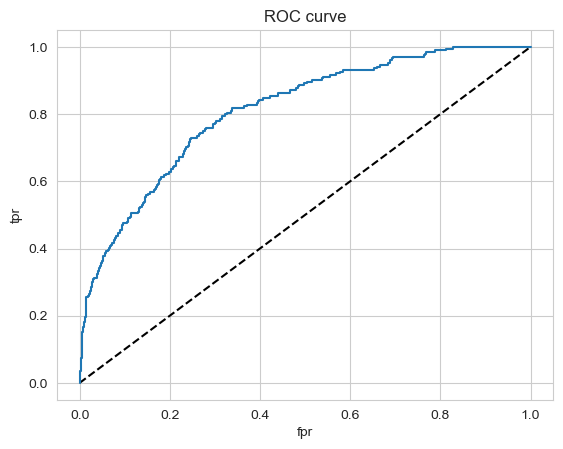

In [151]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# Final Model and Model Deployment

In [181]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [182]:
tf.random.set_seed(101)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = RMSprop(lr=0.001)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

/Users/sahindedogruer/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [183]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15, restore_best_weights = True)

In [184]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights) 

Epoch 1/200
71/71 [==============================] - 1s 5ms/step - loss: 0.6715 - recall: 0.6901 - val_loss: 0.6329 - val_recall: 0.5490
Epoch 2/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6286 - recall: 0.6448 - val_loss: 0.6549 - val_recall: 0.6961
Epoch 3/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6070 - recall: 0.6607 - val_loss: 0.5654 - val_recall: 0.5245
Epoch 4/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5916 - recall: 0.6792 - val_loss: 0.6132 - val_recall: 0.6814
Epoch 5/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5783 - recall: 0.6978 - val_loss: 0.5688 - val_recall: 0.6127
Epoch 6/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5666 - recall: 0.6967 - val_loss: 0.6234 - val_recall: 0.7304
Epoch 7/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5549 - recall: 0.7049 - val_loss: 0.6086 - val_recall: 0.7353
Epoch 8/200
71/71 [======================

<AxesSubplot:>

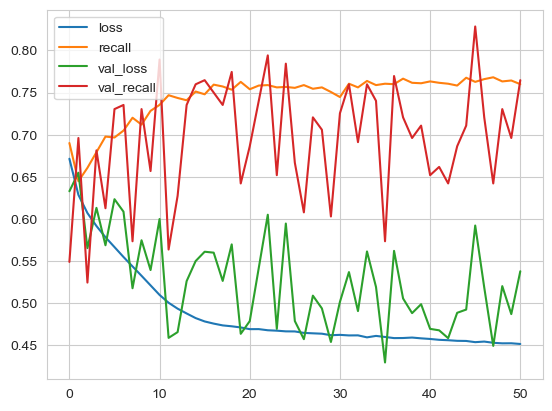

In [185]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [186]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[680 116]
 [ 87 117]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       796
           1       0.50      0.57      0.54       204

    accuracy                           0.80      1000
   macro avg       0.69      0.71      0.70      1000
weighted avg       0.81      0.80      0.80      1000



In [187]:
model.save('model_churn.h5')

## Prediction

In [188]:
single_customer = df.drop(columns=['Exited','CustomerId']).iloc[0]
single_customer

CreditScore            619.0000
Age                     42.0000
Tenure                   2.0000
Balance                  0.0000
NumOfProducts            1.0000
HasCrCard                1.0000
IsActiveMember           1.0000
EstimatedSalary     101348.8800
Geography_Germany        0.0000
Geography_Spain          0.0000
Gender_Male              0.0000
Name: 0, dtype: float64

In [189]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50678999, 0.        , 0.        ,
        0.        ]])

In [190]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

1/1 [==============================] - 0s 23ms/step


array([[1]], dtype=int32)

In [191]:
df["Exited"].iloc[0]

1